In [37]:
import pandas as pd
import os

import pandas as pd

# Wczytanie pliku dag_level3_with_condition.csv
df_level3 = pd.read_csv('dag_level3_with_condition.csv')
print("dag_level3_with_condition.csv loaded successfully")
print(df_level3.head())

# Wczytanie pliku dag_level4_with_condition.csv
df_level4 = pd.read_csv('dag_level4_with_condition.csv')
print("dag_level4_with_condition.csv loaded successfully")
print(df_level4.head())

# Wczytanie pliku dag_level5_with_condition.csv
df_level5 = pd.read_csv('dag_level5_with_condition.csv')
print("dag_level5_with_condition.csv loaded successfully")
print(df_level5.head())

# Wczytanie pliku dag_level6_with_condition.csv
df_level6 = pd.read_csv('dag_level6_with_condition.csv')
print("dag_level6_with_condition.csv loaded successfully")
print(df_level6.head())

# Wczytanie pliku dag_level7_with_condition.csv
df_level7 = pd.read_csv('dag_level7_with_condition.csv')
print("dag_level7_with_condition.csv loaded successfully")
print(df_level7.head())

# Wczytanie pliku dag_level8_with_condition.csv
df_level8 = pd.read_csv('dag_level8_with_condition.csv')
print("dag_level8_with_condition.csv loaded successfully")
print(df_level8.head())



dag_level3_with_condition.csv loaded successfully
   Branch count  Total edge length  Mean edge length  3d_volume_vasculature  \
0           7.0         223.071522         31.867360           1.271035e+05   
1           4.0         939.152883        234.788221           3.238117e+06   
2           4.0        1051.903798        262.975949           1.997672e+06   
3           4.0         259.485449         64.871362           4.943607e+05   
4          73.0        4450.350297         60.963703           3.977927e+06   

   vascular_network_projection_area  branching_points  \
0                       6951.663987                 7   
1                     111887.890027                 6   
2                      89354.226480                 6   
3                      27802.338269                 4   
4                     279175.606120                92   

   branching_points_per_pixel  Mean branch thickness  mean angle  \
0                    0.001962              12.611493    1.150032

Mean Squared Error: 43560.5670
R^2 Score: 0.5087


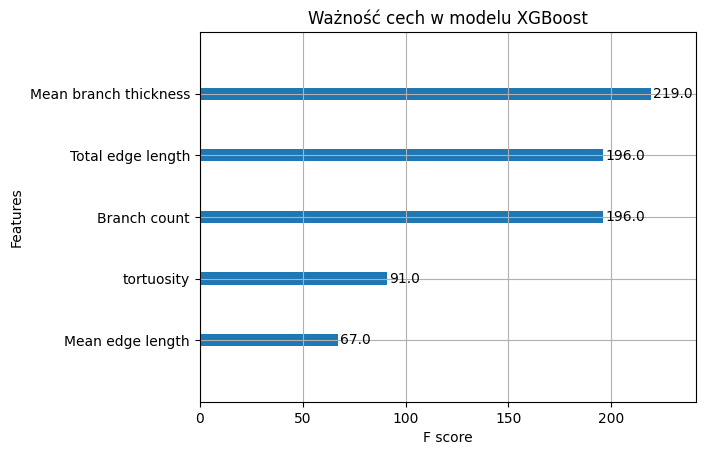

In [45]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Załadowanie danych
df_level3 = pd.read_csv('dag_level3_with_condition.csv')
df_level4 = pd.read_csv('dag_level4_with_condition.csv')

# Wybór zmiennych wejściowych (X) z Level 3 oraz zmiennej docelowej (y) z Level 4
X = df_level3[['Branch count', 'Total edge length', 'Mean edge length', 'Mean branch thickness', 'tortuosity']]
y = df_level4['Total edge length']

# Podział danych na zestaw treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicjalizacja modelu XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Trenowanie modelu
model.fit(X_train, y_train)

# Predykcja na danych testowych
y_pred = model.predict(X_test)

# Ocena modelu
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')

# Ważność cech
xgb.plot_importance(model)
plt.title('Ważność cech w modelu XGBoost')
plt.show()





        Branch count                                                        \
               count       mean        std  min    25%   50%    75%    max   
Level 3         30.0  10.166667  23.951220  2.0   4.00   4.0   4.00  118.0   
Level 4         30.0  20.666667  51.328108  4.0   6.00   8.0   9.00  246.0   
Level 5         30.0  32.933333  68.845621  3.0   9.25  15.0  17.50  300.0   
Level 6         30.0  44.566667  77.930864  5.0  13.25  20.5  31.25  352.0   
Level 7         30.0  54.333333  83.079245  4.0  17.25  30.5  49.50  355.0   
Level 8         30.0  66.200000  99.931149  5.0  21.75  40.0  59.75  480.0   

        Total edge length               ... symmetry_divergence_angle  \
                    count         mean  ...                       75%   
Level 3              30.0   649.252333  ...                  0.860160   
Level 4              30.0  1067.258876  ...                  0.924546   
Level 5              30.0  1666.989862  ...                  0.765298   
Level 6   

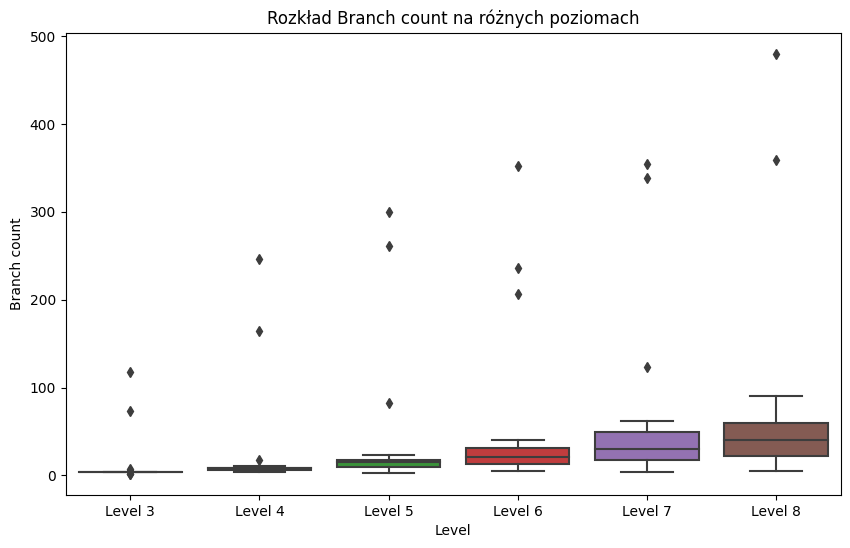

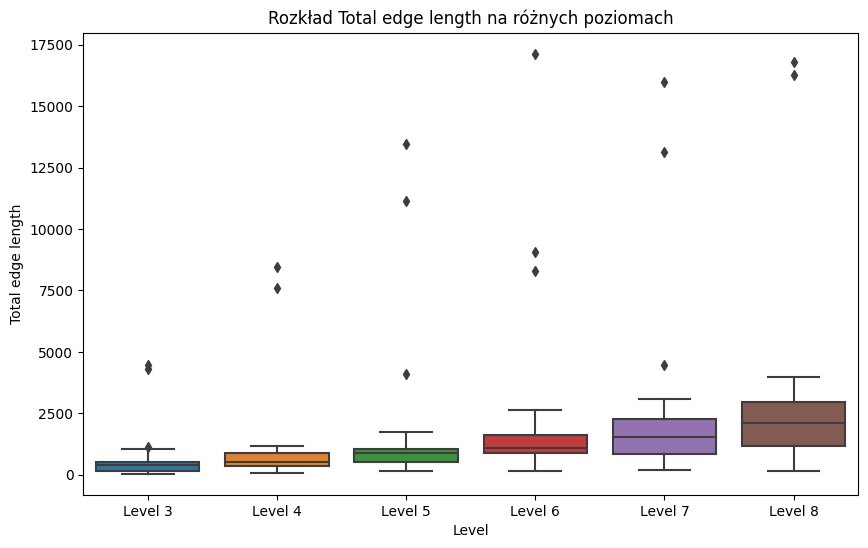

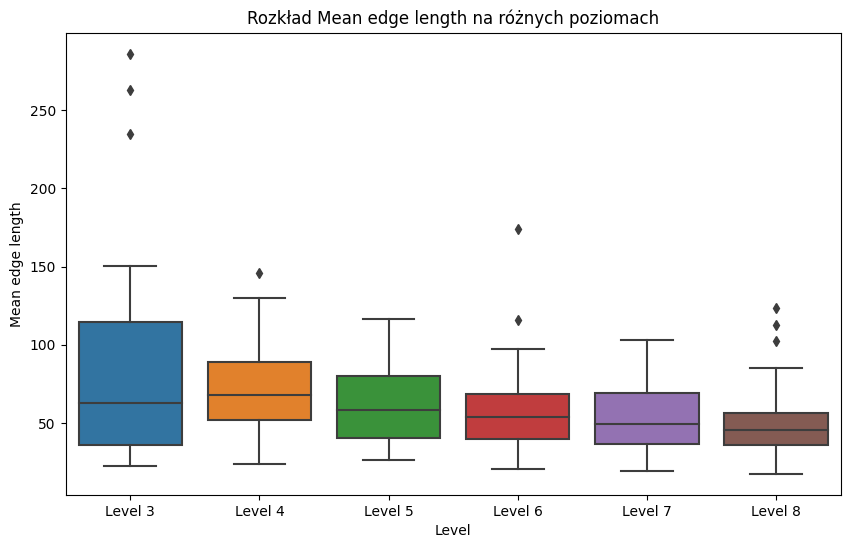

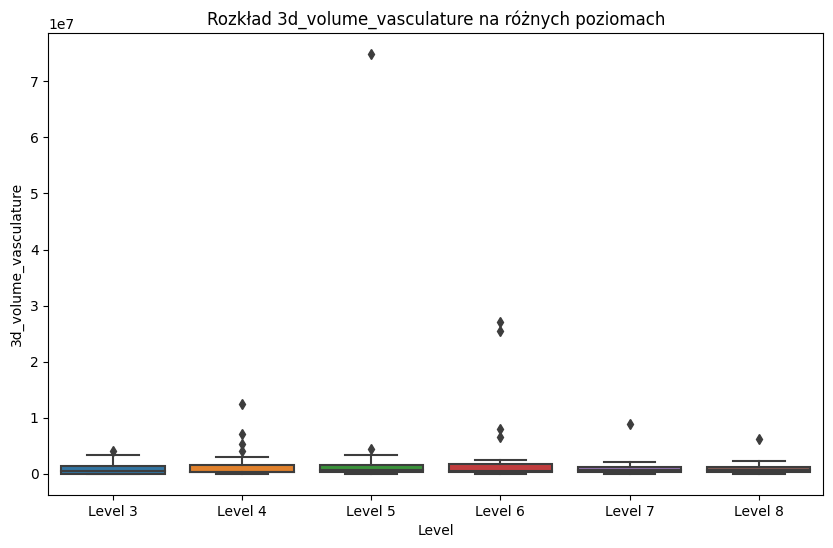

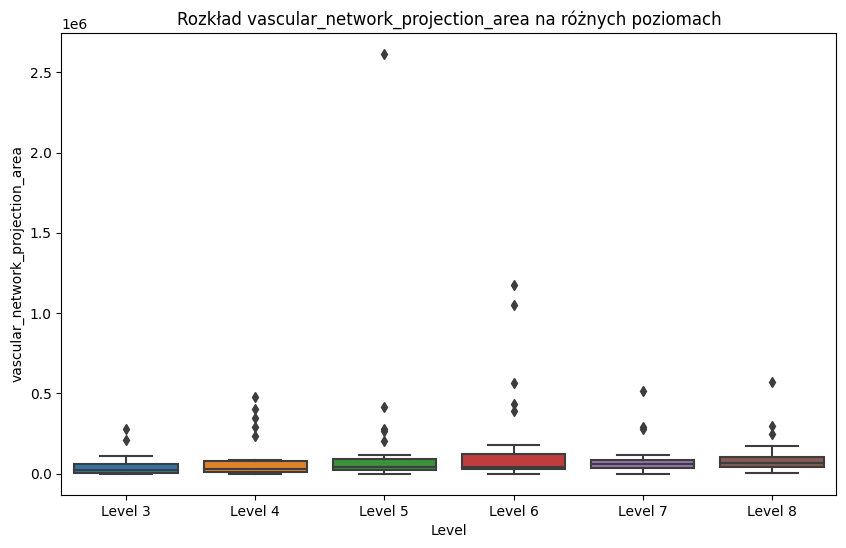

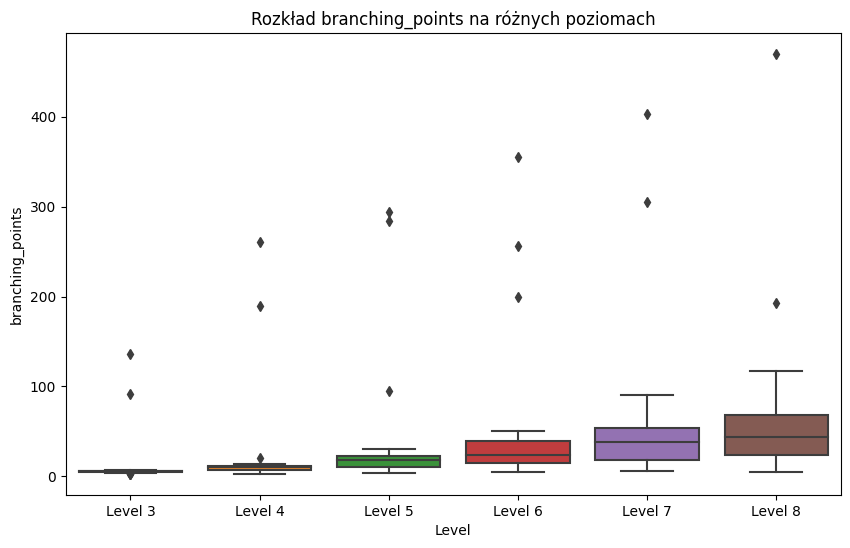

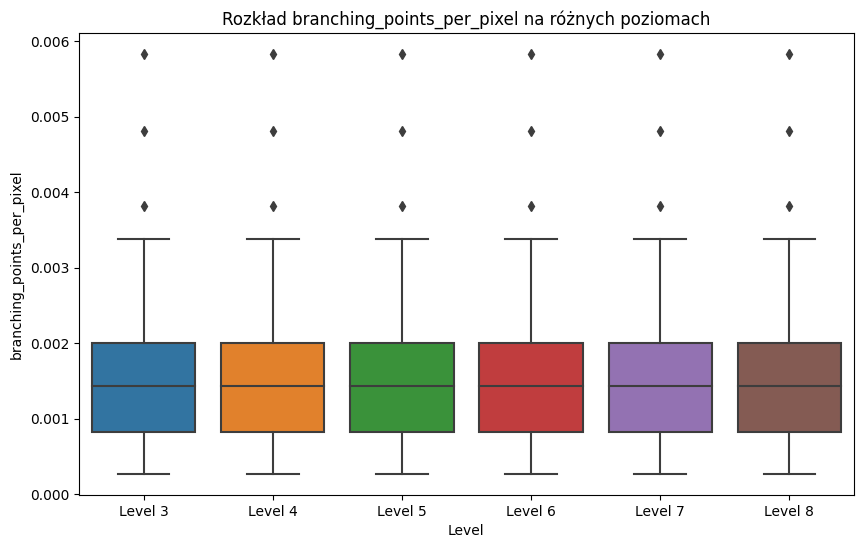

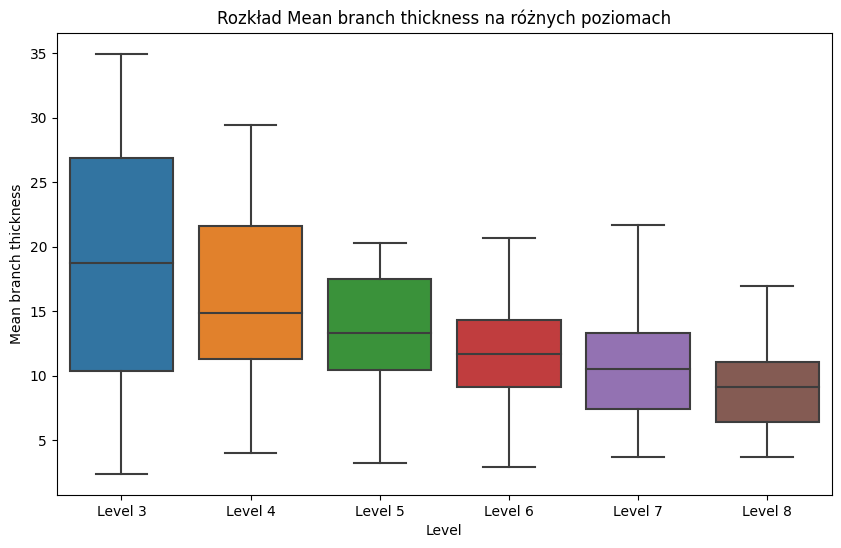

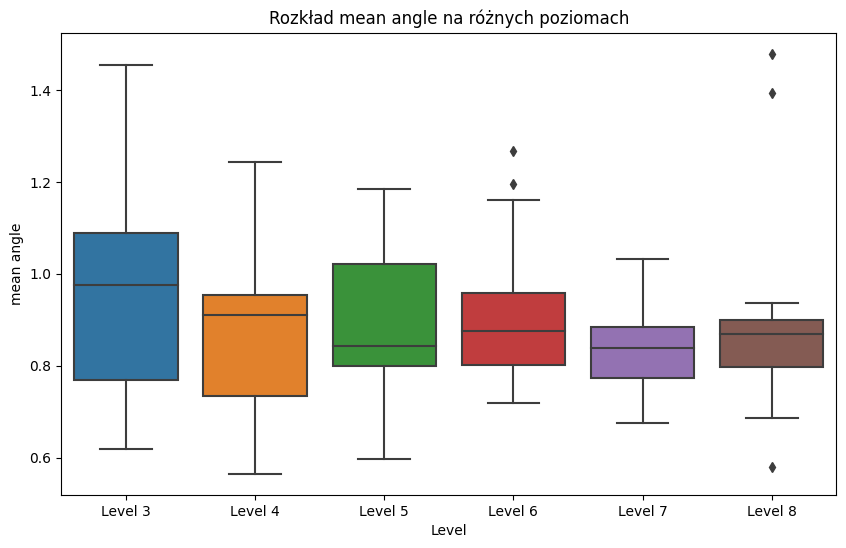

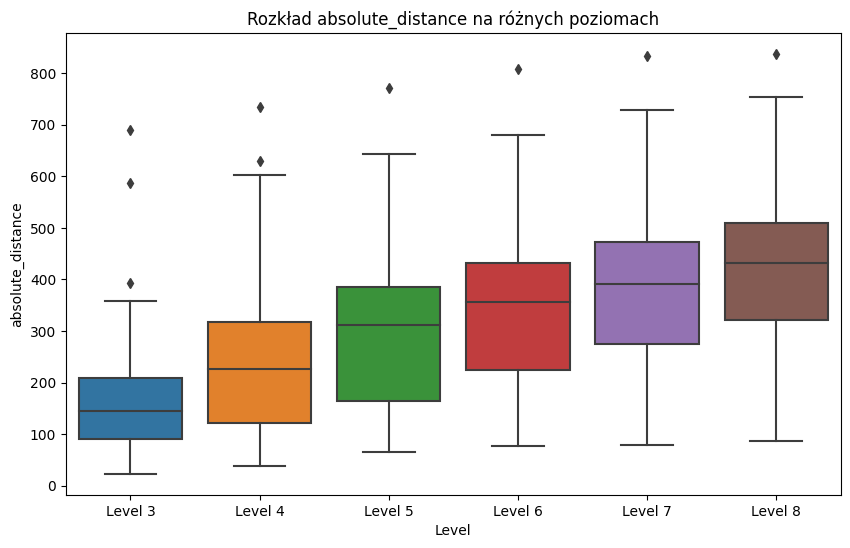

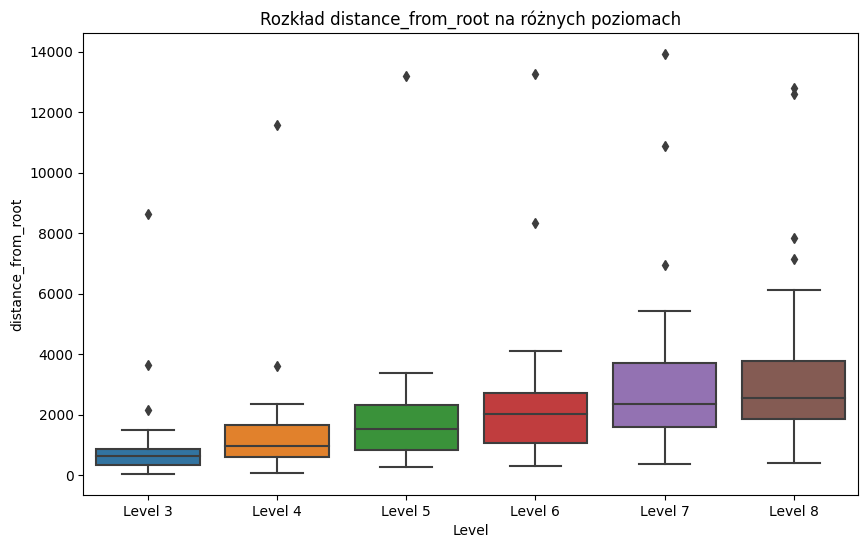

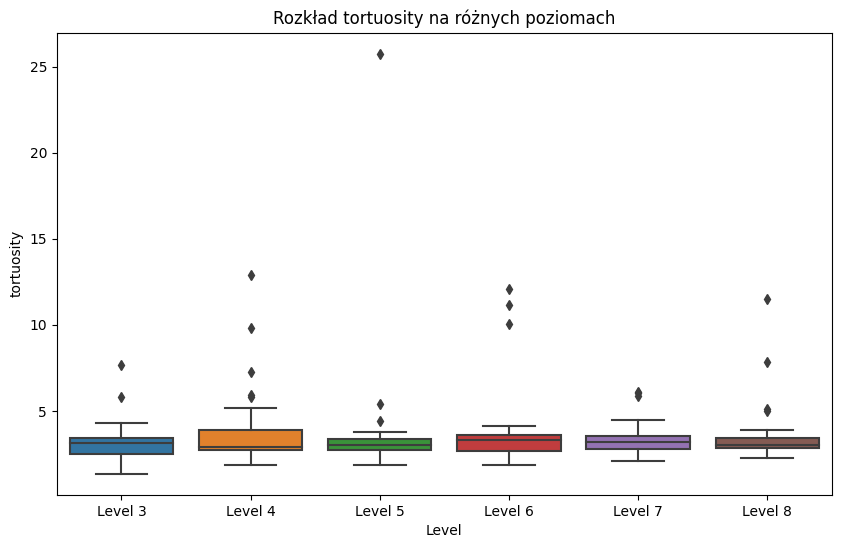

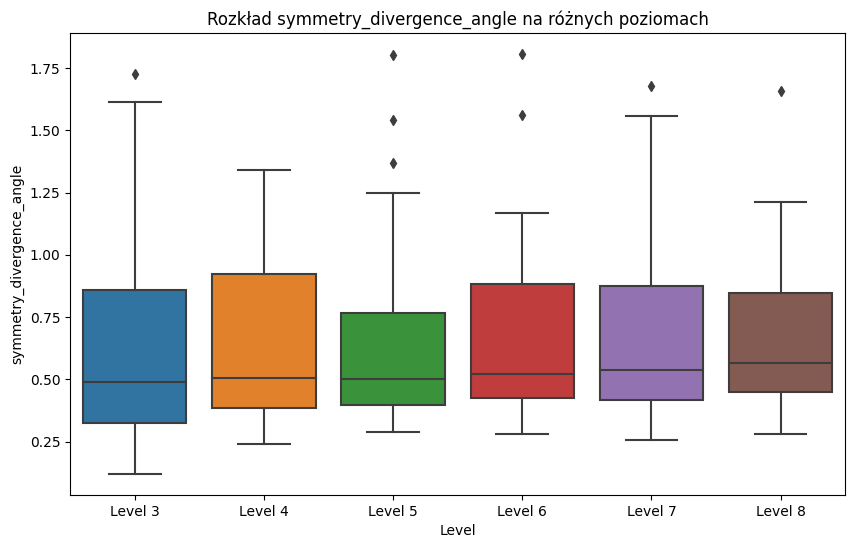

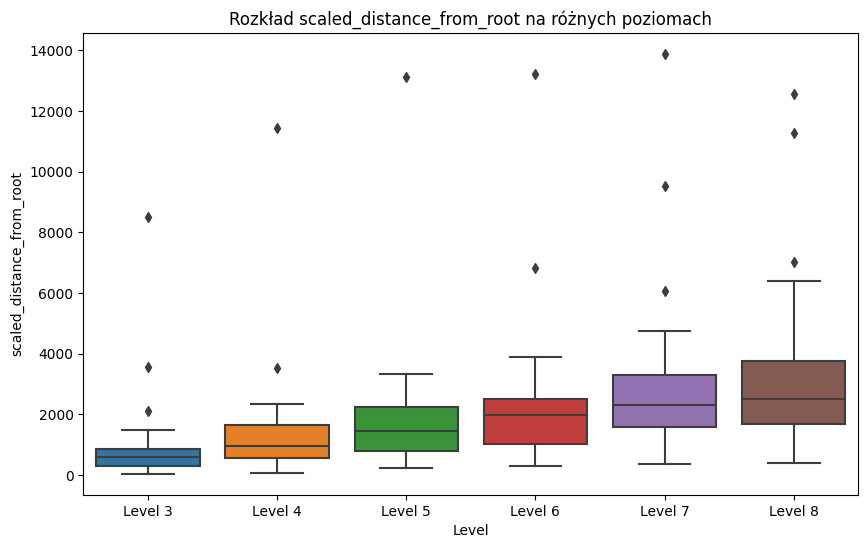

In [51]:
df_combined = pd.concat([df_level3, df_level4, df_level5, df_level6, df_level7, df_level8], keys=['Level 3', 'Level 4', 'Level 5', 'Level 6', 'Level 7', 'Level 8'])

# Obliczanie statystyk opisowych
descriptive_stats = df_combined.groupby(level=0).describe()

# Wyświetlenie wyników
print(descriptive_stats)

import seaborn as sns
import matplotlib.pyplot as plt

# Lista wszystkich kolumn, dla których chcemy stworzyć boxploty
columns = df_combined.columns

# Tworzenie boxplotów dla każdej kolumny
for column in columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_combined.index.get_level_values(0), y=column, data=df_combined)
    plt.title(f'Rozkład {column} na różnych poziomach')
    plt.xlabel('Level')
    plt.ylabel(column)
    plt.show()


In [53]:
import pandas as pd

# Załadowanie danych z plików CSV
df_level3 = pd.read_csv('dag_level3_with_condition.csv')
df_level4 = pd.read_csv('dag_level4_with_condition.csv')
df_level5 = pd.read_csv('dag_level5_with_condition.csv')
df_level6 = pd.read_csv('dag_level6_with_condition.csv')
df_level7 = pd.read_csv('dag_level7_with_condition.csv')
df_level8 = pd.read_csv('dag_level8_with_condition.csv')

# Łączenie danych w jeden DataFrame
df_combined = pd.concat([df_level3, df_level4, df_level5, df_level6, df_level7, df_level8], keys=['Level 3', 'Level 4', 'Level 5', 'Level 6', 'Level 7', 'Level 8'])

# Obliczanie odchylenia standardowego, rozstępu międzykwartylowego i zakresu dla każdego poziomu
def calculate_stats(df_combined):
    stats = {}
    levels = df_combined.index.get_level_values(0).unique()
    for column in df_combined.columns:
        level_stats = {}
        for level in levels:
            data = df_combined.loc[level][column].dropna()
            std_dev = data.std()
            iqr = data.quantile(0.75) - data.quantile(0.25)
            data_range = data.max() - data.min()
            level_stats[level] = {'std': std_dev, 'IQR': iqr, 'Range': data_range}
        stats[column] = level_stats
    return stats

# Obliczanie statystyk
diversity_stats = calculate_stats(df_combined)

# Wypisywanie statystyk
for param, stats in diversity_stats.items():
    print(f"\nStatystyki dla parametru: {param}")
    for level, values in stats.items():
        print(f"  {level}: std = {values['std']:.4f}, IQR = {values['IQR']:.4f}, Range = {values['Range']:.4f}")



Statystyki dla parametru: Branch count
  Level 3: std = 23.9512, IQR = 0.0000, Range = 116.0000
  Level 4: std = 51.3281, IQR = 3.0000, Range = 242.0000
  Level 5: std = 68.8456, IQR = 8.2500, Range = 297.0000
  Level 6: std = 77.9309, IQR = 18.0000, Range = 347.0000
  Level 7: std = 83.0792, IQR = 32.2500, Range = 351.0000
  Level 8: std = 99.9311, IQR = 38.0000, Range = 475.0000

Statystyki dla parametru: Total edge length
  Level 3: std = 1053.2168, IQR = 364.2231, Range = 4403.7065
  Level 4: std = 1920.4463, IQR = 509.7535, Range = 8365.0041
  Level 5: std = 2991.7269, IQR = 529.6195, Range = 13284.1922
  Level 6: std = 3462.6963, IQR = 762.0856, Range = 16964.1311
  Level 7: std = 3441.3692, IQR = 1417.6888, Range = 15787.0801
  Level 8: std = 3825.0817, IQR = 1799.8331, Range = 16600.9007

Statystyki dla parametru: Mean edge length
  Level 3: std = 70.1917, IQR = 78.6917, Range = 263.3901
  Level 4: std = 28.7097, IQR = 37.0823, Range = 121.9537
  Level 5: std = 25.0927, IQR = 

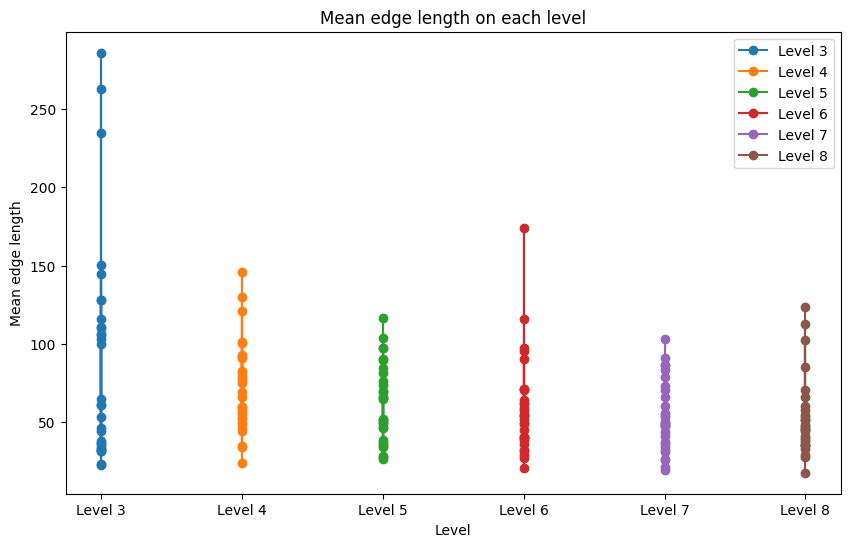

In [25]:
df_combined = pd.concat([df_level3, df_level4, df_level5, df_level6, df_level7, df_level8], keys=['Level 3', 'Level 4', 'Level 5', 'Level 6', 'Level 7', 'Level 8'])

# Przygotowanie danych dla analizy
# Grupowanie danych po poziomach (generacjach)
grouped_data = df_combined.groupby(level=0)

# Wykresy porównujące różne parametry
# 1. Wykres dla średniej długości segmentu (Mean edge length) na każdym poziomie
plt.figure(figsize=(10, 6))
for level, group in grouped_data:
    plt.plot(group.index.get_level_values(0), group['Mean edge length'], marker='o', label=f'{level}')

plt.title('Mean edge length on each level')
plt.xlabel('Level')
plt.ylabel('Mean edge length')
plt.legend()
plt.show()

C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

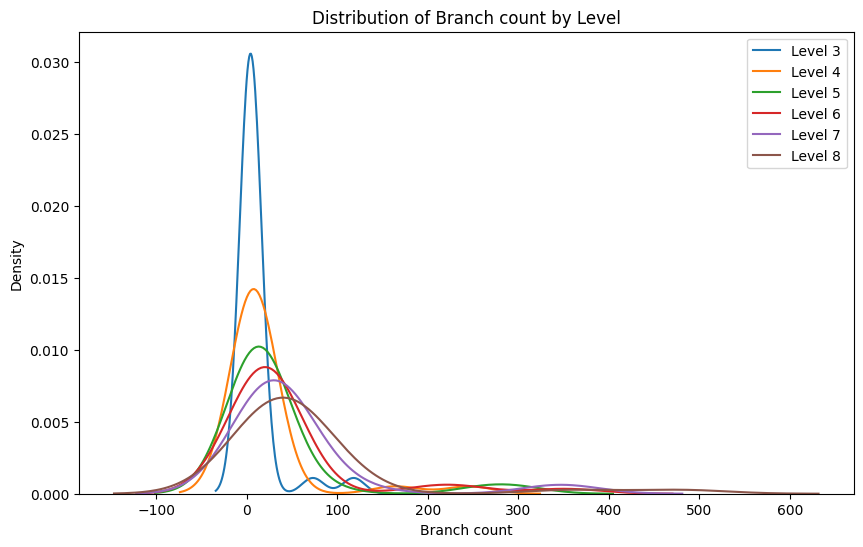

In [27]:
# 2. Wykres rozkładu liczby segmentów w zależności od poziomu (Branch count)
plt.figure(figsize=(10, 6))
for level, group in grouped_data:
    sns.kdeplot(group['Branch count'], label=f'{level}')

plt.title('Distribution of Branch count by Level')
plt.xlabel('Branch count')
plt.ylabel('Density')
plt.legend()
plt.show()


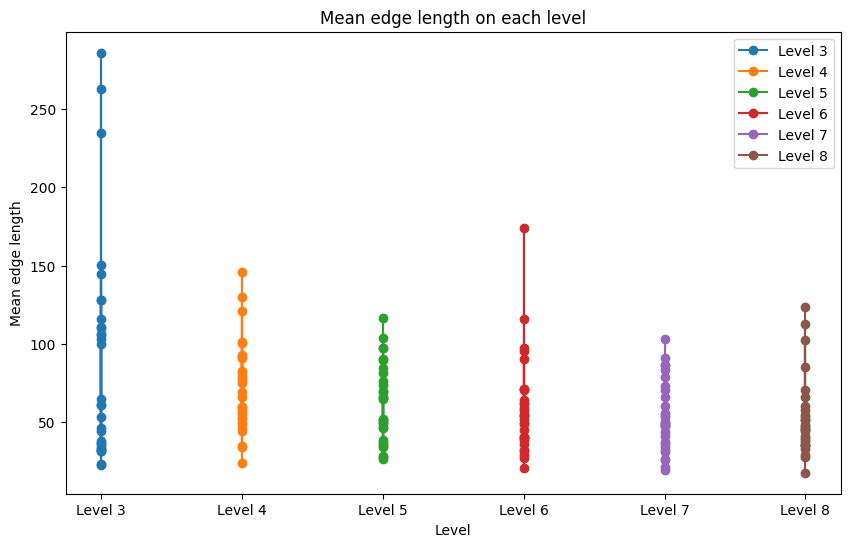

C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

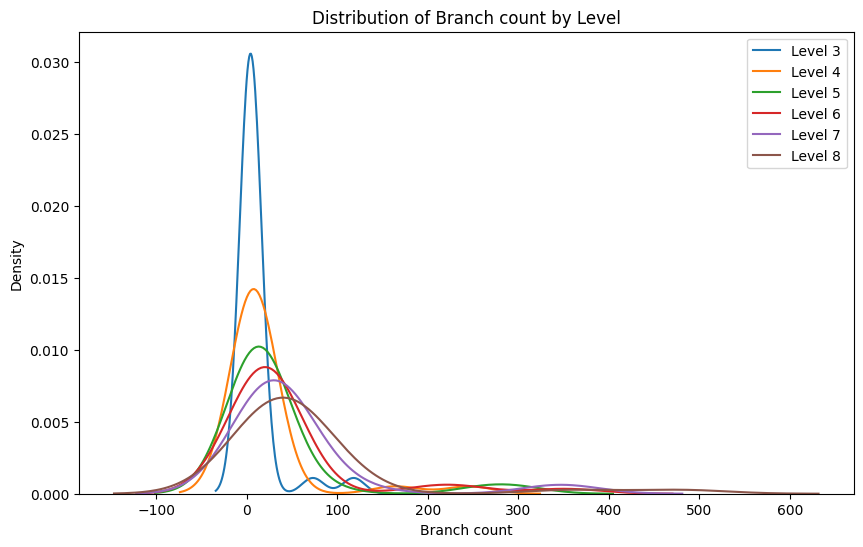

In [29]:

# Wykresy porównujące różne parametry
# 1. Wykres dla średniej długości segmentu (Mean edge length) na każdym poziomie
plt.figure(figsize=(10, 6))
for level, group in grouped_data:
    plt.plot(group.index.get_level_values(0), group['Mean edge length'], marker='o', label=f'{level}')

plt.title('Mean edge length on each level')
plt.xlabel('Level')
plt.ylabel('Mean edge length')
plt.legend()
plt.show()

# 2. Wykres rozkładu liczby segmentów w zależności od poziomu (Branch count)
plt.figure(figsize=(10, 6))
for level, group in grouped_data:
    sns.kdeplot(group['Branch count'], label=f'{level}')

plt.title('Distribution of Branch count by Level')
plt.xlabel('Branch count')
plt.ylabel('Density')
plt.legend()
plt.show()


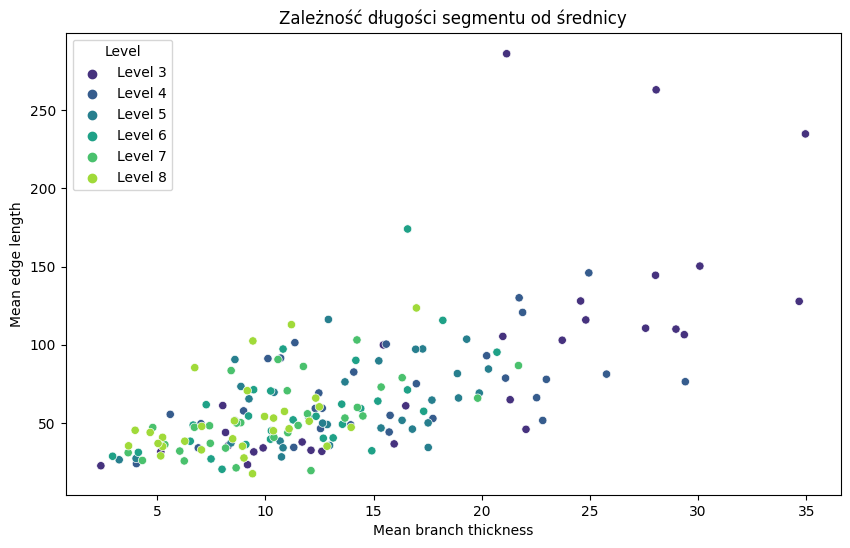

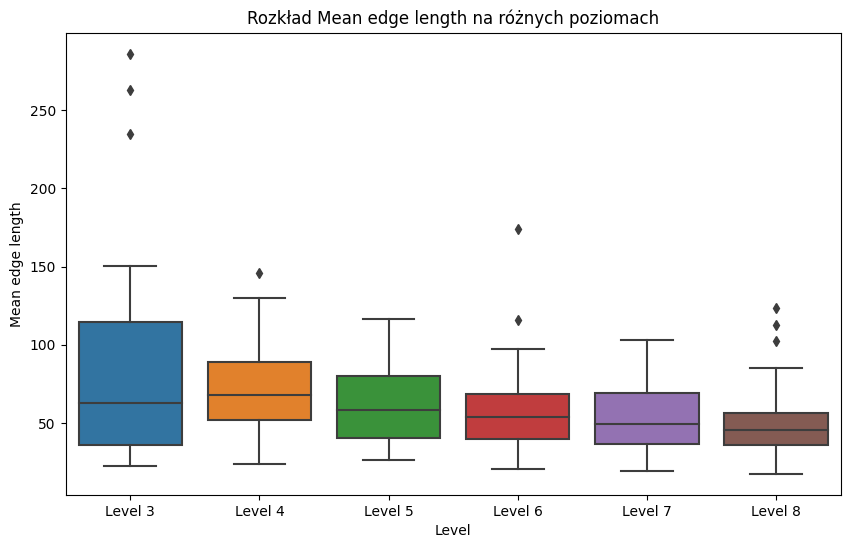

C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075:

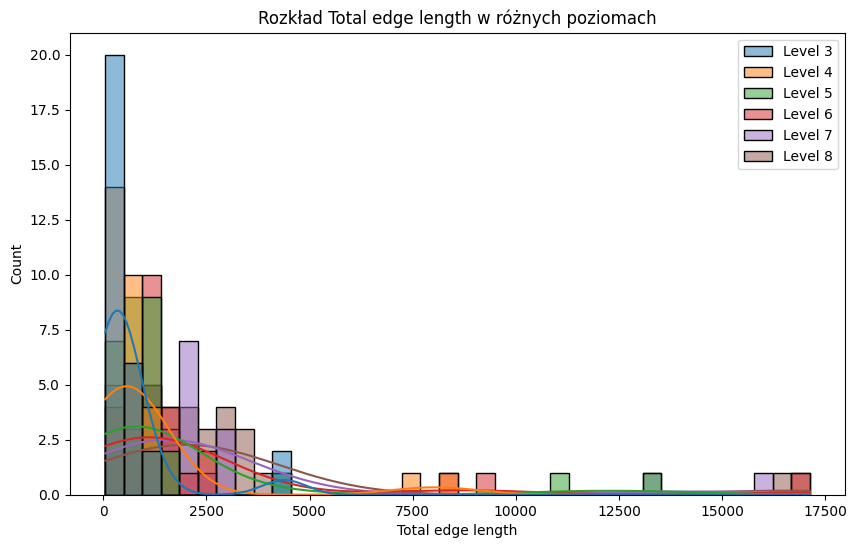

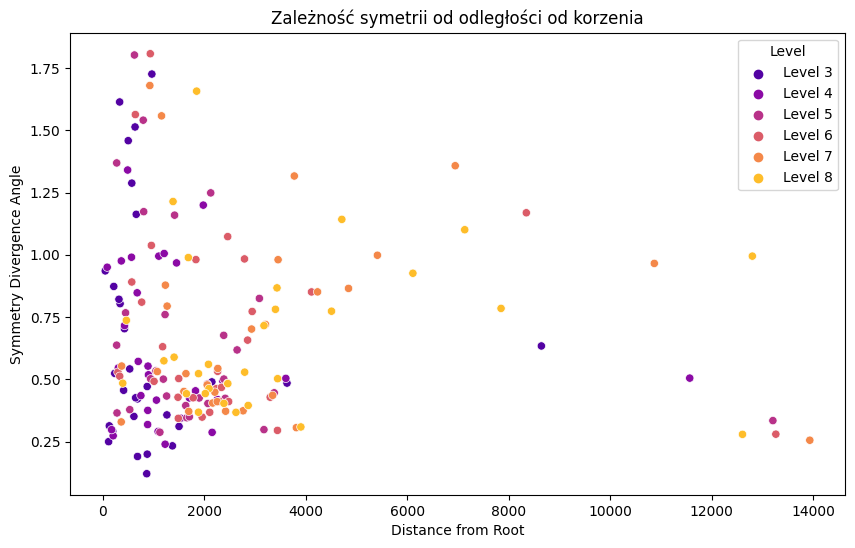

In [31]:

# 1. Scatter plot: Zależność długości segmentu od średnicy (Mean branch thickness)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mean branch thickness', y='Mean edge length', hue=df_combined.index.get_level_values(0), data=df_combined, palette='viridis')
plt.title('Zależność długości segmentu od średnicy')
plt.xlabel('Mean branch thickness')
plt.ylabel('Mean edge length')
plt.legend(title='Level')
plt.show()

# 2. Boxplot: Rozkład Mean edge length na różnych poziomach
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_combined.index.get_level_values(0), y='Mean edge length', data=df_combined)
plt.title('Rozkład Mean edge length na różnych poziomach')
plt.xlabel('Level')
plt.ylabel('Mean edge length')
plt.show()

# 3. Histogram: Rozkład Total edge length w różnych poziomach
plt.figure(figsize=(10, 6))
sns.histplot(df_combined, x='Total edge length', hue=df_combined.index.get_level_values(0), kde=True)
plt.title('Rozkład Total edge length w różnych poziomach')
plt.xlabel('Total edge length')
plt.show()

# 4. Scatter plot: Zależność symetrii od odległości od korzenia (symmetry_divergence_angle vs distance_from_root)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_from_root', y='symmetry_divergence_angle', hue=df_combined.index.get_level_values(0), data=df_combined, palette='plasma')
plt.title('Zależność symetrii od odległości od korzenia')
plt.xlabel('Distance from Root')
plt.ylabel('Symmetry Divergence Angle')
plt.legend(title='Level')
plt.show()

In [33]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.preprocessing import KBinsDiscretizer

# Wczytanie danych z plików CSV (zakładając, że pliki są już wczytane do odpowiednich DataFrame'ów)

# Na potrzeby przykładu załóżmy, że chcemy przekształcić cechy ciągłe na kategoryczne poprzez binning
# Używamy KBinsDiscretizer do podzielenia zmiennych na kategorie
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')

# Wybieramy kolumny do dyskretyzacji (np. 'Mean edge length')
df_combined['Mean edge length (binned)'] = discretizer.fit_transform(df_combined[['Mean edge length']]).astype(int)

# Można to powtórzyć dla innych zmiennych ciągłych
df_combined['Total edge length (binned)'] = discretizer.fit_transform(df_combined[['Total edge length']]).astype(int)

# Teraz mamy kategoryczne wersje zmiennych

# Tworzymy tabelę kontyngencji dla jednej z kategorycznych zmiennych (np. 'Mean edge length (binned)') w zależności od poziomu
contingency_table = pd.crosstab(df_combined['Mean edge length (binned)'], df_combined.index.get_level_values(0))

# Przeprowadzamy test chi-kwadrat
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test for 'Mean edge length (binned)':")
print(f"Chi2 Statistic: {chi2:.4f}, P-value: {p:.4f}, Degrees of Freedom: {dof}")


Chi-Square Test for 'Mean edge length (binned)':
Chi2 Statistic: 29.7655, P-value: 0.0128, Degrees of Freedom: 15


C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [21]:
df_combined = pd.concat([df_level3, df_level4, df_level5, df_level6, df_level7, df_level8], keys=['Level 3', 'Level 4', 'Level 5', 'Level 6', 'Level 7', 'Level 8'])

# Identyfikacja punktów rozgałęzienia
def identify_bifurcations(data):
    return data[data['Branch count'] > 2]

bifurcations = identify_bifurcations(df_combined)

# Analiza bifurkacji - przykładowa analiza liczby punktów rozgałęzienia na poziom
bifurcation_count_per_level = bifurcations.groupby(level=0).size()
print("Liczba punktów rozgałęzienia na poziom grafu:")
print(bifurcation_count_per_level)

# Analiza parametrów na poziomie objętości
def calculate_volume_based_parameters(data):
    total_edge_length = data['Total edge length'].sum()
    vascular_volume = data['3d_volume_vasculature'].sum()
    # Zakładamy, że gęstość naczyń to objętość naczyń na jednostkę objętości całej przestrzeni
    # Można dostosować bounding_box_volume do faktycznej objętości rozważanej przestrzeni
    bounding_box_volume = vascular_volume  # Jeśli przestrzeń to cała objętość naczyniowa
    vascular_density = vascular_volume / bounding_box_volume
    
    return {
        'Total Length': total_edge_length,
        'Vessel Volume (Vf)': vascular_volume,
        'Vascular Density': vascular_density
    }

# Obliczanie parametrów objętościowych dla całego zestawu danych
volume_parameters = calculate_volume_based_parameters(df_combined)

print(f"Total Length: {volume_parameters['Total Length']}")
print(f"Vessel Volume (Vf): {volume_parameters['Vessel Volume (Vf)']}")
print(f"Vascular Density: {volume_parameters['Vascular Density']}")

Liczba punktów rozgałęzienia na poziom grafu:
Level 3    28
Level 4    30
Level 5    30
Level 6    30
Level 7    30
Level 8    30
dtype: int64
Total Length: 330316.77588863956
Vessel Volume (Vf): 322466626.9963972
Vascular Density: 1.0


In [35]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.preprocessing import KBinsDiscretizer

# Wczytanie danych (zakładam, że już je wczytaliśmy wcześniej)
# df_combined = ...

# Lista cech, które chcemy przekształcić na kategoryczne i przetestować
features_to_test = ['Mean edge length', 'Total edge length', '3d_volume_vasculature', 
                    'vascular_network_projection_area', 'branching_points', 
                    'Mean branch thickness', 'mean angle', 'absolute_distance', 
                    'distance_from_root', 'tortuosity', 'symmetry_divergence_angle', 
                    'scaled_distance_from_root']

# Inicjalizacja listy do przechowywania wyników
chi2_results = []

# Przeprowadzenie testu chi-kwadrat dla każdej cechy
for feature in features_to_test:
    # Dyskretyzacja cechy ciągłej na kategorie (binning)
    df_combined[f'{feature} (binned)'] = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform').fit_transform(df_combined[[feature]]).astype(int)

    # Tworzenie tabeli kontyngencji
    contingency_table = pd.crosstab(df_combined[f'{feature} (binned)'], df_combined.index.get_level_values(0))

    # Przeprowadzenie testu chi-kwadrat
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Dodanie wyników do listy
    chi2_results.append({
        'Feature': feature,
        'Chi2 Statistic': chi2,
        'P-value': p,
        'Degrees of Freedom': dof
    })

# Konwersja wyników do DataFrame
chi2_results_df = pd.DataFrame(chi2_results)

# Sortowanie wyników według P-value rosnąco
chi2_results_df = chi2_results_df.sort_values(by='P-value')

# Wyświetlenie wyników
print(chi2_results_df)


                             Feature  Chi2 Statistic       P-value  \
5              Mean branch thickness       69.861132  4.728860e-09   
7                  absolute_distance       46.545455  4.352730e-05   
0                   Mean edge length       29.765507  1.279572e-02   
6                         mean angle       27.430137  2.542098e-02   
8                 distance_from_root       21.736264  1.149082e-01   
2              3d_volume_vasculature       15.118644  1.277958e-01   
3   vascular_network_projection_area       15.118644  1.277958e-01   
11         scaled_distance_from_root       16.636943  3.410270e-01   
9                         tortuosity       10.692982  3.819323e-01   
1                  Total edge length       12.048193  6.753776e-01   
10         symmetry_divergence_angle       10.493506  7.876034e-01   
4                   branching_points        8.471429  9.034963e-01   

    Degrees of Freedom  
5                   15  
7                   15  
0             

C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\herma\anaconda3\anaconda_\Lib\site

Wyniki ANOVA dla kluczowych parametrów:
Total edge length: F-value = 2.6523, P-value = 0.0244
Mean edge length: F-value = 4.5445, P-value = 0.0006
3d_volume_vasculature: F-value = 0.9254, P-value = 0.4658
tortuosity: F-value = 0.4358, P-value = 0.8231
Średnie i odchylenia standardowe dla kluczowych parametrów:
        Total edge length              Mean edge length             \
                     mean          std             mean        std   
Level 3        649.252333  1053.216840        91.107520  70.191722   
Level 4       1067.258876  1920.446330        71.802083  28.709738   
Level 5       1666.989862  2991.726894        61.730549  25.092734   
Level 6       2166.626763  3462.696327        59.371406  31.128080   
Level 7       2495.456900  3441.369207        53.349600  22.335131   
Level 8       2964.974462  3825.081736        52.250107  24.814466   

        3d_volume_vasculature               tortuosity            
                         mean           std       mean      

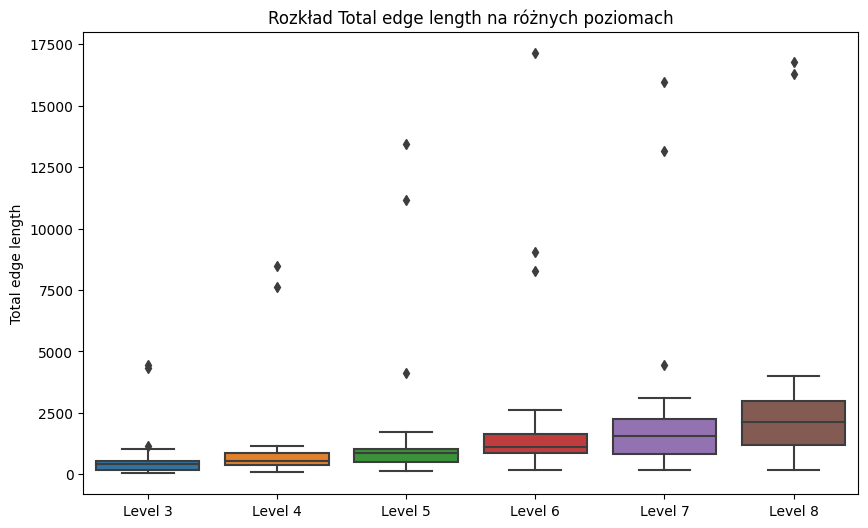

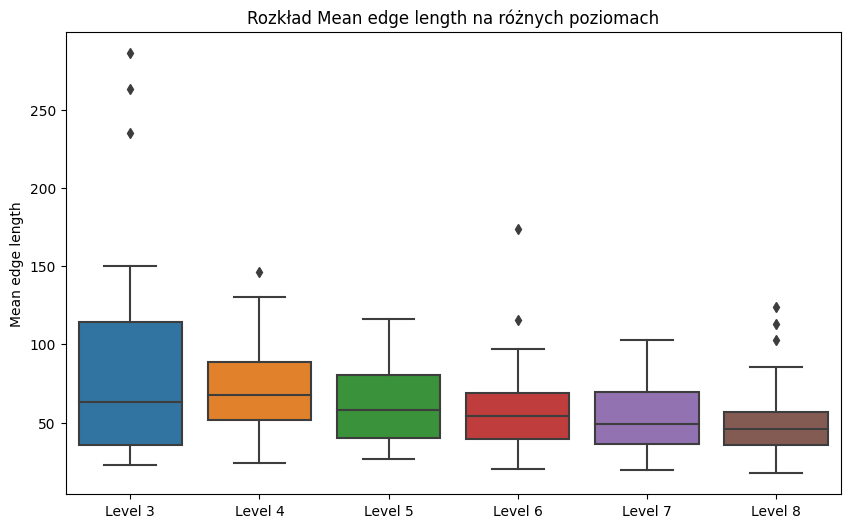

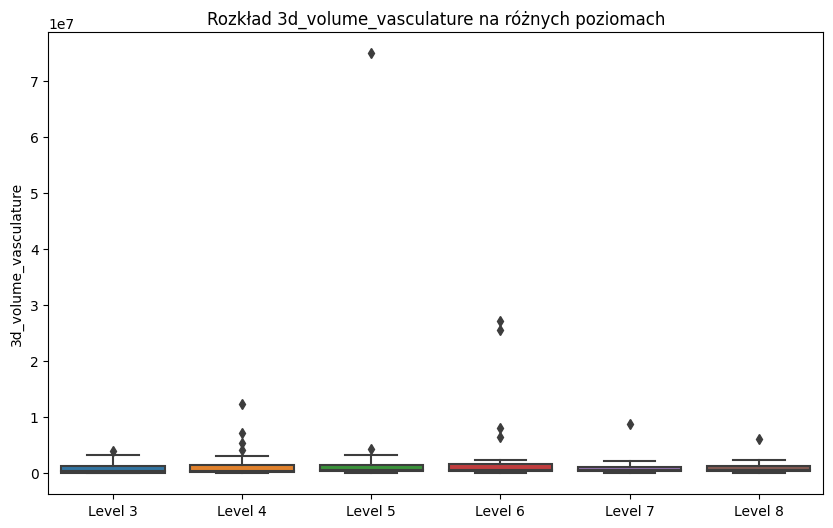

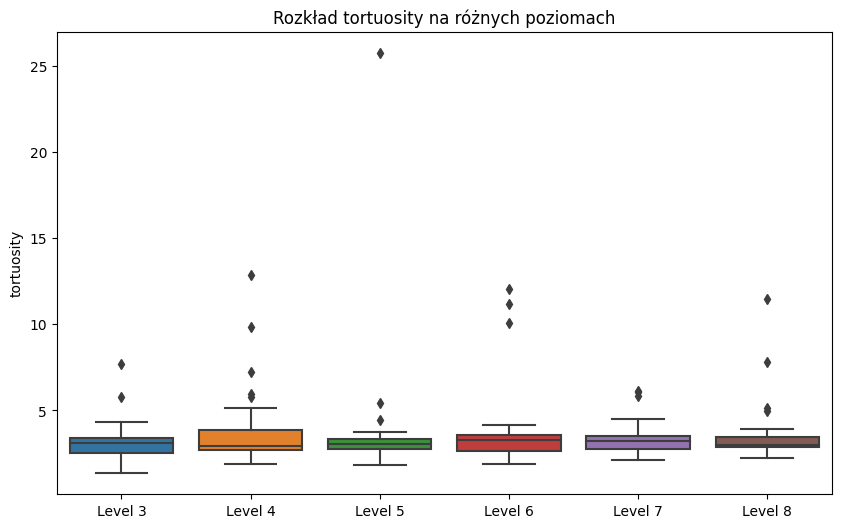

C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


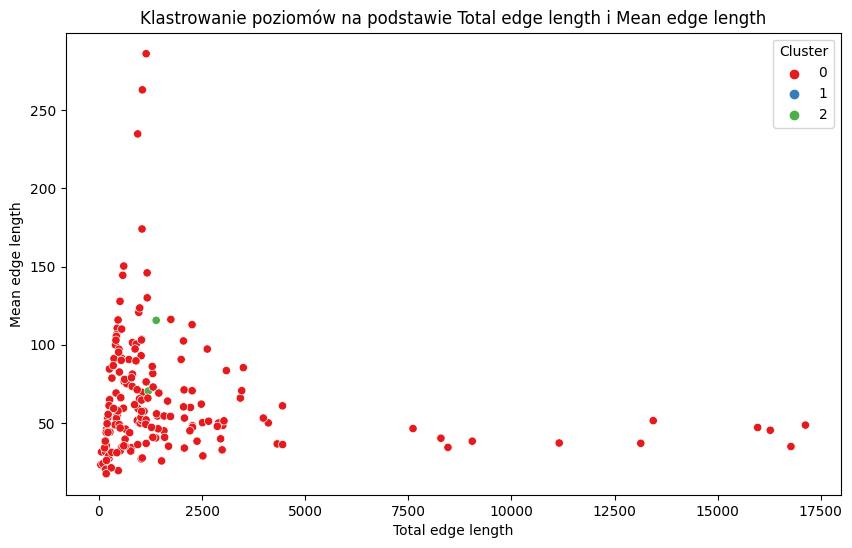

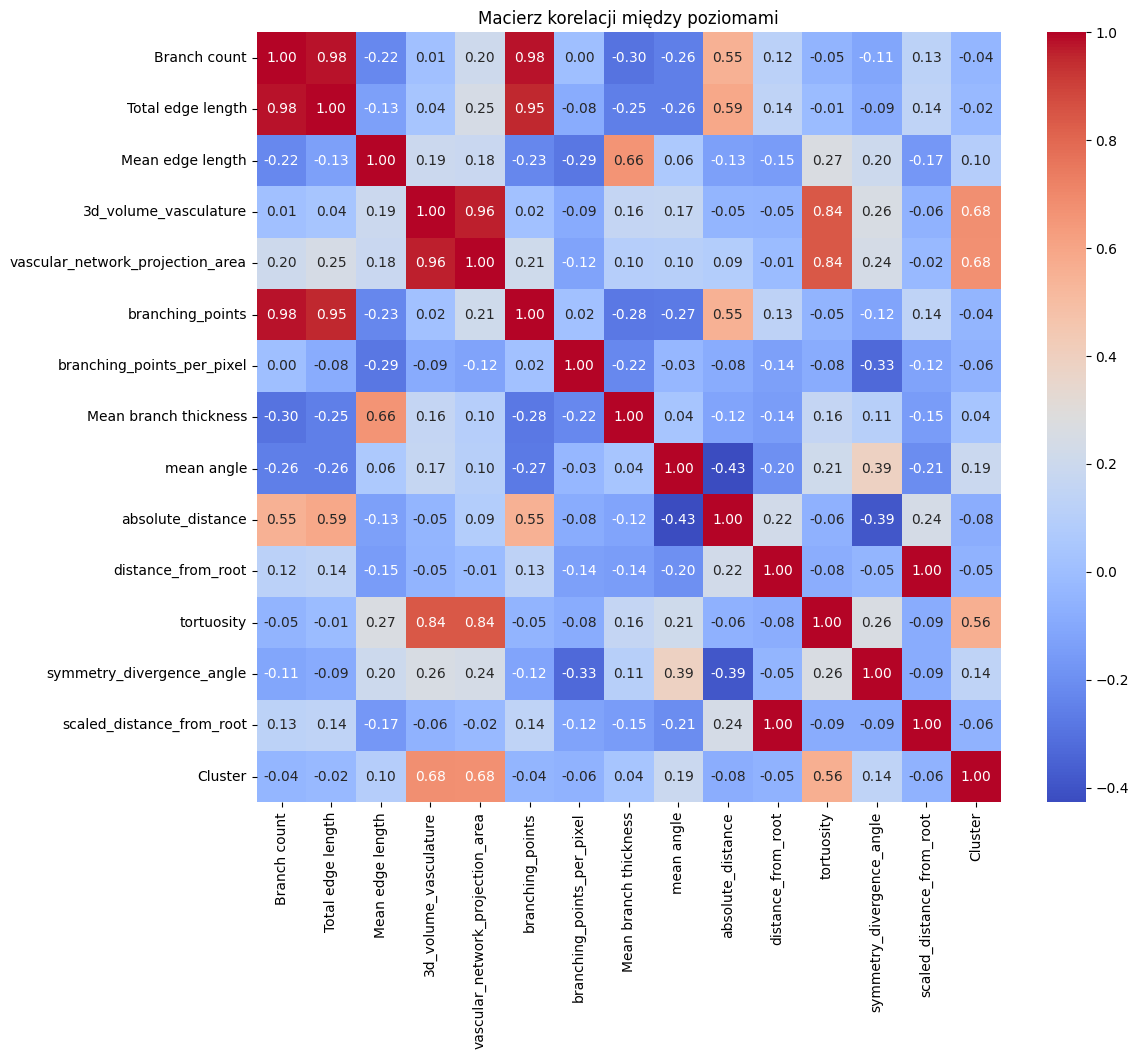

T-test Total edge length (Level 3 vs Level 4): t-stat = -1.0453, p-value = 0.3002
T-test tortuosity (Level 3 vs Level 4): t-stat = -1.5060, p-value = 0.1375


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
import numpy as np

# Wczytywanie danych
df_level3 = pd.read_csv('dag_level3_with_condition.csv')
df_level4 = pd.read_csv('dag_level4_with_condition.csv')
df_level5 = pd.read_csv('dag_level5_with_condition.csv')
df_level6 = pd.read_csv('dag_level6_with_condition.csv')
df_level7 = pd.read_csv('dag_level7_with_condition.csv')
df_level8 = pd.read_csv('dag_level8_with_condition.csv')

# Połączenie danych w jeden DataFrame z poziomami
df_combined = pd.concat([df_level3, df_level4, df_level5, df_level6, df_level7, df_level8], keys=['Level 3', 'Level 4', 'Level 5', 'Level 6', 'Level 7', 'Level 8'])

# Analiza wariancji (ANOVA) między poziomami dla kluczowych parametrów
anova_results = {}
for col in ['Total edge length', 'Mean edge length', '3d_volume_vasculature', 'tortuosity']:
    f_val, p_val = stats.f_oneway(
        df_level3[col].dropna(),
        df_level4[col].dropna(),
        df_level5[col].dropna(),
        df_level6[col].dropna(),
        df_level7[col].dropna(),
        df_level8[col].dropna()
    )
    anova_results[col] = {'F-value': f_val, 'P-value': p_val}

print("Wyniki ANOVA dla kluczowych parametrów:")
for param, results in anova_results.items():
    print(f"{param}: F-value = {results['F-value']:.4f}, P-value = {results['P-value']:.4f}")

# Porównanie średnich i odchyleń standardowych między poziomami
summary_stats = df_combined.groupby(level=0).agg(['mean', 'std'])[['Total edge length', 'Mean edge length', '3d_volume_vasculature', 'tortuosity']]
print("Średnie i odchylenia standardowe dla kluczowych parametrów:")
print(summary_stats)

# Wykresy boxplot do wizualizacji rozkładów między poziomami
for col in ['Total edge length', 'Mean edge length', '3d_volume_vasculature', 'tortuosity']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_combined.index.get_level_values(0), y=col, data=df_combined)
    plt.title(f'Rozkład {col} na różnych poziomach')
    plt.show()

# Analiza klastrowania (KMeans) dla wszystkich poziomów
kmeans = KMeans(n_clusters=3)
df_combined['Cluster'] = kmeans.fit_predict(df_combined[['Total edge length', 'Mean edge length', '3d_volume_vasculature', 'tortuosity']].dropna())

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total edge length', y='Mean edge length', hue='Cluster', data=df_combined, palette='Set1')
plt.title('Klastrowanie poziomów na podstawie Total edge length i Mean edge length')
plt.show()

# Korelacja między poziomami
correlation_matrix = df_combined.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji między poziomami')
plt.show()

# Testy istotności statystycznej (t-test) między wybranymi poziomami (np. Level 3 vs Level 4)
t_stat, p_val = stats.ttest_ind(df_level3['Total edge length'], df_level4['Total edge length'])
print(f'T-test Total edge length (Level 3 vs Level 4): t-stat = {t_stat:.4f}, p-value = {p_val:.4f}')

t_stat, p_val = stats.ttest_ind(df_level3['tortuosity'], df_level4['tortuosity'])
print(f'T-test tortuosity (Level 3 vs Level 4): t-stat = {t_stat:.4f}, p-value = {p_val:.4f}')


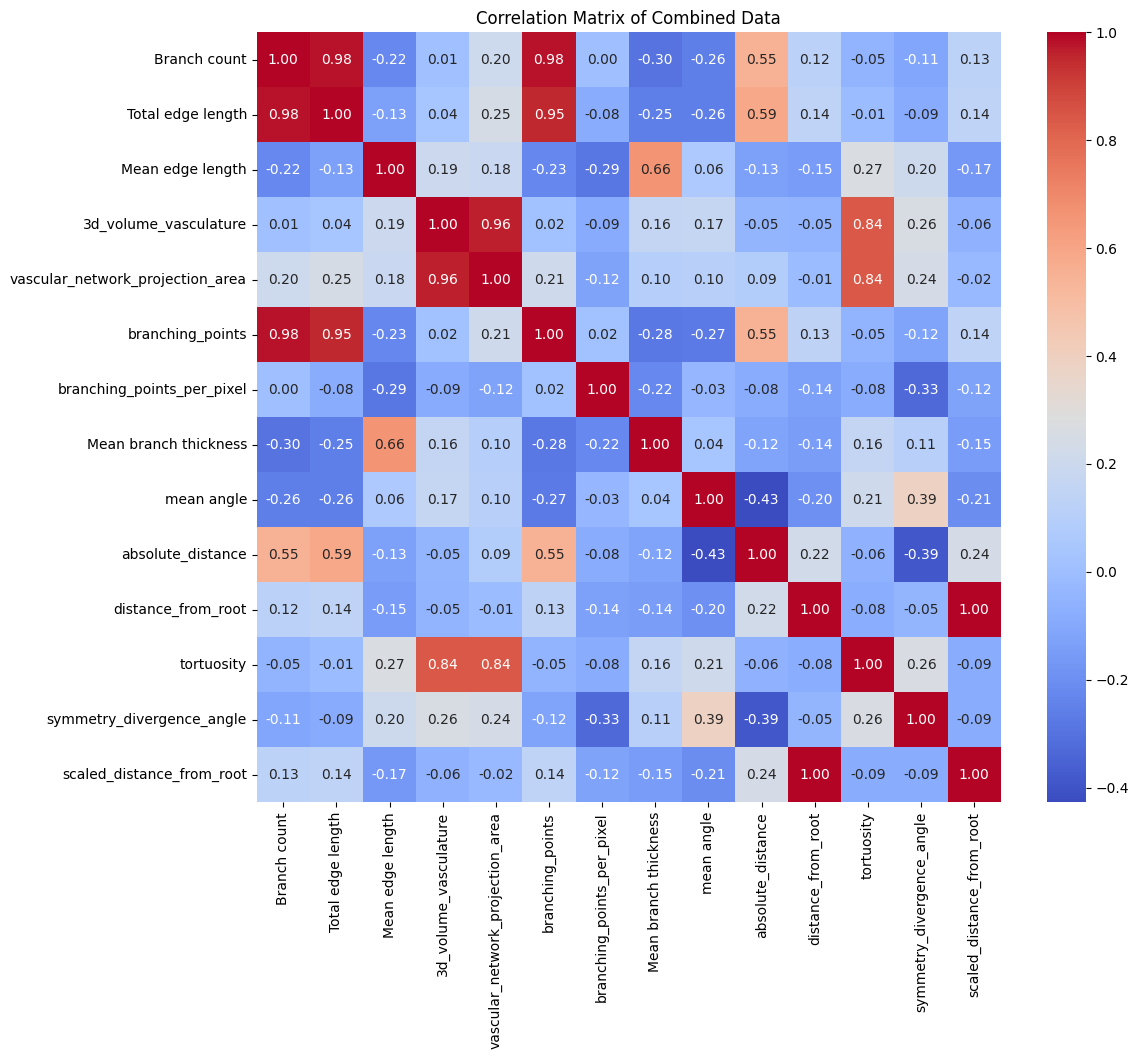

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_combined = pd.concat([df_level3, df_level4, df_level5, df_level6, df_level7, df_level8], keys=['Level 3', 'Level 4', 'Level 5', 'Level 6', 'Level 7', 'Level 8'])

# Obliczenie macierzy korelacji
correlation_matrix = df_combined.corr()

# Wykres macierzy korelacji
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Combined Data')
plt.show()



C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

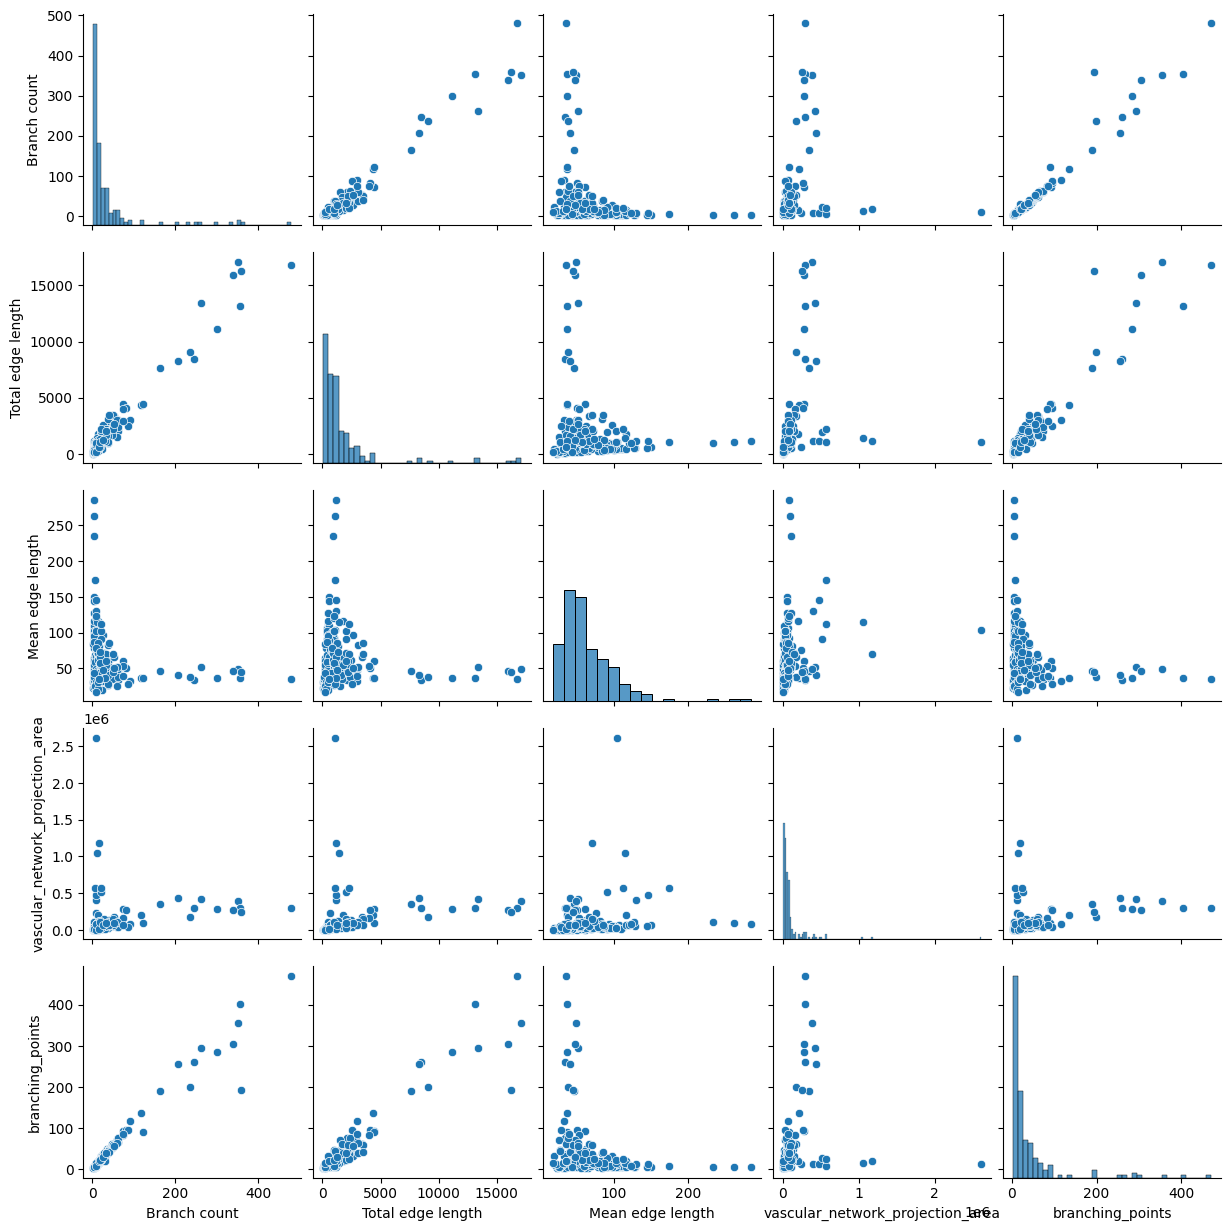

In [9]:
sns.pairplot(df_combined[['Branch count', 'Total edge length', 'Mean edge length', 'vascular_network_projection_area', 'branching_points']])
plt.show()

In [11]:
# 2. Analiza zmian na poziomach grafów

        Total edge length              Mean edge length            tortuosity  \
                     mean          std             mean        std       mean   
Level 3        649.252333  1053.216840        91.107520  70.191722   3.181775   
Level 4       1067.258876  1920.446330        71.802083  28.709738   3.919467   
Level 5       1666.989862  2991.726894        61.730549  25.092734   3.819103   
Level 6       2166.626763  3462.696327        59.371406  31.128080   3.840124   
Level 7       2495.456900  3441.369207        53.349600  22.335131   3.372224   
Level 8       2964.974462  3825.081736        52.250107  24.814466   3.584458   

                   
              std  
Level 3  1.215588  
Level 4  2.391785  
Level 5  4.202850  
Level 6  2.535938  
Level 7  1.031613  
Level 8  1.834307  


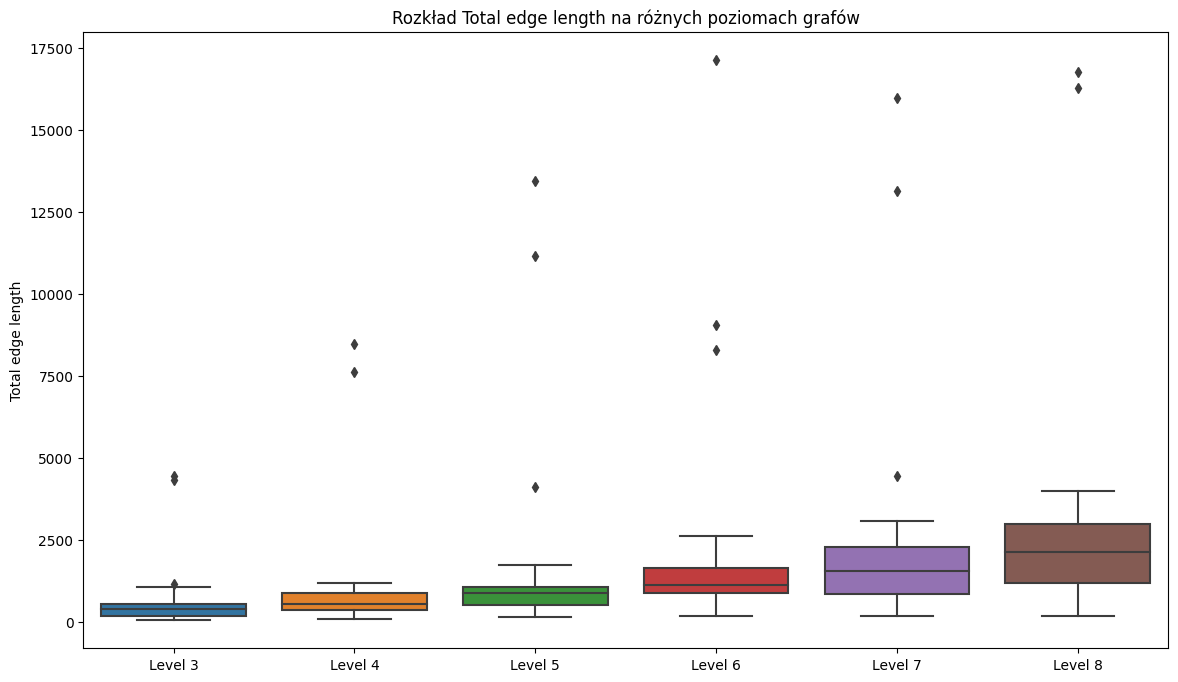

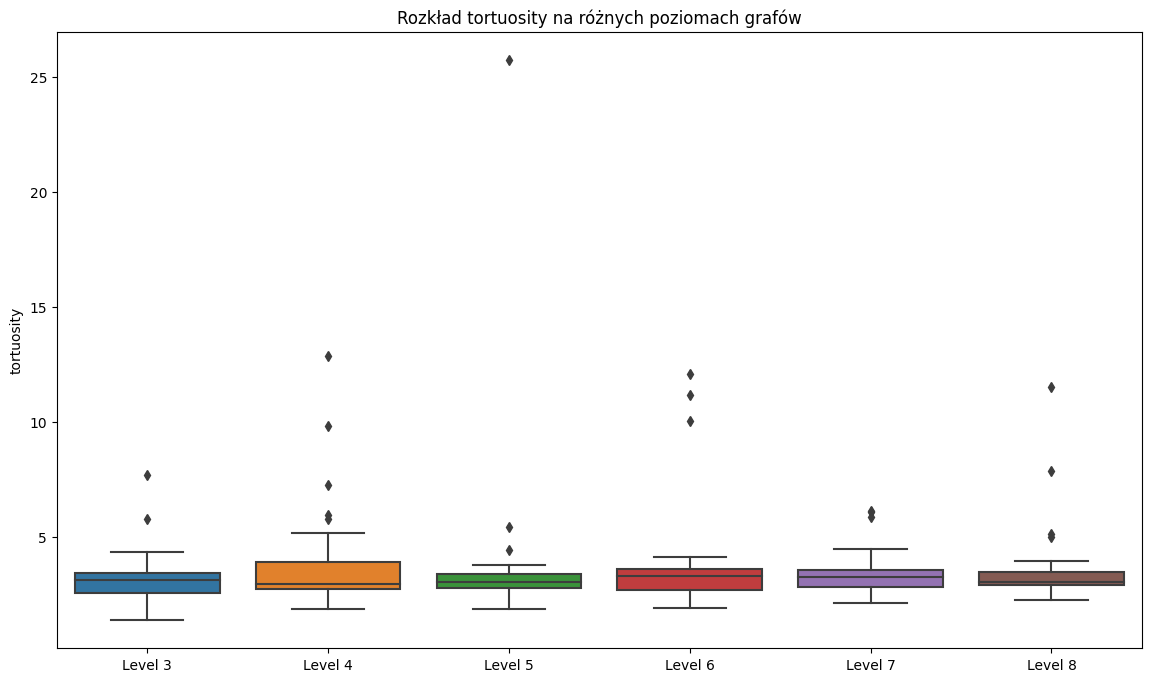

In [13]:
mean_std = df_combined.groupby(level=0).agg(['mean', 'std'])[['Total edge length', 'Mean edge length', 'tortuosity']]
print(mean_std)

# Wykresy pudełkowe (box plots) dla kluczowych zmiennych
plt.figure(figsize=(14, 8))
sns.boxplot(x=df_combined.index.get_level_values(0), y='Total edge length', data=df_combined)
plt.title('Rozkład Total edge length na różnych poziomach grafów')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x=df_combined.index.get_level_values(0), y='tortuosity', data=df_combined)
plt.title('Rozkład tortuosity na różnych poziomach grafów')
plt.show()

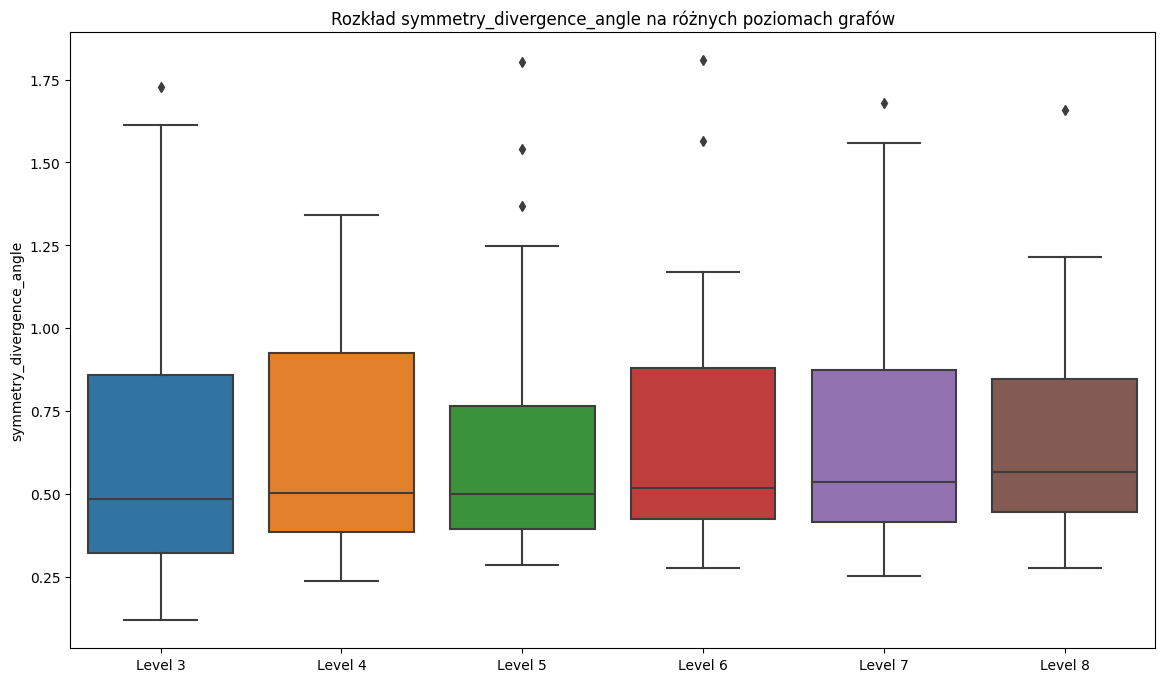

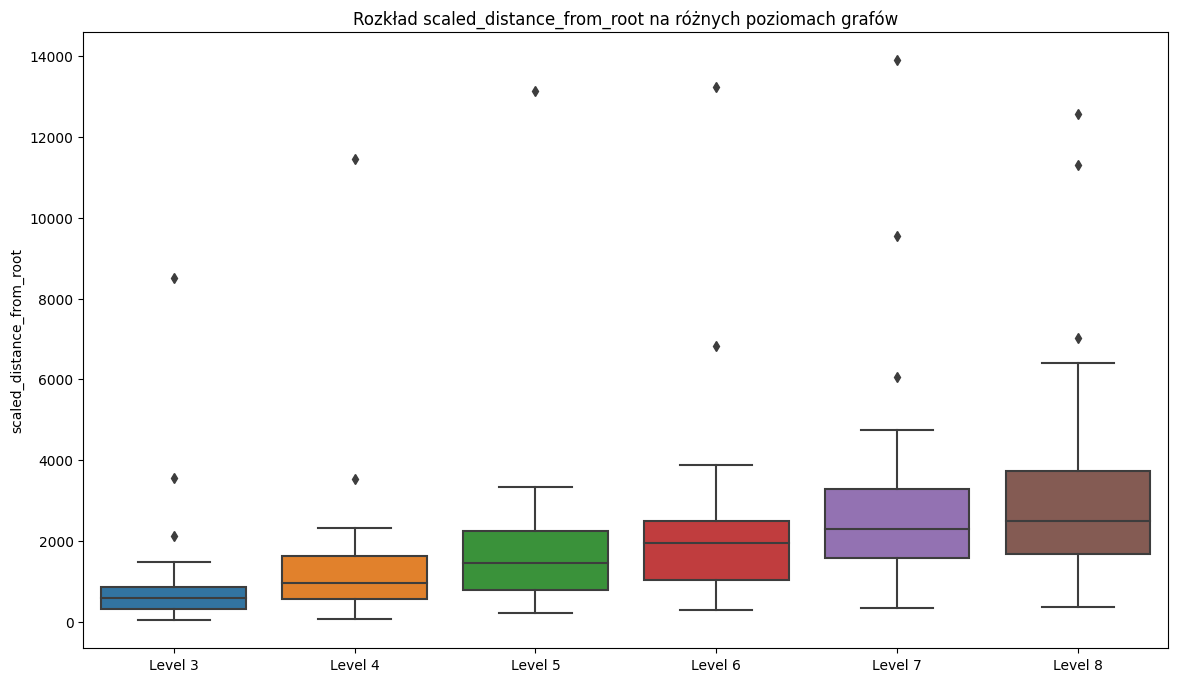

In [17]:
# 3. Porównanie symetrii i rozbieżności
# Porównanie symmetry_divergence_angle i scaled_distance_from_root
plt.figure(figsize=(14, 8))
sns.boxplot(x=df_combined.index.get_level_values(0), y='symmetry_divergence_angle', data=df_combined)
plt.title('Rozkład symmetry_divergence_angle na różnych poziomach grafów')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x=df_combined.index.get_level_values(0), y='scaled_distance_from_root', data=df_combined)
plt.title('Rozkład scaled_distance_from_root na różnych poziomach grafów')
plt.show()


In [19]:
# 4. Modelowanie predykcyjne

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Przygotowanie danych do modelu
X = df_combined[['Branch count', 'Total edge length', 'Mean edge length', 'vascular_network_projection_area', 'branching_points']]
y = df_combined['tortuosity']

# Podział danych na zestaw treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Trenowanie modelu regresji losowego lasu
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predykcje
y_pred = model.predict(X_test)

# Ocena modelu
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 5.853856367409155


In [7]:
df_level3.head()

Branch count  Total edge length  Mean edge length  3d_volume_vasculature  \
0           7.0         223.071522         31.867360           1.271035e+05   
1           4.0         939.152883        234.788221           3.238117e+06   
2           4.0        1051.903798        262.975949           1.997672e+06   
3           4.0         259.485449         64.871362           4.943607e+05   
4          73.0        4450.350297         60.963703           3.977927e+06   

   vascular_network_projection_area  branching_points  \
0                       6951.663987                 7   
1                     111887.890027                 6   
2                      89354.226480                 6   
3                      27802.338269                 4   
4                     279175.606120                92   

   branching_points_per_pixel  Mean branch thickness  mean angle  \
0                    0.001962              12.611493    1.150032   
1                    0.000585              34.960143    0.692855   
2                    0.000741              28.060932    0.659574   
3                    0.002232              21.314255    0.795327   
4                    0.001147              16.489923    0.732422   

   absolute_distance  distance_from_root  tortuosity  \
0         116.949568          965.986803    2.739705   
1         392.864684         1370.961914    3.269641   
2         260.872298          874.011140    3.163591   
3         195.151346          612.486454    5.785475   
4         690.392307         3629.710954    3.672258   

   symmetry_divergence_angle  scaled_distance_from_root  
0                   1.726276                 833.288052  
1                   0.232653                1367.048975  
2                   0.471036                 850.119412  
3                   0.350939                 608.520903  
4                   0.484825                3570.641163

In [9]:
df_level4.head()

Branch count  Total edge length  Mean edge length  3d_volume_vasculature  \
0          18.0         929.058187         51.614344           1.645034e+06   
1           8.0         611.062423         76.382803           5.381907e+06   
2           8.0         965.492416        120.686552           1.222202e+06   
3           4.0         314.729650         78.682413           3.452394e+05   
4         164.0        7614.147930         46.427731           4.078803e+06   

   vascular_network_projection_area  branching_points  \
0                      80831.952882                20   
1                     232962.715908                12   
2                      71450.366753                11   
3                      20689.591039                 6   
4                     346530.655465               190   

   branching_points_per_pixel  Mean branch thickness  mean angle  \
0                    0.001962              22.820583    0.724393   
1                    0.000585              29.409267    0.956095   
2                    0.000741              21.890278    0.801800   
3                    0.002232              21.101495    0.837127   
4                    0.001147              12.550188    0.723611   

   absolute_distance  distance_from_root  tortuosity  \
0         181.982117         1452.449207    2.874358   
1         603.681641         2153.798654    7.232124   
2         505.379972         1706.172850    3.730202   
3         278.267016          882.816717    3.134144   
4         734.302562         3606.785263    3.447801   

   symmetry_divergence_angle  scaled_distance_from_root  
0                   0.967582                1386.863726  
1                   0.286884                2147.279956  
2                   0.425123                1680.804702  
3                   0.318224                 879.060870  
4                   0.503688                3546.449262

In [11]:
df_level5.head()

Branch count  Total edge length  Mean edge length  3d_volume_vasculature  \
0          82.0        4104.923546         50.060043           4.367345e+06   
1          16.0        1055.778013         65.986126           1.712410e+06   
2          14.0         645.117399         46.079814           4.835601e+05   
3           9.0         875.977112         97.330790           7.994422e+05   
4         261.0       13437.898824         51.486202           3.254778e+06   

   vascular_network_projection_area  branching_points  \
0                     265276.106576                95   
1                      81148.785962                21   
2                      30130.569165                18   
3                      53303.766447                12   
4                     418829.987589               294   

   branching_points_per_pixel  Mean branch thickness  mean angle  \
0                    0.001962              17.522121    0.651160   
1                    0.000585              18.927751    0.821654   
2                    0.000741              16.794707    0.886764   
3                    0.002232              17.270532    0.744167   
4                    0.001147               8.597442    0.803013   

   absolute_distance  distance_from_root  tortuosity  \
0         358.231649         2382.432748    3.287751   
1         644.036892         3175.120294    3.452040   
2         613.567827         2070.633317    2.648248   
3         329.743977         1124.175919    2.951458   
4         771.988780         3377.685641    3.767321   

   symmetry_divergence_angle  scaled_distance_from_root  
0                   0.676645                2311.549855  
1                   0.297845                3148.463569  
2                   0.402880                2042.887805  
3                   0.287377                1117.988541  
4                   0.445807                3331.927570

In [13]:
df_level5.head()

Branch count  Total edge length  Mean edge length  3d_volume_vasculature  \
0          82.0        4104.923546         50.060043           4.367345e+06   
1          16.0        1055.778013         65.986126           1.712410e+06   
2          14.0         645.117399         46.079814           4.835601e+05   
3           9.0         875.977112         97.330790           7.994422e+05   
4         261.0       13437.898824         51.486202           3.254778e+06   

   vascular_network_projection_area  branching_points  \
0                     265276.106576                95   
1                      81148.785962                21   
2                      30130.569165                18   
3                      53303.766447                12   
4                     418829.987589               294   

   branching_points_per_pixel  Mean branch thickness  mean angle  \
0                    0.001962              17.522121    0.651160   
1                    0.000585              18.927751    0.821654   
2                    0.000741              16.794707    0.886764   
3                    0.002232              17.270532    0.744167   
4                    0.001147               8.597442    0.803013   

   absolute_distance  distance_from_root  tortuosity  \
0         358.231649         2382.432748    3.287751   
1         644.036892         3175.120294    3.452040   
2         613.567827         2070.633317    2.648248   
3         329.743977         1124.175919    2.951458   
4         771.988780         3377.685641    3.767321   

   symmetry_divergence_angle  scaled_distance_from_root  
0                   0.676645                2311.549855  
1                   0.297845                3148.463569  
2                   0.402880                2042.887805  
3                   0.287377                1117.988541  
4                   0.445807                3331.927570

In [15]:
df_level6.head()

Branch count  Total edge length  Mean edge length  3d_volume_vasculature  \
0         206.0        8290.952980         40.247345           6.519884e+06   
1          26.0        1663.541781         63.982376           1.800206e+06   
2          19.0        1018.443105         53.602269           5.056420e+05   
3          16.0         947.485638         59.217852           5.655948e+05   
4         352.0       17127.452783         48.657536           2.295641e+06   

   vascular_network_projection_area  branching_points  \
0                     433688.601178               256   
1                     102315.193415                31   
2                      39703.409846                24   
3                      44391.509301                23   
4                     388925.216998               355   

   branching_points_per_pixel  Mean branch thickness  mean angle  \
0                    0.001962              12.679617    0.721140   
1                    0.000585              15.200399    0.827475   
2                    0.000741              12.012096    0.775230   
3                    0.002232              14.409778    0.865100   
4                    0.001147               6.665567    0.781961   

   absolute_distance  distance_from_root  tortuosity  \
0         419.519968         2943.277745    3.303306   
1         679.798809         3441.303044    3.347374   
2         672.207482         2301.236732    2.657001   
3         423.657485         1487.360912    2.739290   
4         808.073831         3298.504605    3.448250   

   symmetry_divergence_angle  scaled_distance_from_root  
0                   0.772525                2821.435722  
1                   0.294776                3410.514091  
2                   0.410987                2271.898654  
3                   0.343156                1473.253181  
4                   0.428053                3257.713786

In [17]:
df_level7.head()

Branch count  Total edge length  Mean edge length  3d_volume_vasculature  \
0         355.0       13136.079041         37.003040           2.178905e+06   
1          37.0        2218.024055         59.946596           1.397967e+06   
2          25.0        1396.464106         55.858564           1.122915e+06   
3          32.0        1306.622827         40.831963           6.376421e+05   
4         339.0       15969.427411         47.107455           1.169656e+06   

   vascular_network_projection_area  branching_points  \
0                     291746.794002               403   
1                     107692.744621                44   
2                      67977.800285                29   
3                      58989.111494                39   
4                     276569.943736               305   

   branching_points_per_pixel  Mean branch thickness  mean angle  \
0                    0.001962               7.455600    0.855204   
1                    0.000585              14.251740    0.813665   
2                    0.000741              11.948563    0.721489   
3                    0.002232              10.396922    0.764423   
4                    0.001147               4.797341    0.805375   

   absolute_distance  distance_from_root  tortuosity  \
0         471.319882         3205.358945    3.269401   
1         728.992774         3814.075621    3.453407   
2         698.716121         2419.784209    2.967080   
3         472.790347         1693.244175    3.532516   
4         833.039631         3346.507387    3.508605   

   symmetry_divergence_angle  scaled_distance_from_root  
0                   0.720416                3088.289870  
1                   0.305765                3774.862392  
2                   0.371845                2394.515799  
3                   0.371033                1675.555413  
4                   0.435575                3306.784073

In [19]:
df_level8.head()

Branch count  Total edge length  Mean edge length  3d_volume_vasculature  \
0         480.0       16776.477624         34.950995           1.512274e+06   
1          52.0        3427.655509         65.916452           2.311689e+06   
2          31.0        1434.559549         46.276114           7.028606e+05   
3          48.0        1687.436339         35.154924           4.732620e+05   
4         359.0       16275.253217         45.334967           9.288886e+05   

   vascular_network_projection_area  branching_points  \
0                     295540.026103               470   
1                     173644.108741                62   
2                      52211.968194                33   
3                      48017.188371                61   
4                     247170.966020               193   

   branching_points_per_pixel  Mean branch thickness  mean angle  \
0                    0.001962               5.254756    0.803803   
1                    0.000585              12.329439    0.825197   
2                    0.000741              11.097638    0.756836   
3                    0.002232               8.943743    0.819259   
4                    0.001147               3.983155    0.824289   

   absolute_distance  distance_from_root  tortuosity  \
0         493.640872         3401.884849    3.436154   
1         754.334592         3902.816111    3.529967   
2         751.454129         2623.693199    3.283990   
3         503.072045         1884.708277    2.377274   
4         838.056228         3445.002145    3.510113   

   symmetry_divergence_angle  scaled_distance_from_root  
0                   0.781130                3256.362306  
1                   0.308570                3863.283128  
2                   0.367309                2599.208952  
3                   0.367803                1864.987210  
4                   0.502529                3396.040071

In [21]:
# Dodajemy kolumnę 'level' do każdego dataframe'u
df_level3['level'] = 3
df_level4['level'] = 4
df_level5['level'] = 5
df_level6['level'] = 6
df_level7['level'] = 7
df_level8['level'] = 8

# Łączymy wszystkie dataframe'y w jeden
combined_df = pd.concat([df_level3, df_level4, df_level5, df_level6, df_level7, df_level8])

# Wyświetlamy kilka pierwszych wierszy połączonego dataframe'u
print(combined_df.head())


   Branch count  Total edge length  Mean edge length  3d_volume_vasculature  \
0           7.0         223.071522         31.867360           1.271035e+05   
1           4.0         939.152883        234.788221           3.238117e+06   
2           4.0        1051.903798        262.975949           1.997672e+06   
3           4.0         259.485449         64.871362           4.943607e+05   
4          73.0        4450.350297         60.963703           3.977927e+06   

   vascular_network_projection_area  branching_points  \
0                       6951.663987                 7   
1                     111887.890027                 6   
2                      89354.226480                 6   
3                      27802.338269                 4   
4                     279175.606120                92   

   branching_points_per_pixel  Mean branch thickness  mean angle  \
0                    0.001962              12.611493    1.150032   
1                    0.000585              34.

Histogramy dla rozkładu parametrów:

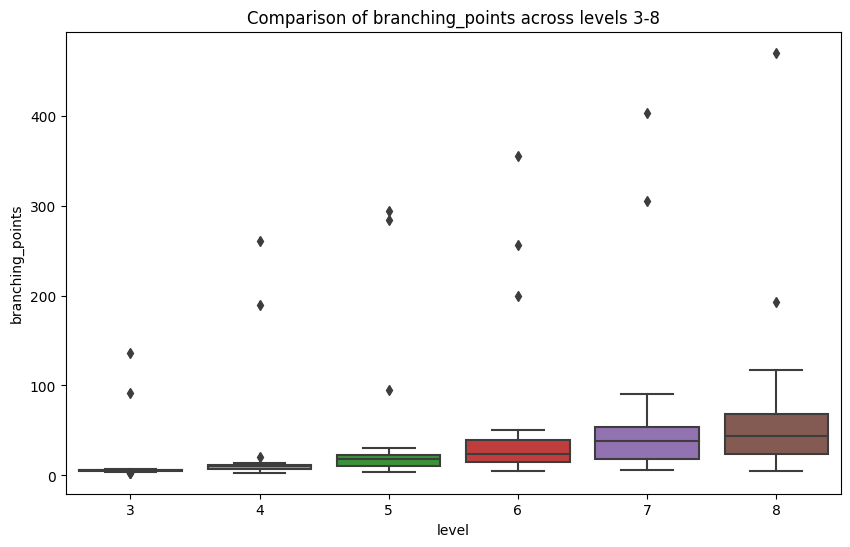

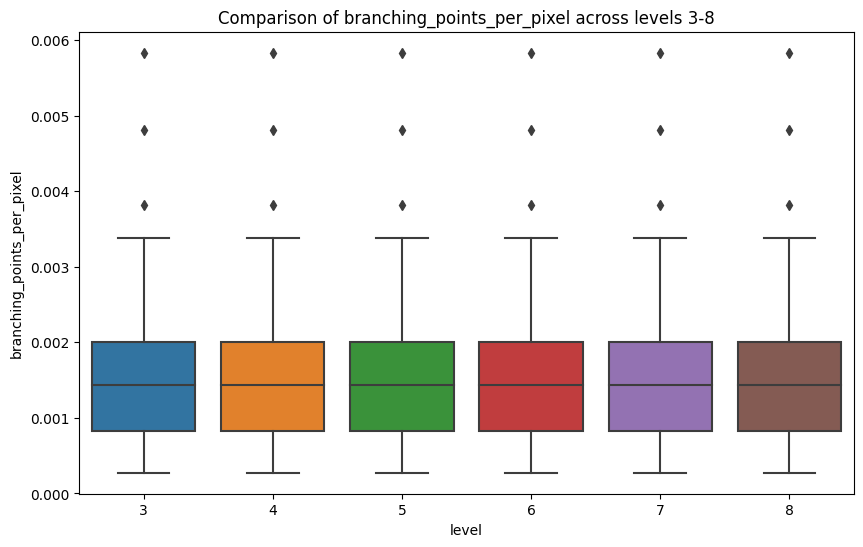

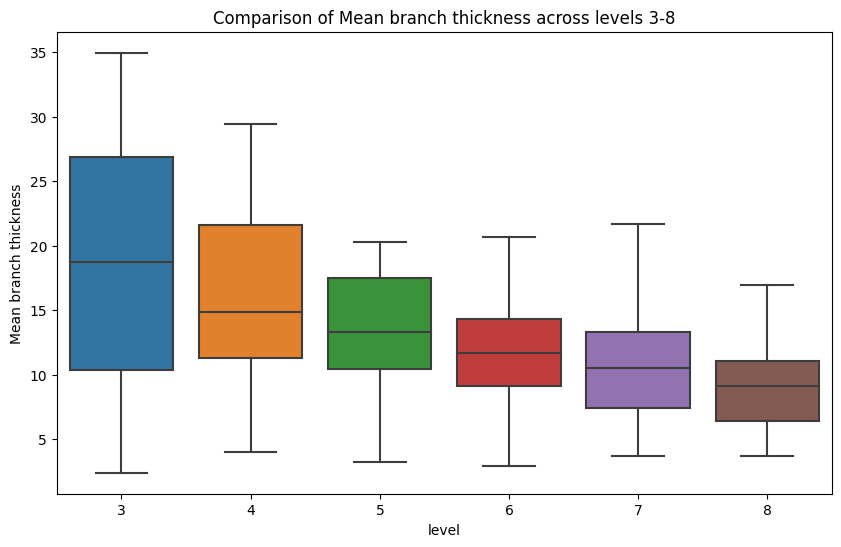

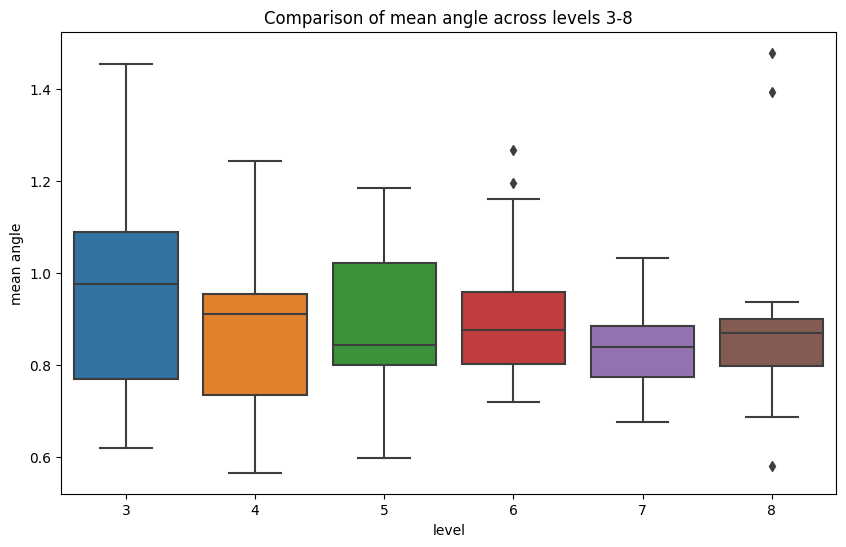

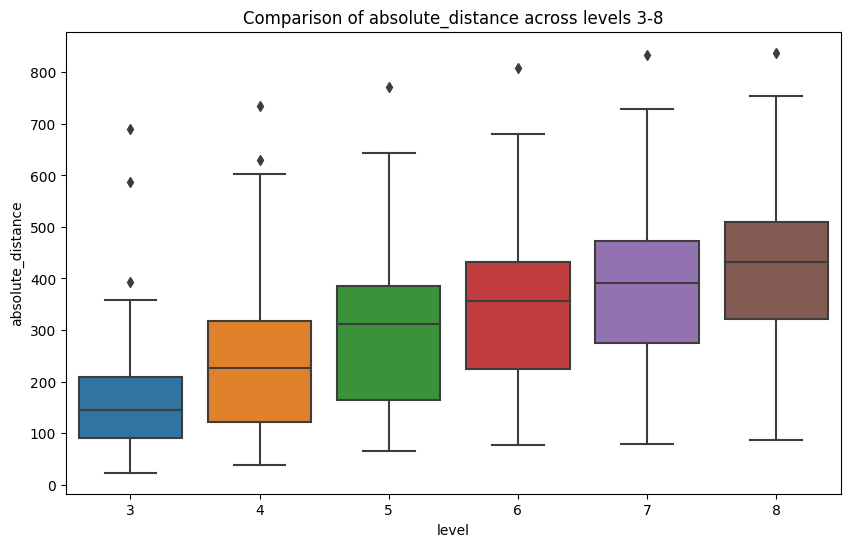

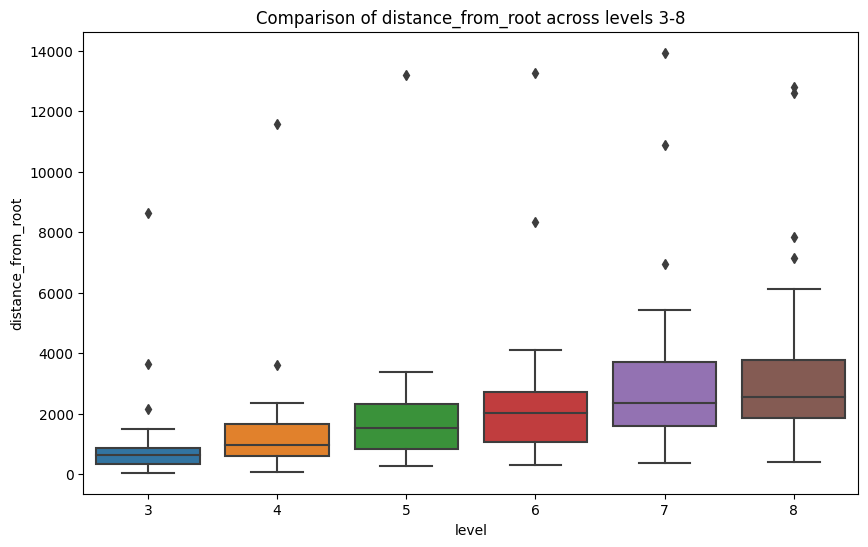

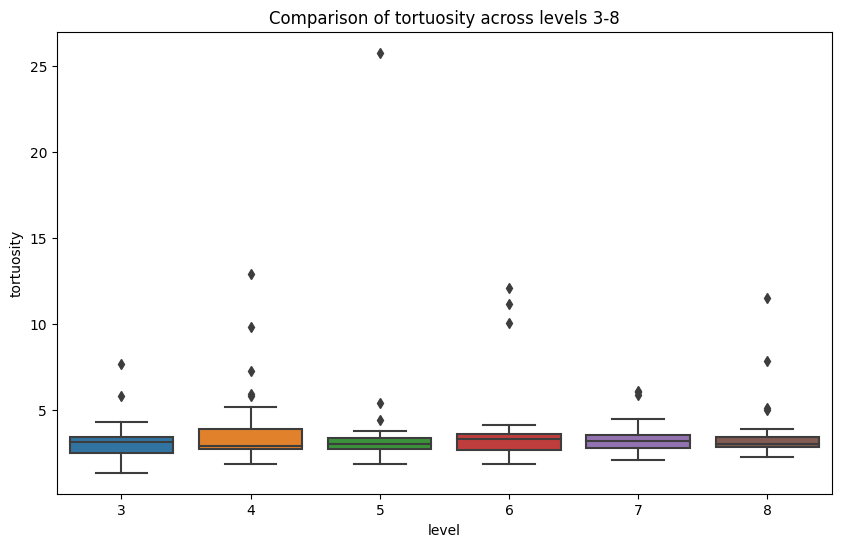

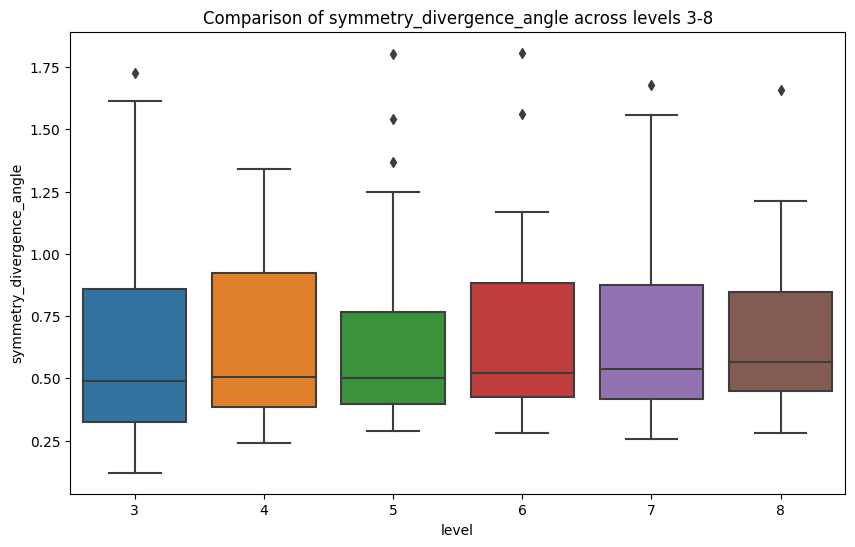

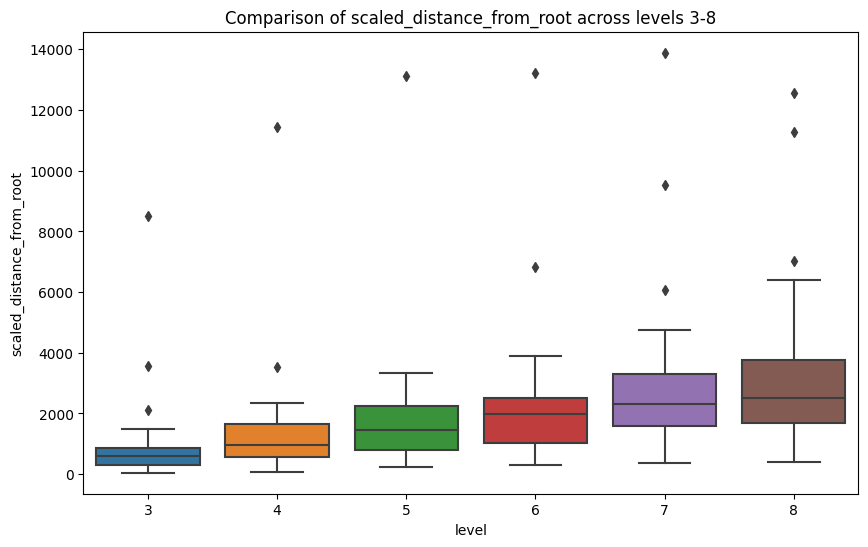

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista parametrów do porównania
parameters = [
    'branching_points',
    'branching_points_per_pixel',
    'Mean branch thickness',
    'mean angle',
    'absolute_distance',
    'distance_from_root',
    'tortuosity',
    'symmetry_divergence_angle',
    'scaled_distance_from_root'
]

# Tworzymy wykres pudełkowy dla każdego parametru
for param in parameters:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=combined_df, x='level', y=param)
    plt.title(f'Comparison of {param} across levels 3-8')
    plt.show()


Wykresy słupkowe (bar plots) dla sumarycznych wartości parametrów:

C:\Users\herma\AppData\Local\Temp\ipykernel_3680\976737769.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_df, x='level', y=param, ci=None, estimator=sum)


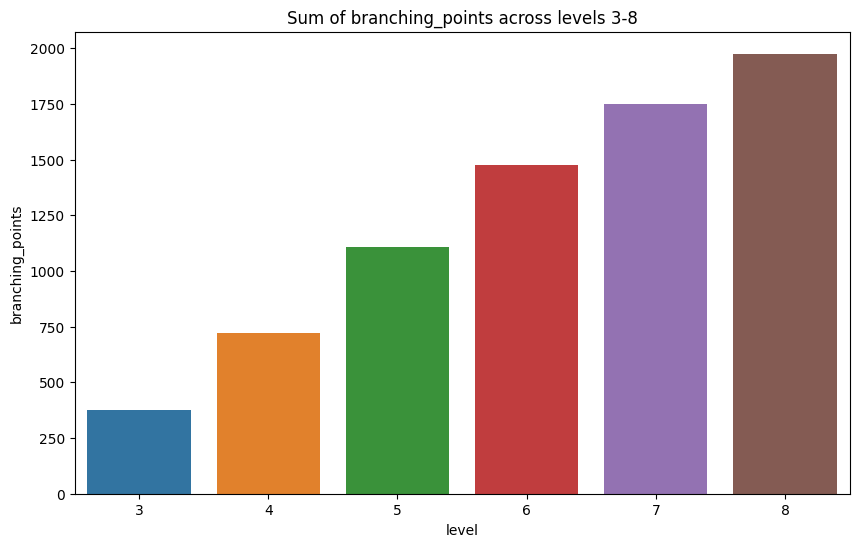

C:\Users\herma\AppData\Local\Temp\ipykernel_3680\976737769.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_df, x='level', y=param, ci=None, estimator=sum)


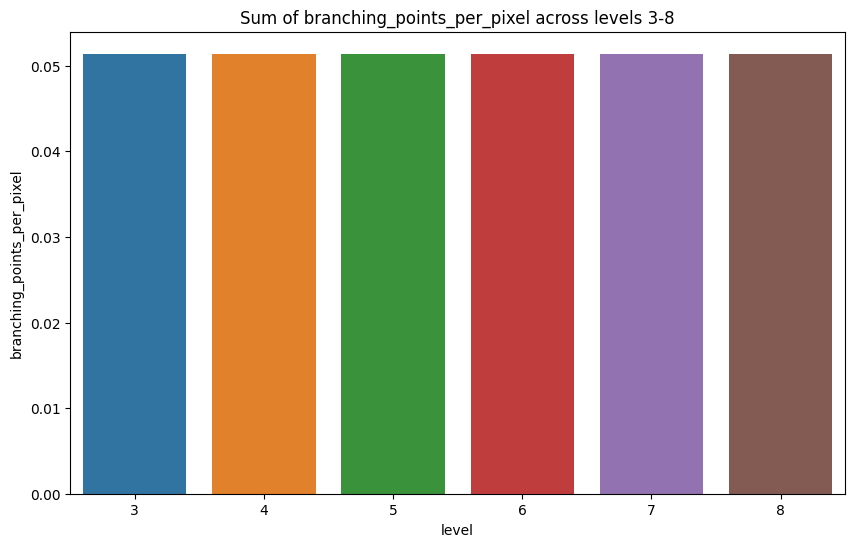

C:\Users\herma\AppData\Local\Temp\ipykernel_3680\976737769.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_df, x='level', y=param, ci=None, estimator=sum)


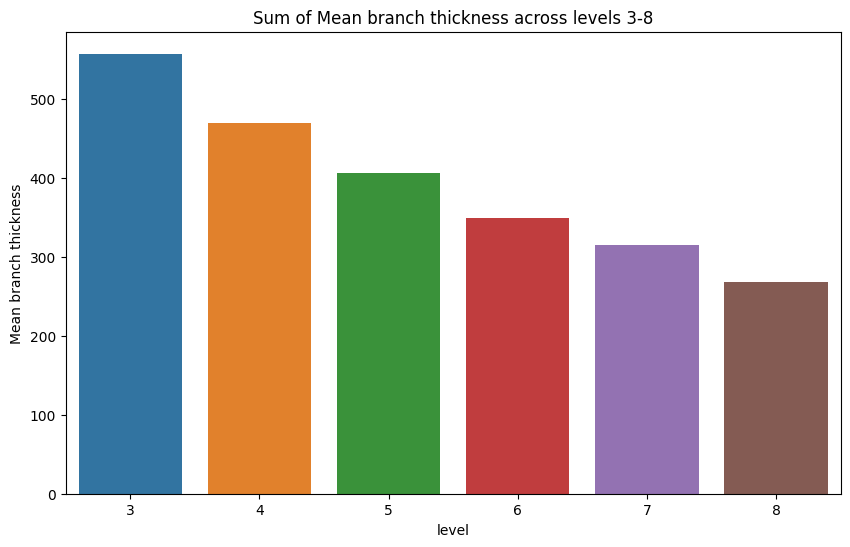

C:\Users\herma\AppData\Local\Temp\ipykernel_3680\976737769.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_df, x='level', y=param, ci=None, estimator=sum)


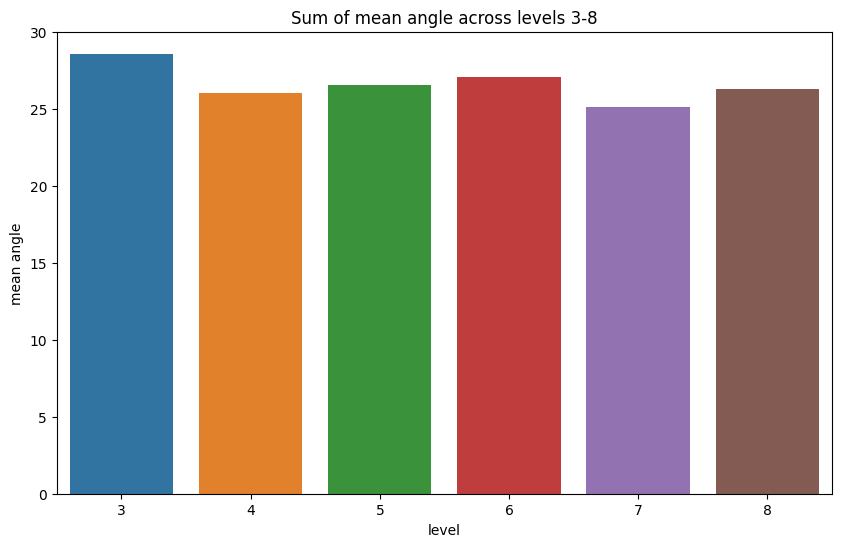

C:\Users\herma\AppData\Local\Temp\ipykernel_3680\976737769.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_df, x='level', y=param, ci=None, estimator=sum)


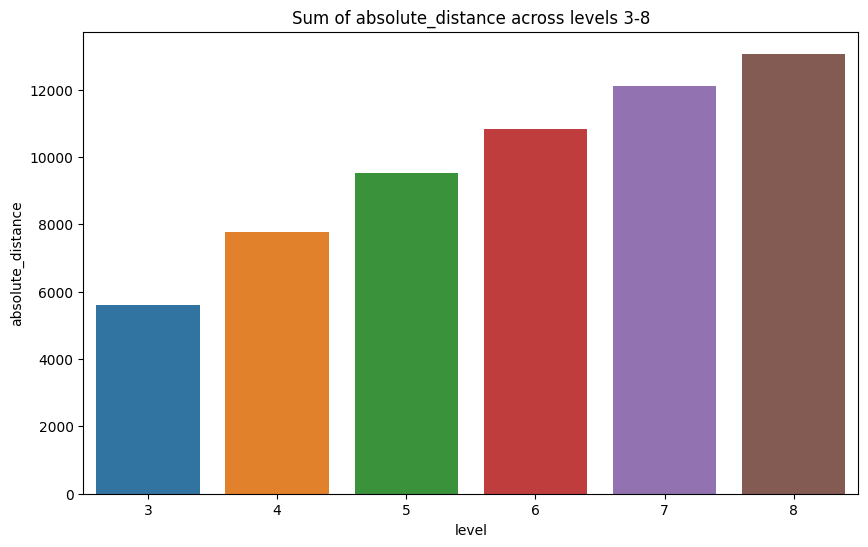

C:\Users\herma\AppData\Local\Temp\ipykernel_3680\976737769.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_df, x='level', y=param, ci=None, estimator=sum)


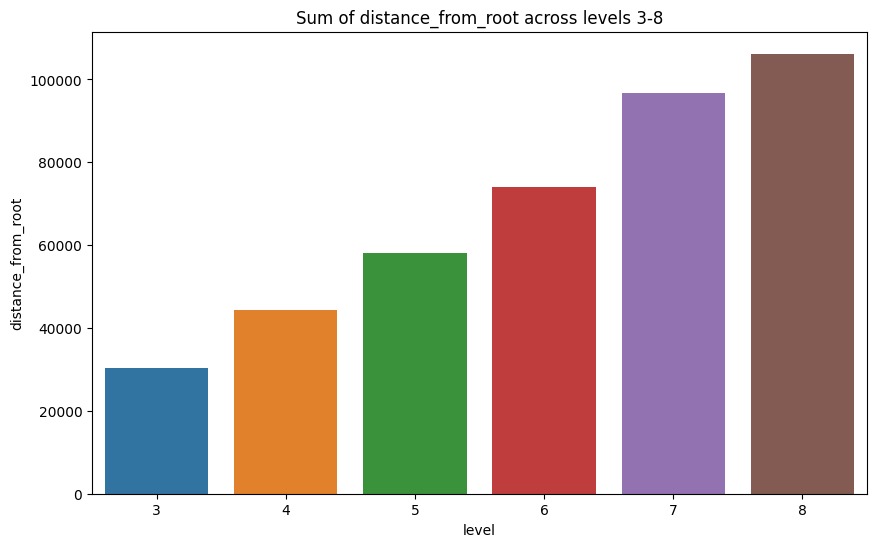

C:\Users\herma\AppData\Local\Temp\ipykernel_3680\976737769.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_df, x='level', y=param, ci=None, estimator=sum)


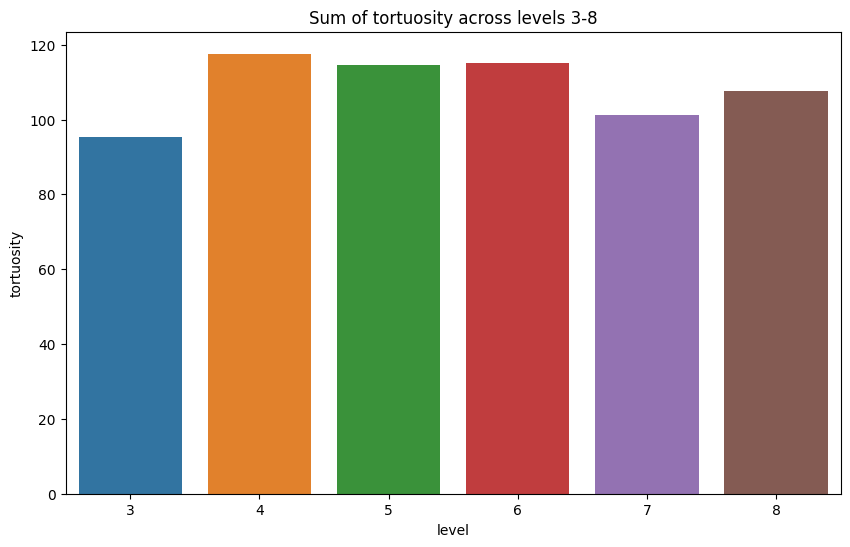

C:\Users\herma\AppData\Local\Temp\ipykernel_3680\976737769.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_df, x='level', y=param, ci=None, estimator=sum)


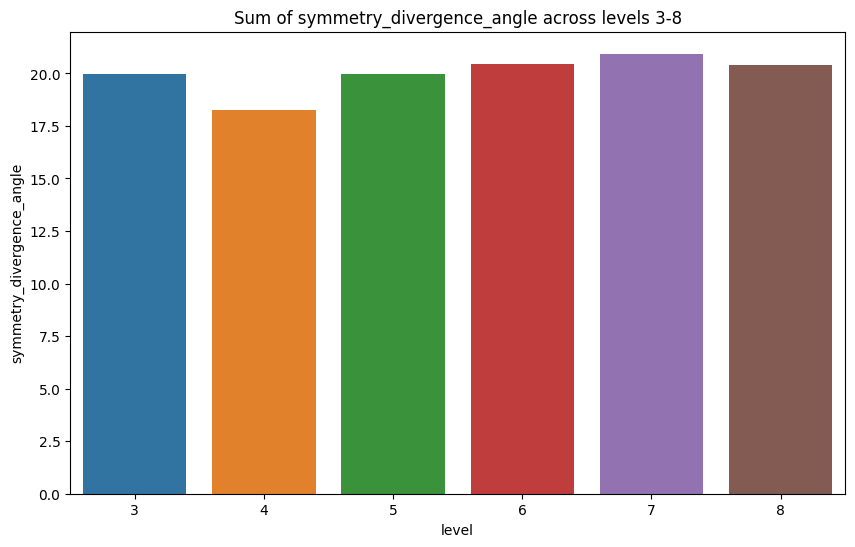

C:\Users\herma\AppData\Local\Temp\ipykernel_3680\976737769.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=combined_df, x='level', y=param, ci=None, estimator=sum)


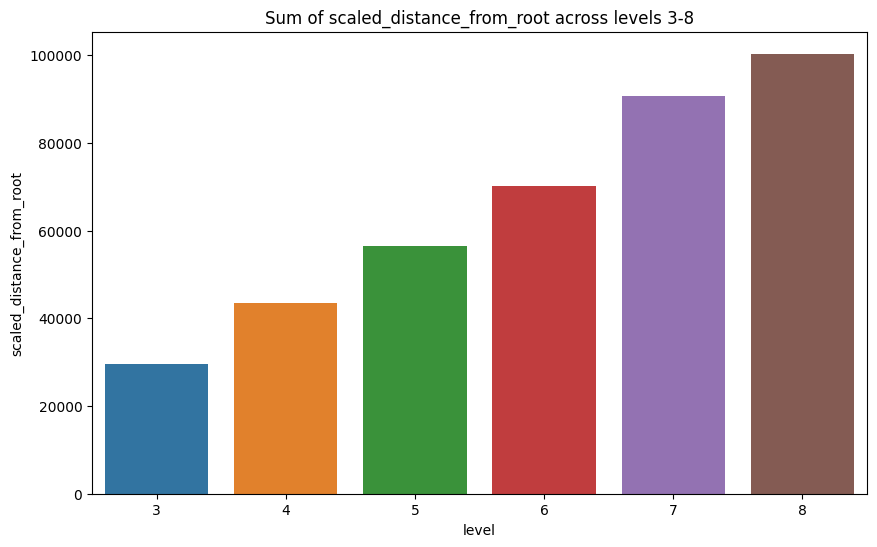

In [26]:
# Tworzymy wykres słupkowy dla sumarycznych wartości parametrów
for param in parameters:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=combined_df, x='level', y=param, ci=None, estimator=sum)
    plt.title(f'Sum of {param} across levels 3-8')
    plt.show()


In [29]:
# Obliczenie podstawowych statystyk dla każdego poziomu
statistics = combined_df.groupby('level').agg(['mean', 'median', 'std', 'min', 'max'])

# Wyświetlenie podstawowych statystyk
print(statistics)


      Branch count                               Total edge length  \
              mean median        std  min    max              mean   
level                                                                
3        10.166667    4.0  23.951220  2.0  118.0        649.252333   
4        20.666667    8.0  51.328108  4.0  246.0       1067.258876   
5        32.933333   15.0  68.845621  3.0  300.0       1666.989862   
6        44.566667   20.5  77.930864  5.0  352.0       2166.626763   
7        54.333333   30.5  83.079245  4.0  355.0       2495.456900   
8        66.200000   40.0  99.931149  5.0  480.0       2964.974462   

                                                           ...  \
            median          std         min           max  ...   
level                                                      ...   
3       405.601014  1053.216840   46.643775   4450.350297  ...   
4       539.109027  1920.446330   96.022179   8461.026244  ...   
5       886.588365  2991.726894  153.70

In [31]:
def find_outliers(df, param):
    Q1 = df[param].quantile(0.25)
    Q3 = df[param].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[param] < (Q1 - 1.5 * IQR)) | (df[param] > (Q3 + 1.5 * IQR))]
    return outliers

# Identyfikacja i wyświetlenie wartości odstających dla każdego parametru
for param in parameters:
    outliers = find_outliers(combined_df, param)
    print(f"Outliers for {param}:")
    print(outliers)


Outliers for branching_points:
    Branch count  Total edge length  Mean edge length  3d_volume_vasculature  \
4           73.0        4450.350297         60.963703           3.977927e+06   
10         118.0        4321.470205         36.622629           3.221416e+06   
4          164.0        7614.147930         46.427731           4.078803e+06   
10         246.0        8461.026244         34.394416           3.065361e+06   
0           82.0        4104.923546         50.060043           4.367345e+06   
4          261.0       13437.898824         51.486202           3.254778e+06   
10         300.0       11157.819722         37.192732           1.969377e+06   
0          206.0        8290.952980         40.247345           6.519884e+06   
4          352.0       17127.452783         48.657536           2.295641e+06   
10         236.0        9050.303311         38.348743           9.921040e+05   
0          355.0       13136.079041         37.003040           2.178905e+06   
4        

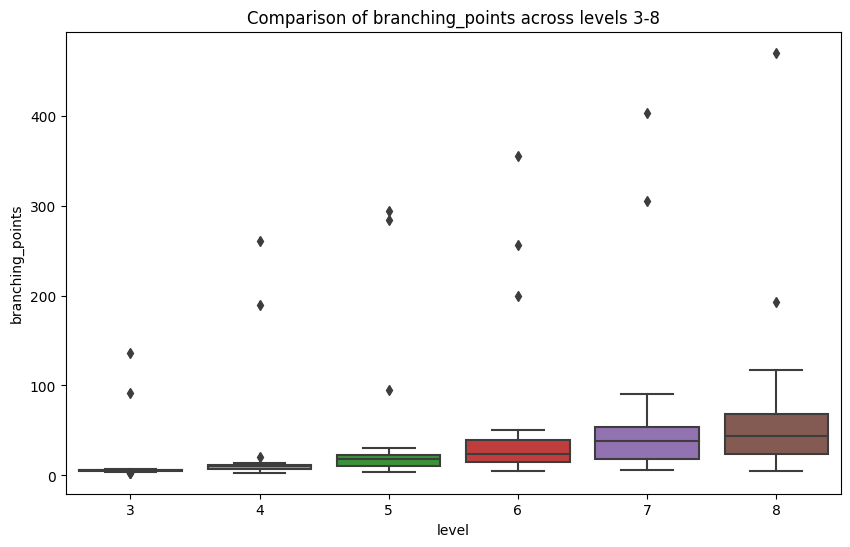

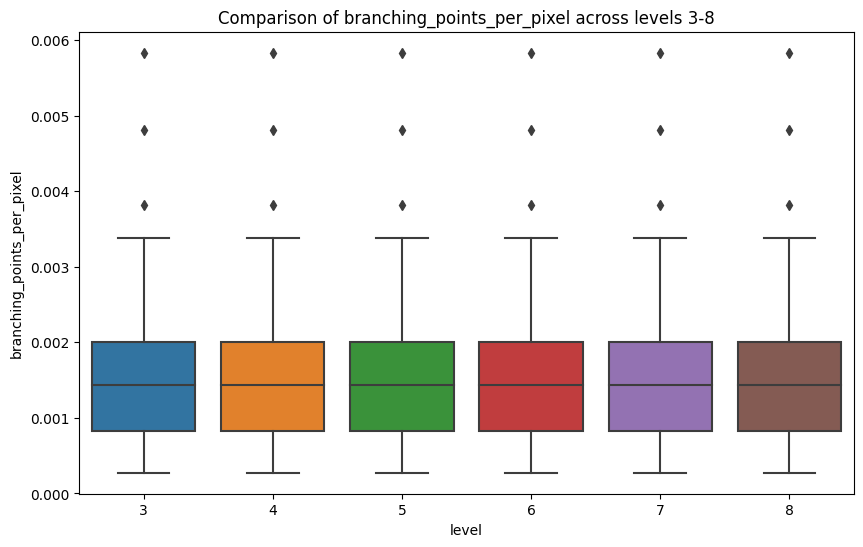

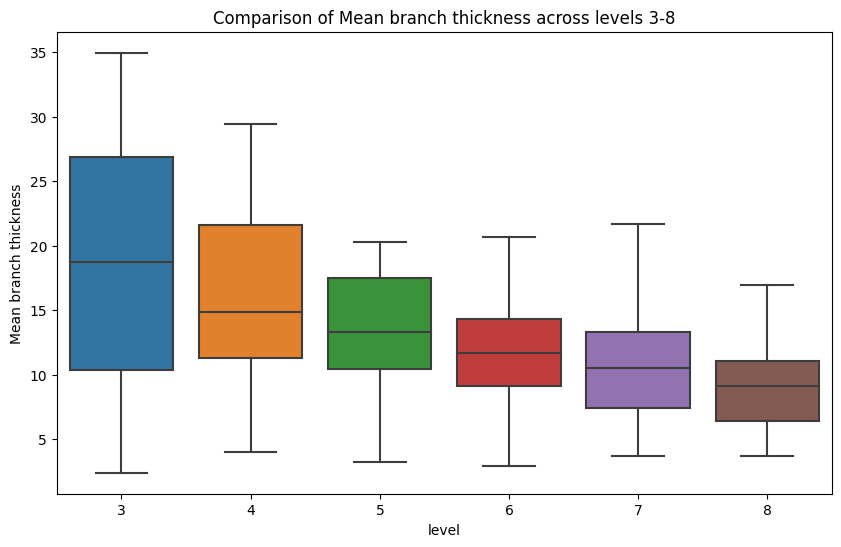

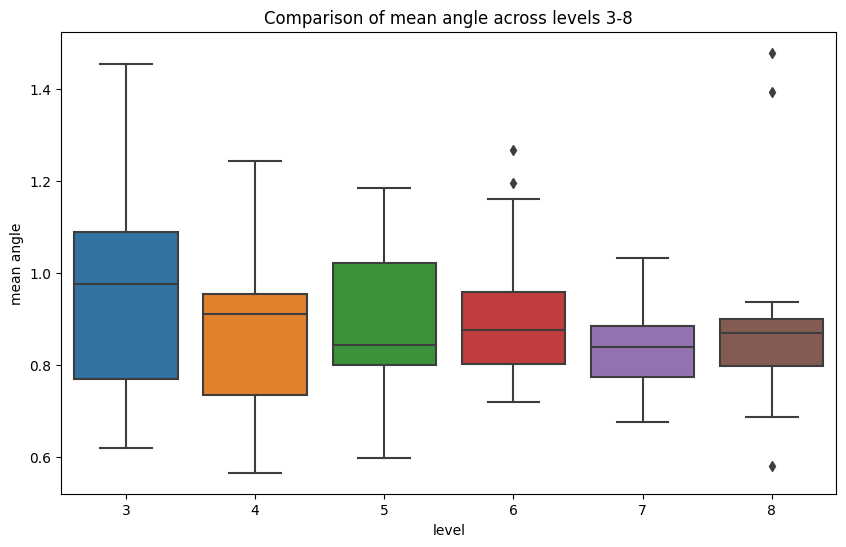

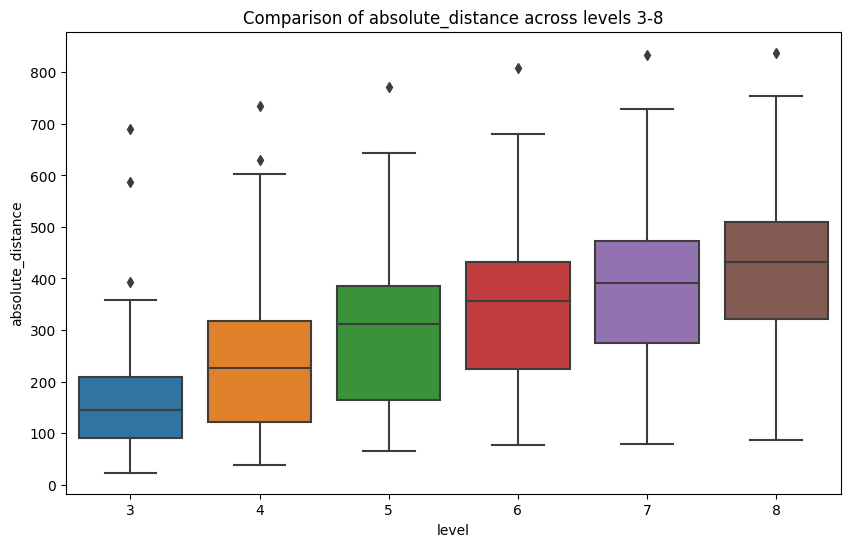

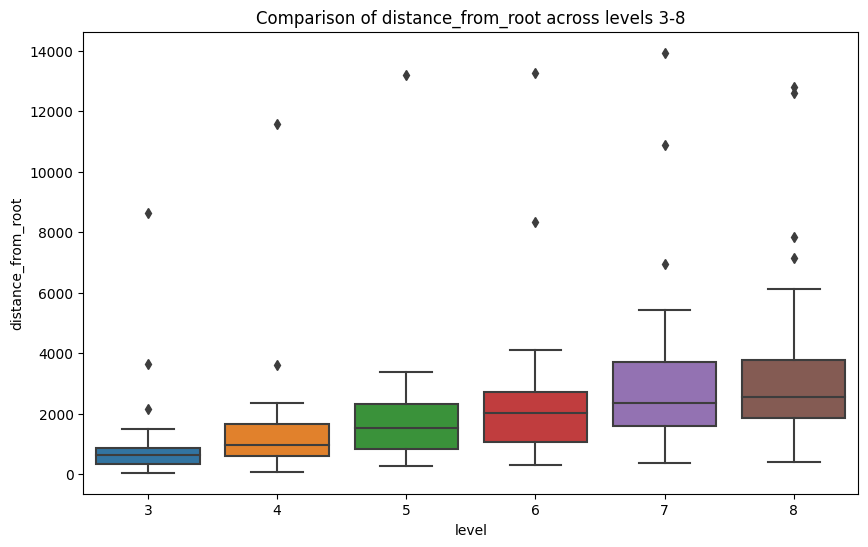

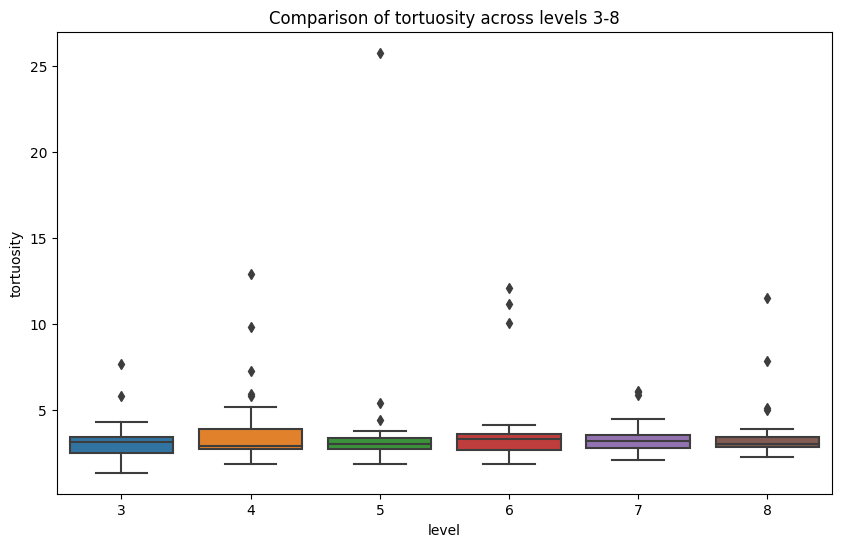

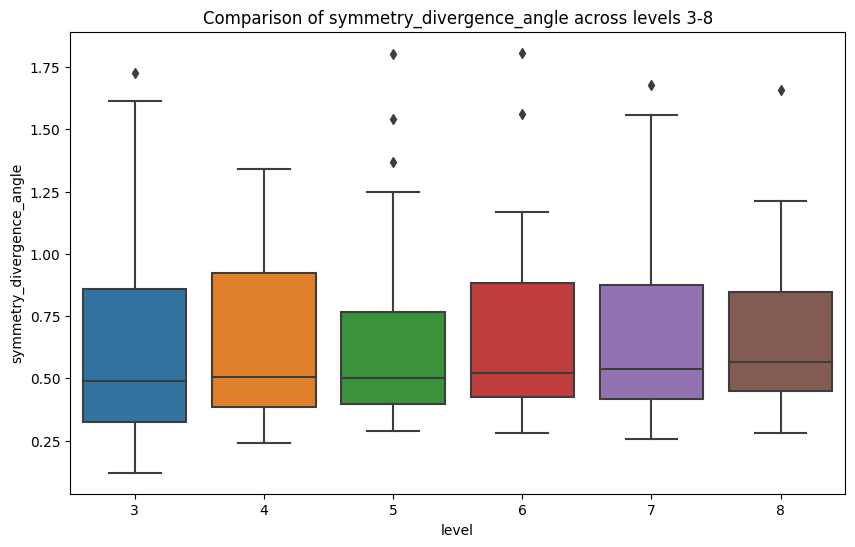

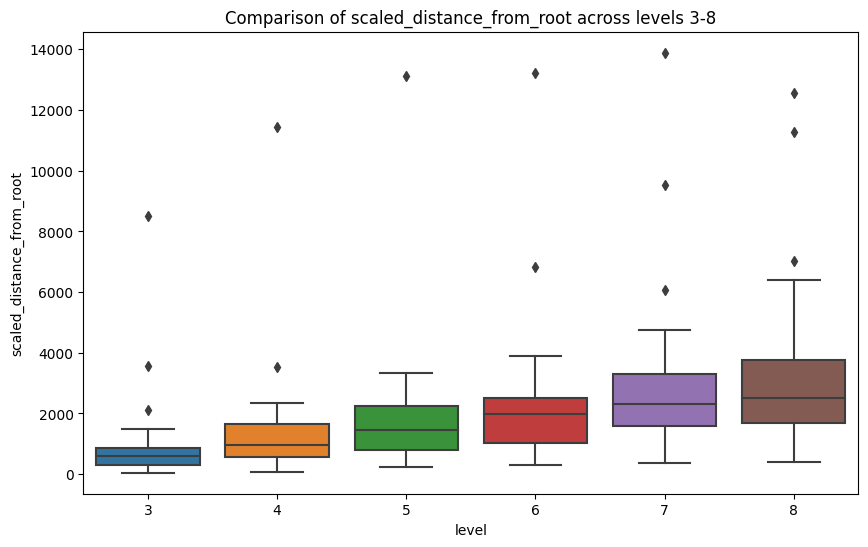

C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075:

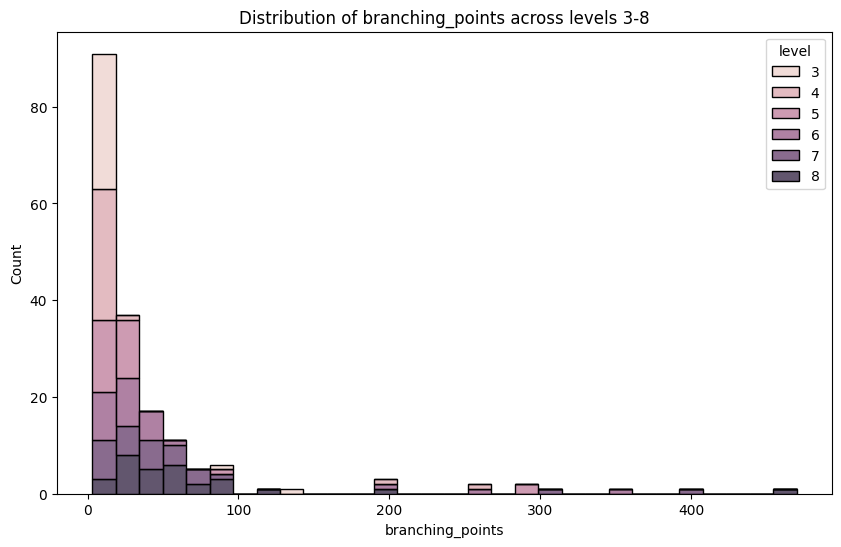

C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075:

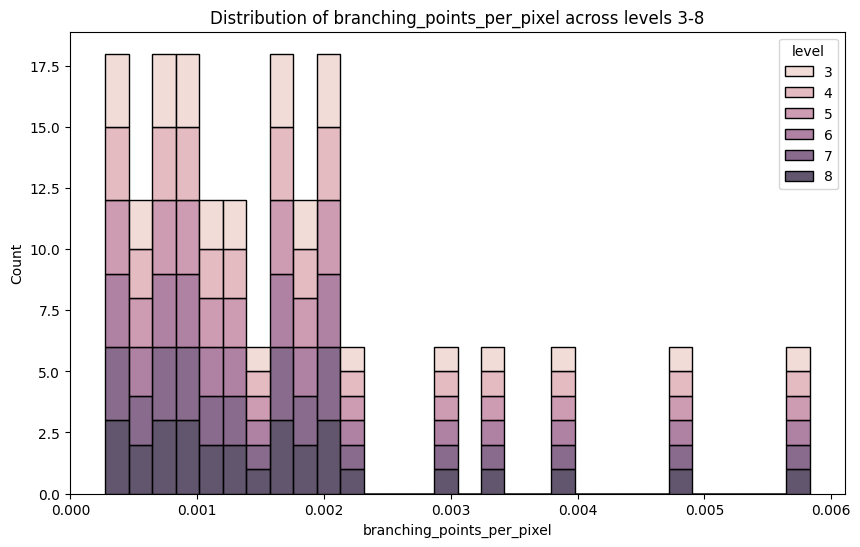

C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075:

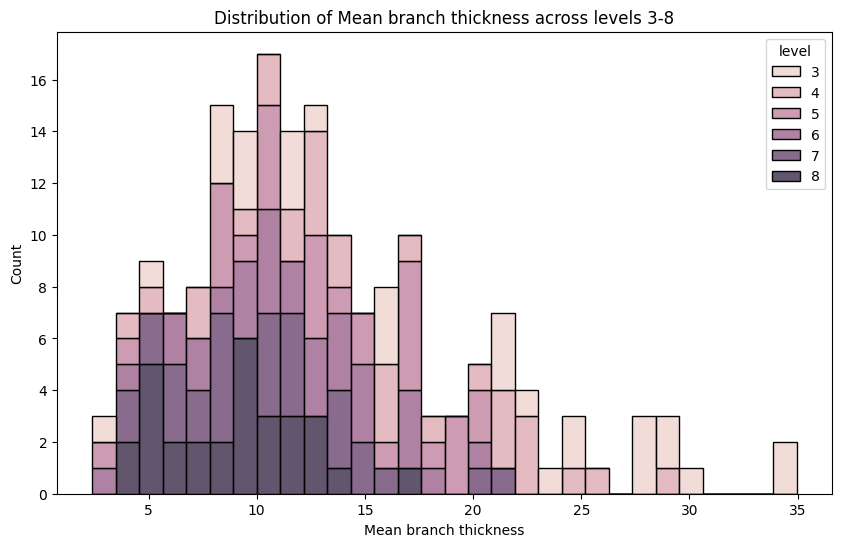

C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075:

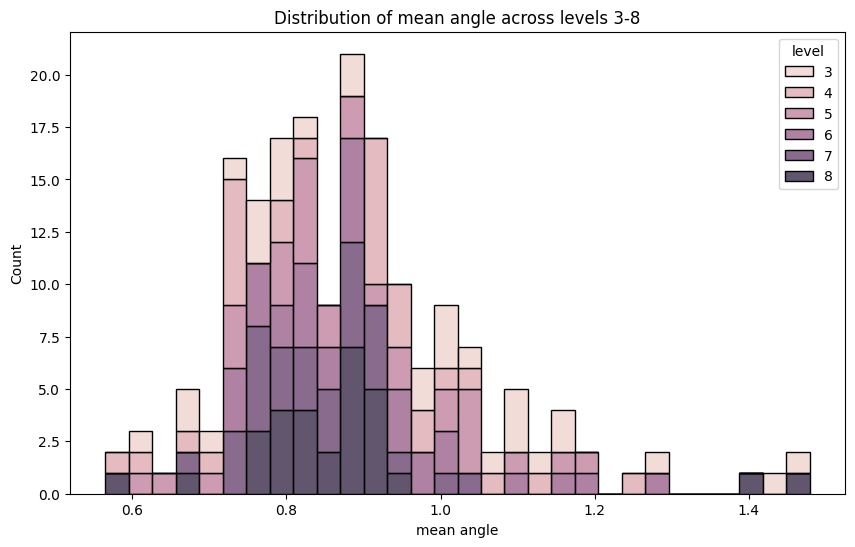

C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075:

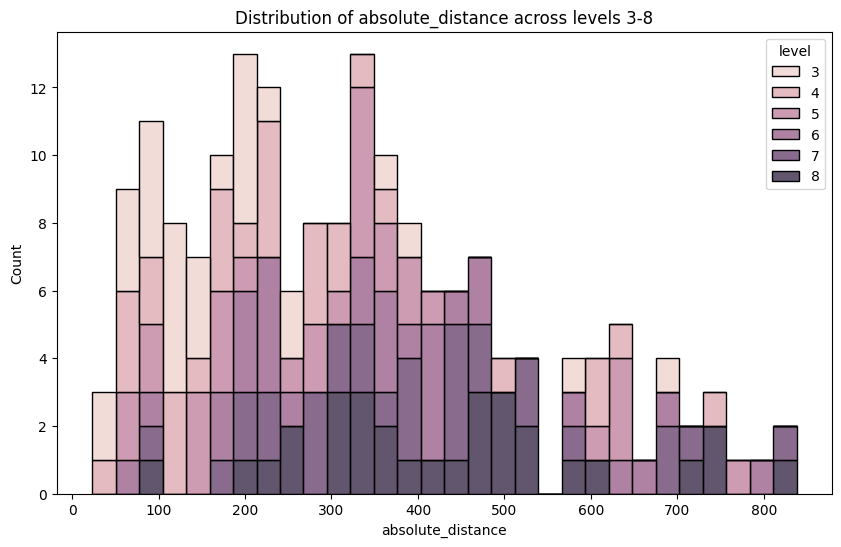

C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075:

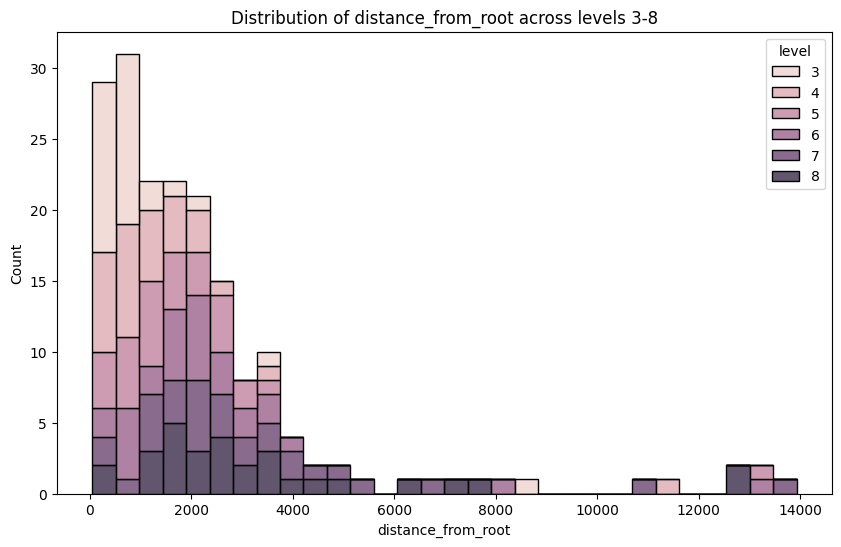

C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075:

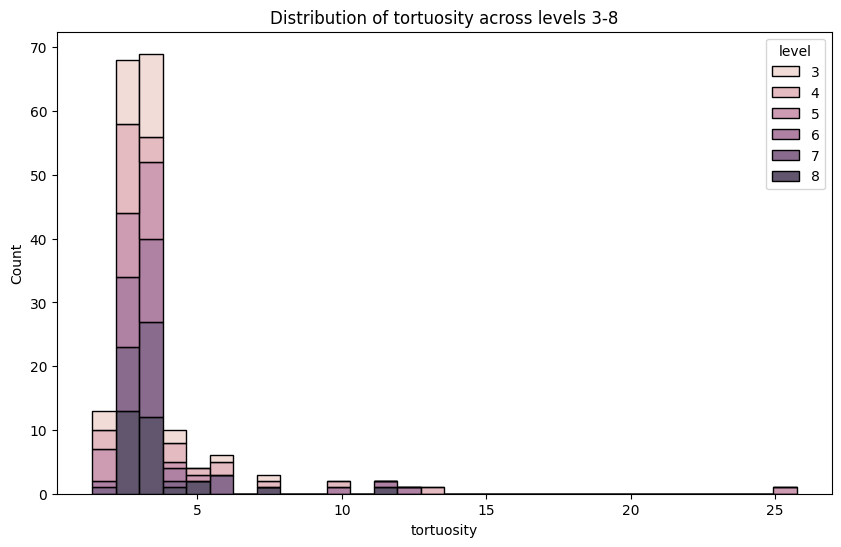

C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075:

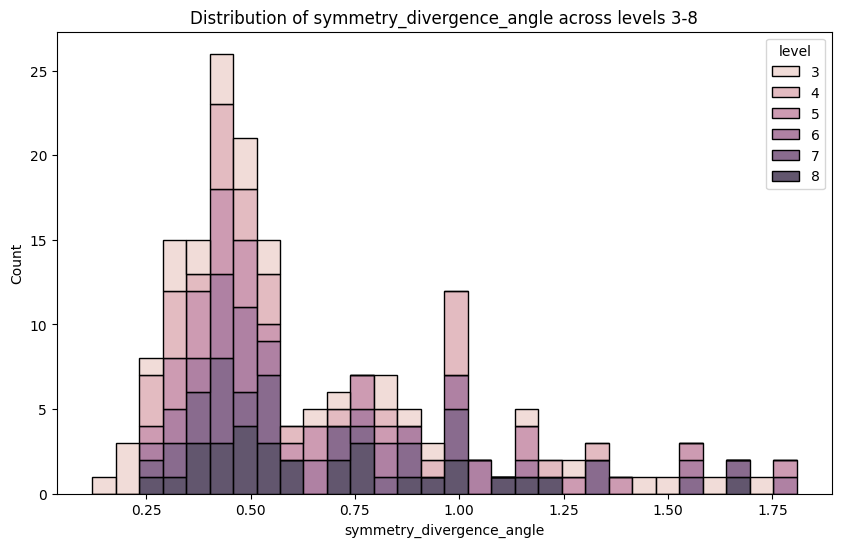

C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\herma\anaconda3\anaconda_\Lib\site-packages\seaborn\_oldcore.py:1075:

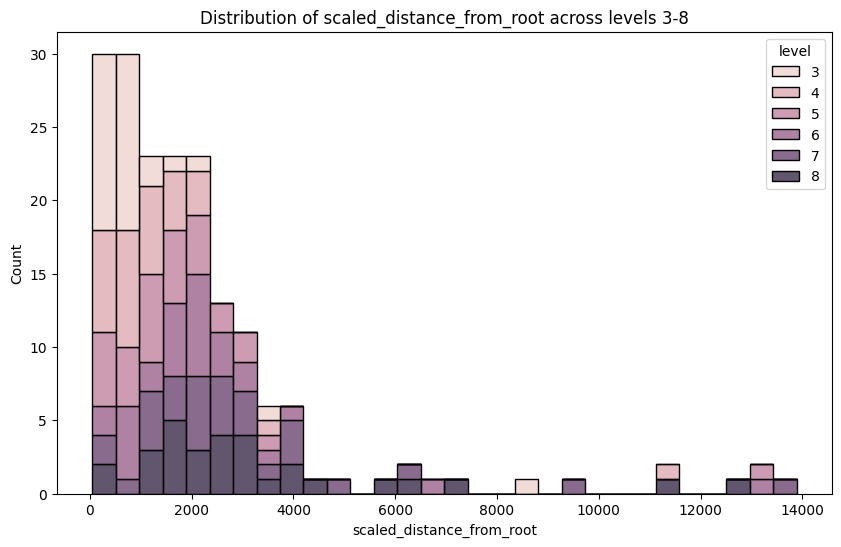

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista parametrów do porównania
parameters = [
    'branching_points',
    'branching_points_per_pixel',
    'Mean branch thickness',
    'mean angle',
    'absolute_distance',
    'distance_from_root',
    'tortuosity',
    'symmetry_divergence_angle',
    'scaled_distance_from_root'
]

# Tworzymy wykres pudełkowy dla każdego parametru
for param in parameters:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=combined_df, x='level', y=param)
    plt.title(f'Comparison of {param} across levels 3-8')
    plt.show()

# Tworzymy histogram dla każdego parametru
for param in parameters:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=combined_df, x=param, hue='level', multiple='stack', bins=30)
    plt.title(f'Distribution of {param} across levels 3-8')
    plt.show()


In [35]:
from scipy.stats import f_oneway

# Testy ANOVA dla każdego parametru
for param in parameters:
    groups = [combined_df[combined_df['level'] == level][param] for level in range(3, 9)]
    anova_result = f_oneway(*groups)
    print(f"ANOVA result for {param}: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")


ANOVA result for branching_points: F-statistic = 2.5626471027475883, p-value = 0.02889684273576564
ANOVA result for branching_points_per_pixel: F-statistic = -1.3769669774564975e-32, p-value = nan
ANOVA result for Mean branch thickness: F-statistic = 11.505001656535407, p-value = 1.311522174327251e-09
ANOVA result for mean angle: F-statistic = 1.776143509944884, p-value = 0.12008528232470905
ANOVA result for absolute_distance: F-statistic = 8.238527688842774, p-value = 5.255225249252803e-07
ANOVA result for distance_from_root: F-statistic = 4.806285232489928, p-value = 0.0003848789239264384
ANOVA result for tortuosity: F-statistic = 0.4358372940715908, p-value = 0.8231089399414964
ANOVA result for symmetry_divergence_angle: F-statistic = 0.20126795360176605, p-value = 0.9615873386426315
ANOVA result for scaled_distance_from_root: F-statistic = 4.453621438986933, p-value = 0.0007647003937067948


NOWEEEE

In [38]:
import pandas as pd

# Wczytanie danych
df_level3 = pd.read_csv('dag_level3_with_condition.csv')
df_level4 = pd.read_csv('dag_level4_with_condition.csv')
df_level5 = pd.read_csv('dag_level5_with_condition.csv')
df_level6 = pd.read_csv('dag_level6_with_condition.csv')
df_level7 = pd.read_csv('dag_level7_with_condition.csv')
df_level8 = pd.read_csv('dag_level8_with_condition.csv')

# Dodanie kolumny 'level'
df_level3['level'] = 3
df_level4['level'] = 4
df_level5['level'] = 5
df_level6['level'] = 6
df_level7['level'] = 7
df_level8['level'] = 8

# Połączenie dataframe'ów
combined_df = pd.concat([df_level3, df_level4, df_level5, df_level6, df_level7, df_level8])

# Wyświetlenie pierwszych kilku wierszy
print(combined_df.head())


   Branch count  Total edge length  Mean edge length  3d_volume_vasculature  \
0           7.0         223.071522         31.867360           1.271035e+05   
1           4.0         939.152883        234.788221           3.238117e+06   
2           4.0        1051.903798        262.975949           1.997672e+06   
3           4.0         259.485449         64.871362           4.943607e+05   
4          73.0        4450.350297         60.963703           3.977927e+06   

   vascular_network_projection_area  branching_points  \
0                       6951.663987                 7   
1                     111887.890027                 6   
2                      89354.226480                 6   
3                      27802.338269                 4   
4                     279175.606120                92   

   branching_points_per_pixel  Mean branch thickness  mean angle  \
0                    0.001962              12.611493    1.150032   
1                    0.000585              34.

      Branch count                               Total edge length  \
              mean median        std  min    max              mean   
level                                                                
3        10.166667    4.0  23.951220  2.0  118.0        649.252333   
4        20.666667    8.0  51.328108  4.0  246.0       1067.258876   
5        32.933333   15.0  68.845621  3.0  300.0       1666.989862   
6        44.566667   20.5  77.930864  5.0  352.0       2166.626763   
7        54.333333   30.5  83.079245  4.0  355.0       2495.456900   
8        66.200000   40.0  99.931149  5.0  480.0       2964.974462   

                                                           ...  \
            median          std         min           max  ...   
level                                                      ...   
3       405.601014  1053.216840   46.643775   4450.350297  ...   
4       539.109027  1920.446330   96.022179   8461.026244  ...   
5       886.588365  2991.726894  153.70

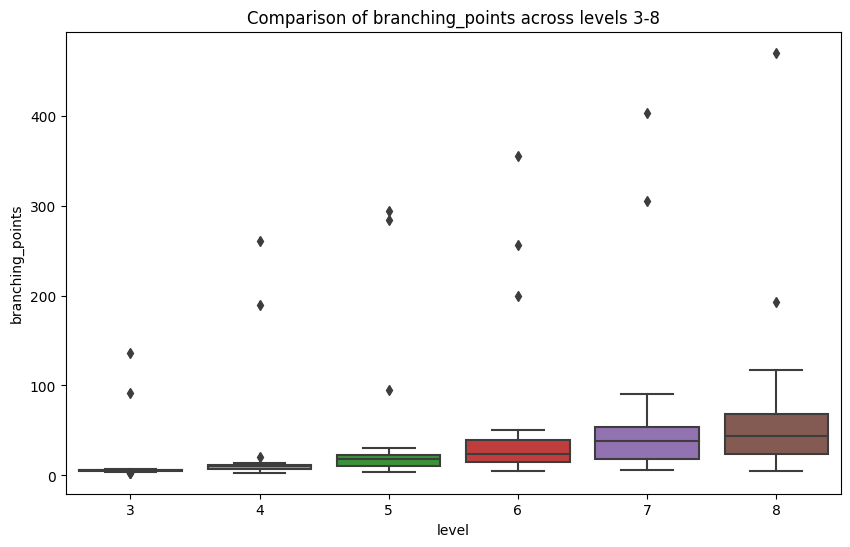

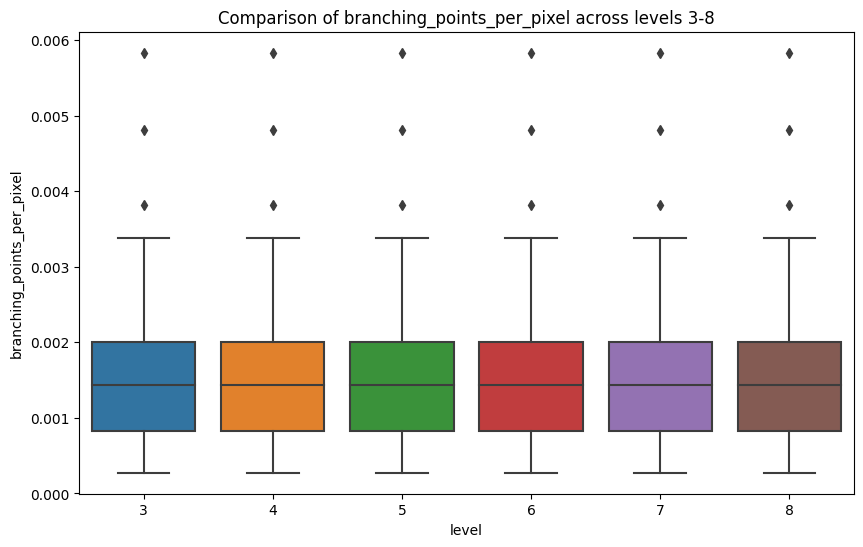

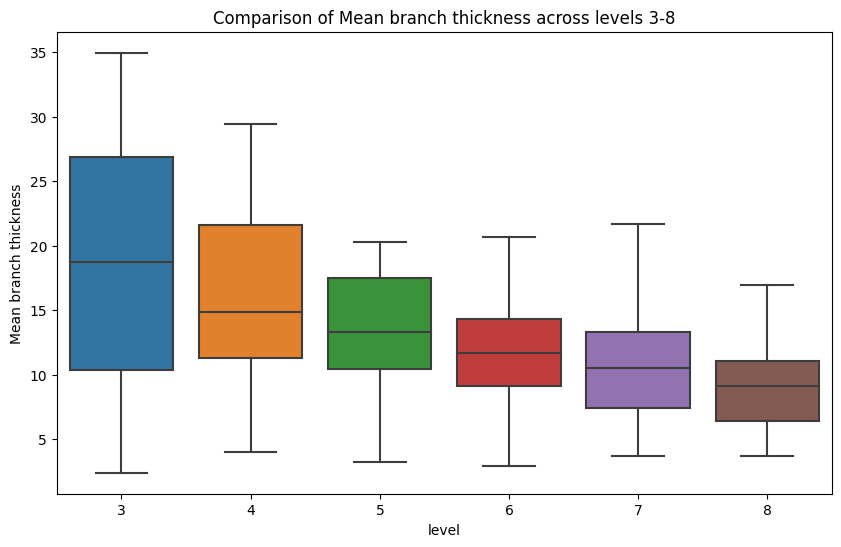

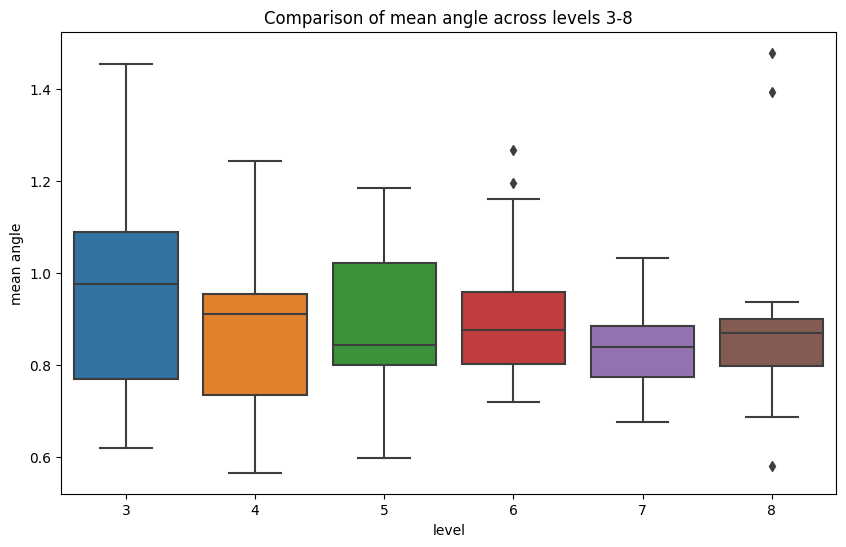

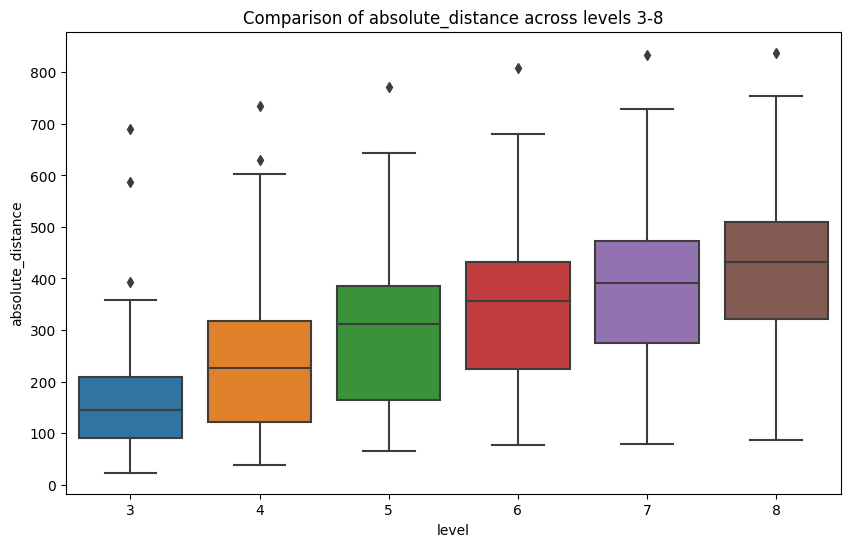

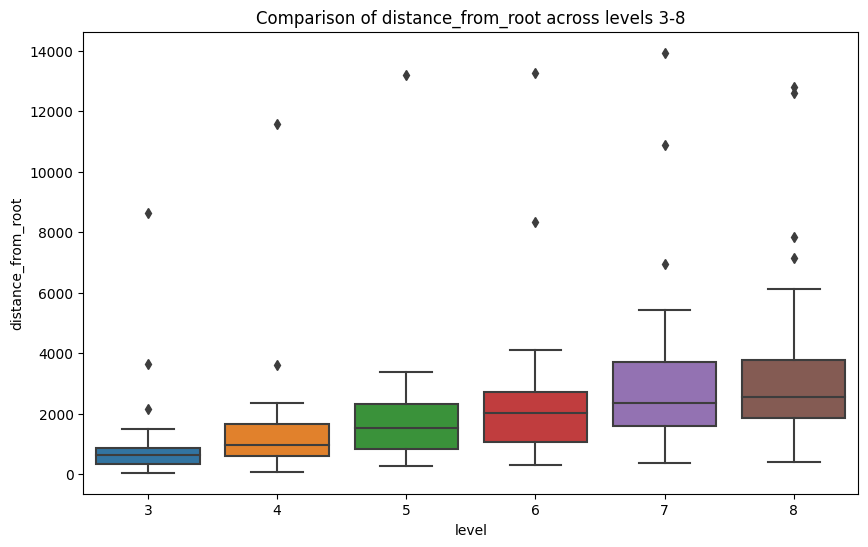

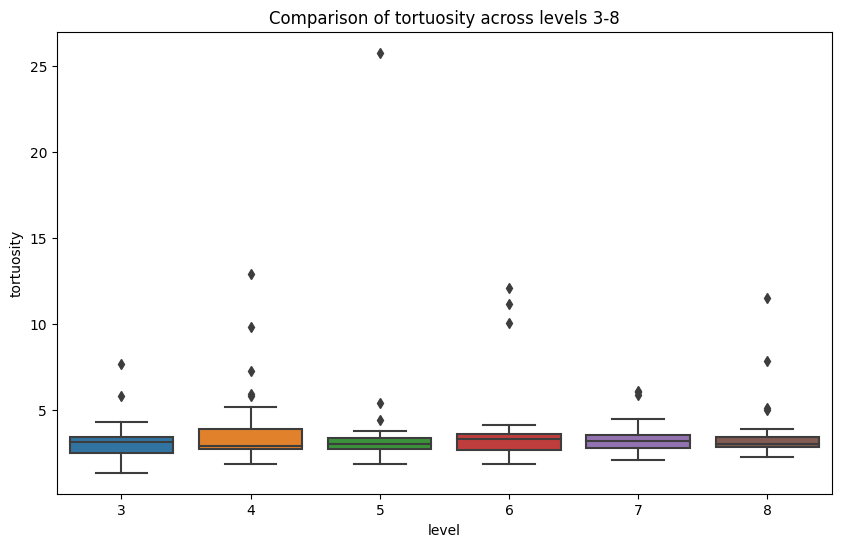

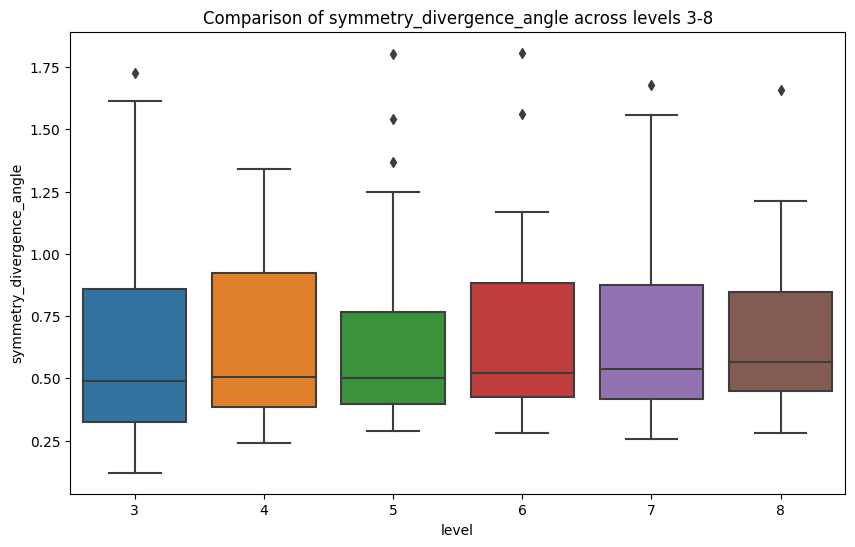

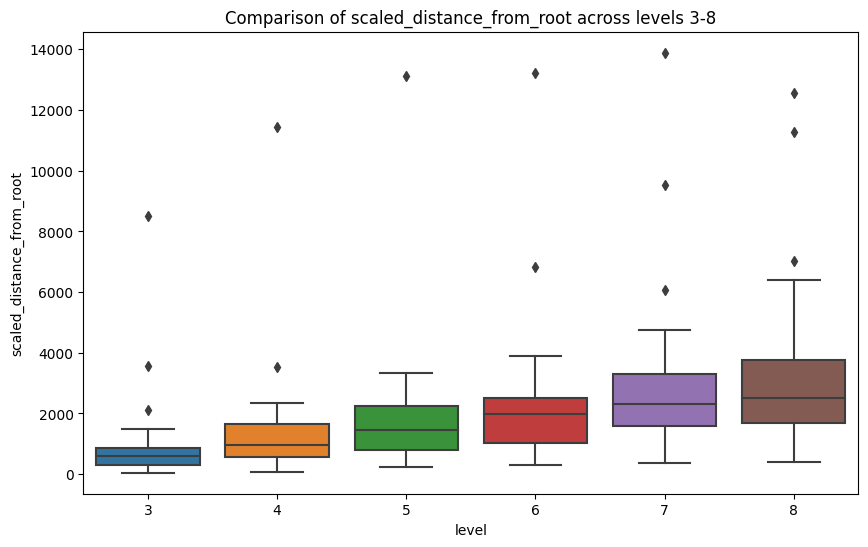

In [40]:
# Obliczenie podstawowych statystyk dla każdego poziomu
statistics = combined_df.groupby('level').agg(['mean', 'median', 'std', 'min', 'max'])
print(statistics)

# Wizualizacja podstawowych statystyk
import seaborn as sns
import matplotlib.pyplot as plt

parameters = [
    'branching_points',
    'branching_points_per_pixel',
    'Mean branch thickness',
    'mean angle',
    'absolute_distance',
    'distance_from_root',
    'tortuosity',
    'symmetry_divergence_angle',
    'scaled_distance_from_root'
]

for param in parameters:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=combined_df, x='level', y=param)
    plt.title(f'Comparison of {param} across levels 3-8')
    plt.show()


In [42]:
def remove_outliers(df, param):
    Q1 = df[param].quantile(0.25)
    Q3 = df[param].quantile(0.75)
    IQR = Q3 - Q1
    filtered_df = df[~((df[param] < (Q1 - 1.5 * IQR)) | (df[param] > (Q3 + 1.5 * IQR)))]
    return filtered_df

# Usunięcie wartości odstających dla każdego parametru
filtered_combined_df = combined_df.copy()
for param in parameters:
    filtered_combined_df = remove_outliers(filtered_combined_df, param)

# Wyświetlenie podstawowych statystyk po usunięciu wartości odstających
filtered_statistics = filtered_combined_df.groupby('level').agg(['mean', 'median', 'std', 'min', 'max'])
print(filtered_statistics)


      Branch count                               Total edge length  \
              mean median        std   min   max              mean   
level                                                                
3         3.785714    4.0   0.801784   2.0   5.0        390.233025   
4         7.578947    8.0   3.388146   4.0  18.0        520.102832   
5        13.285714   15.0   4.971346   4.0  21.0        842.216596   
6        22.210526   23.0   9.664247   6.0  40.0       1243.528401   
7        34.611111   34.5  17.098809   7.0  62.0       1775.943201   
8        48.769231   49.0  17.550659  17.0  75.0       2394.973233   

                                                          ...  \
            median          std         min          max  ...   
level                                                     ...   
3       312.491688   349.949171   46.643775  1144.221161  ...   
4       461.812819   287.386543   96.022179  1022.990677  ...   
5       897.199619   411.511532  153.706592 

In [44]:
# Porównanie podstawowych statystyk przed i po usunięciu wartości odstających
comparison_statistics = pd.concat([statistics, filtered_statistics], axis=1, keys=['Before', 'After'])
print(comparison_statistics)


            Before                                                  \
      Branch count                               Total edge length   
              mean median        std  min    max              mean   
level                                                                
3        10.166667    4.0  23.951220  2.0  118.0        649.252333   
4        20.666667    8.0  51.328108  4.0  246.0       1067.258876   
5        32.933333   15.0  68.845621  3.0  300.0       1666.989862   
6        44.566667   20.5  77.930864  5.0  352.0       2166.626763   
7        54.333333   30.5  83.079245  4.0  355.0       2495.456900   
8        66.200000   40.0  99.931149  5.0  480.0       2964.974462   

                                                           ...  \
                                                           ...   
            median          std         min           max  ...   
level                                                      ...   
3       405.601014  1053.216840   4

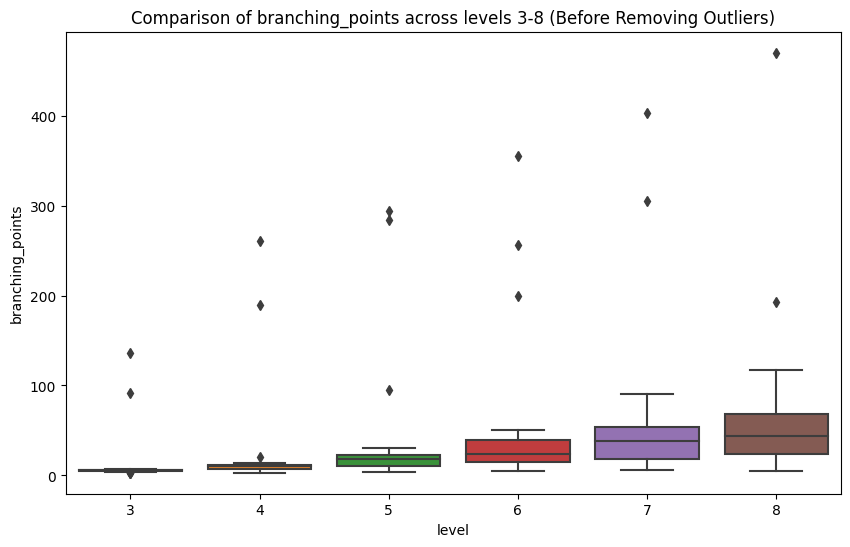

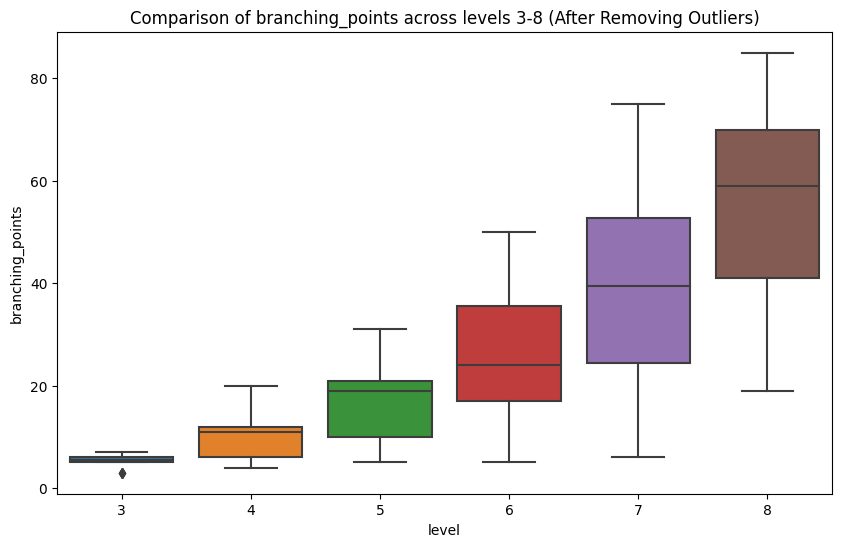

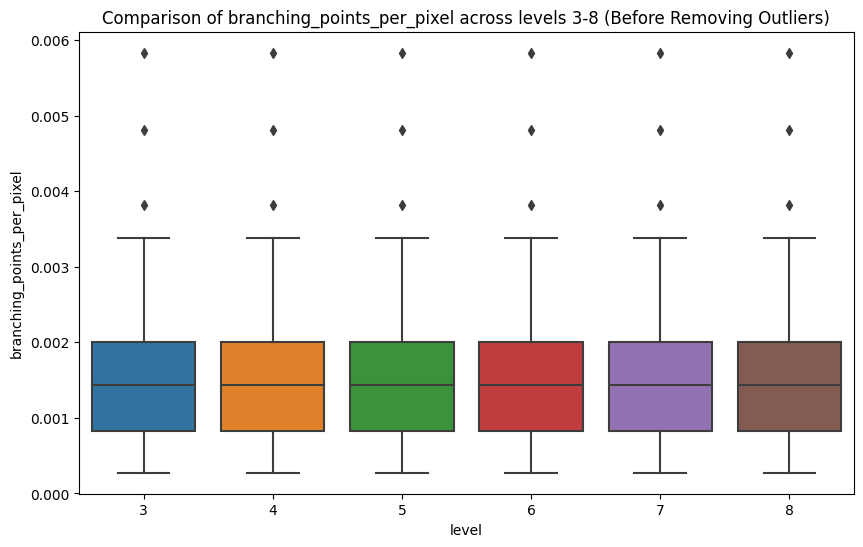

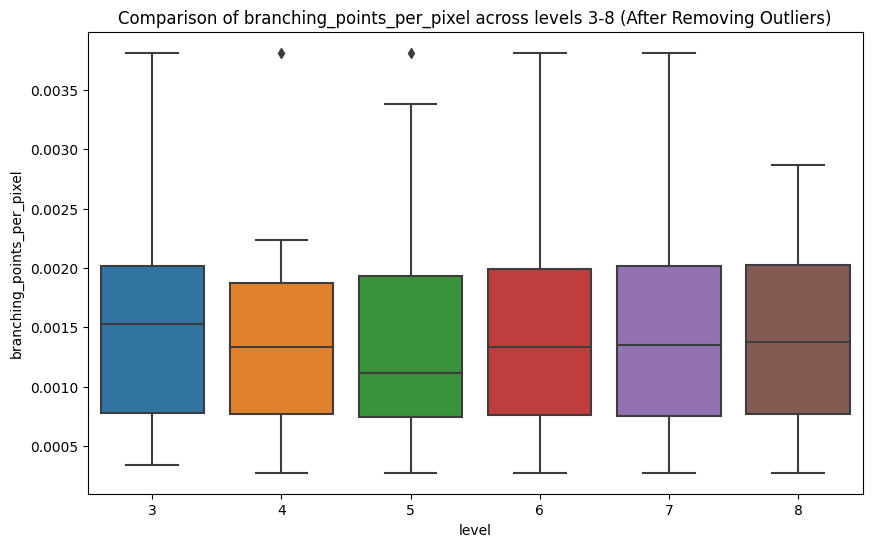

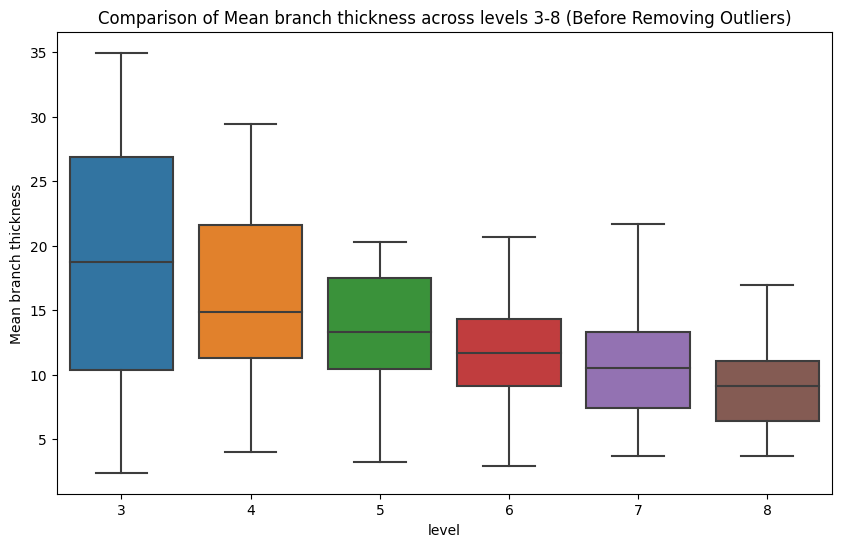

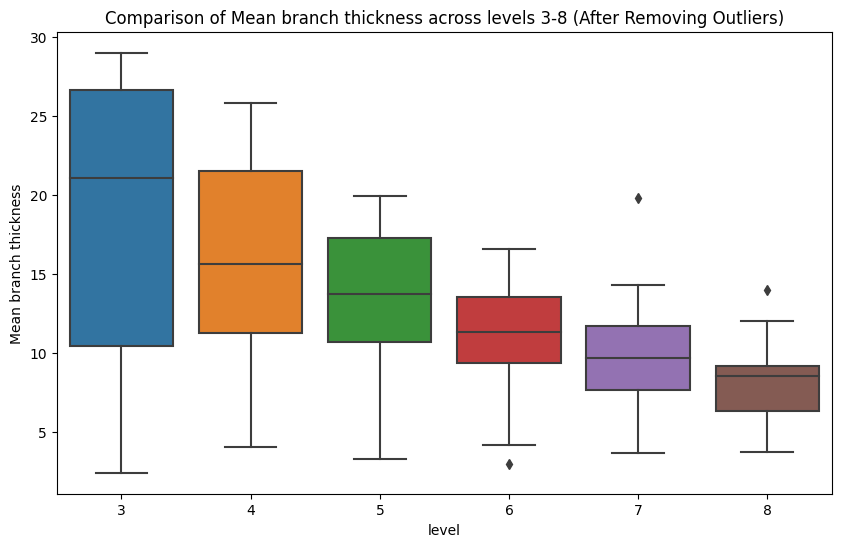

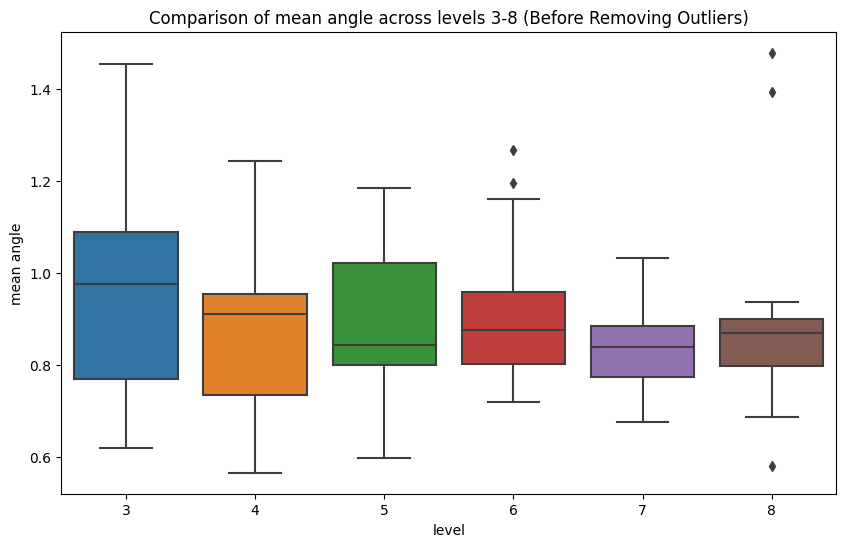

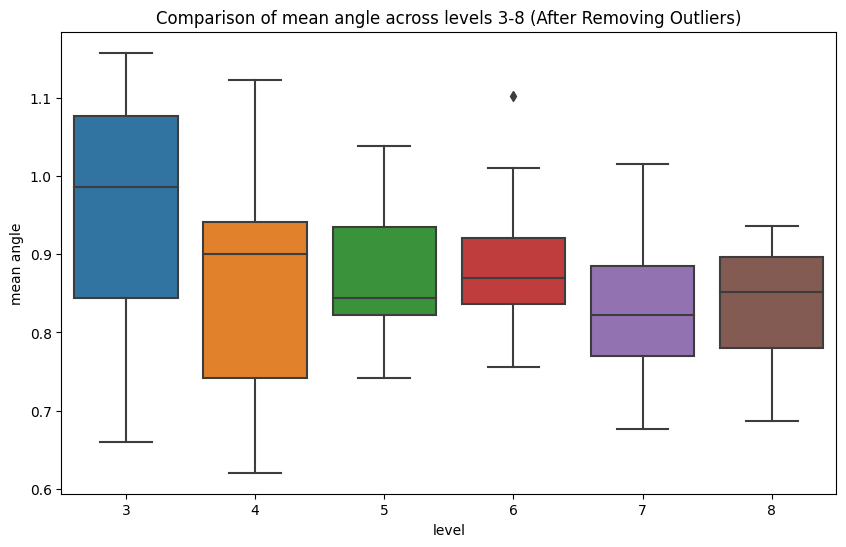

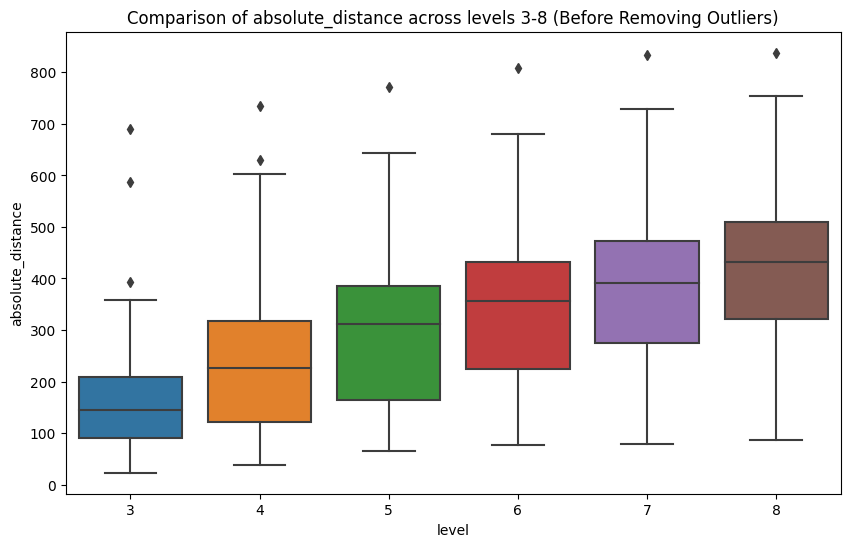

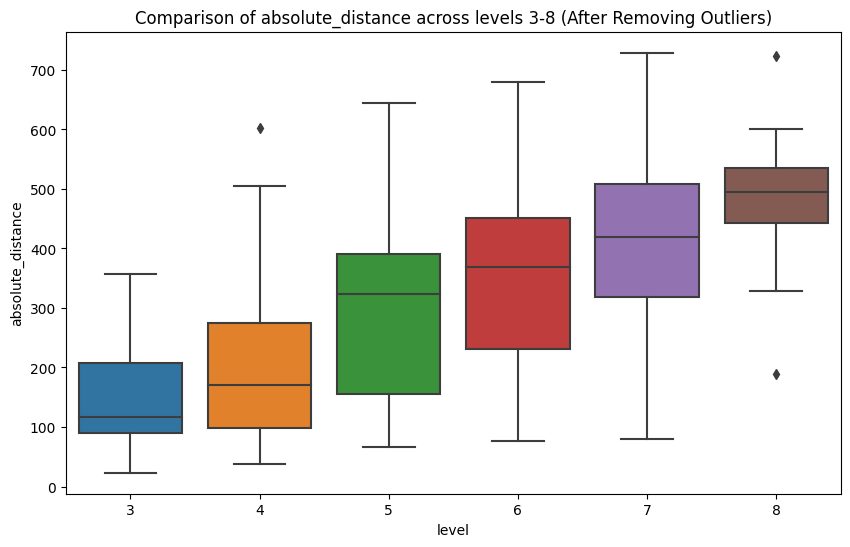

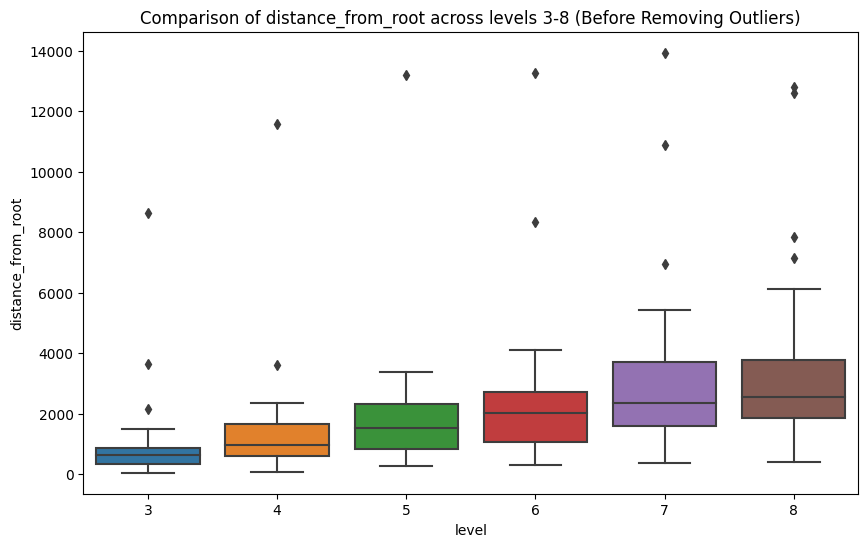

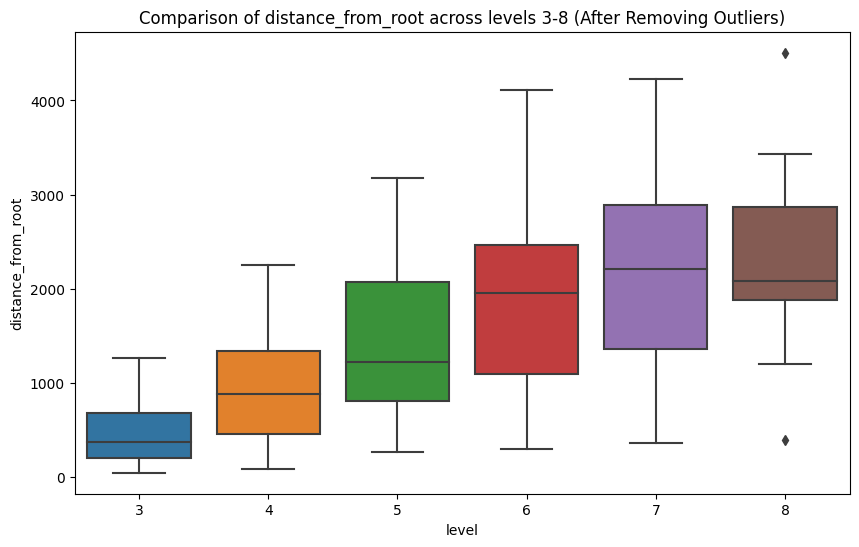

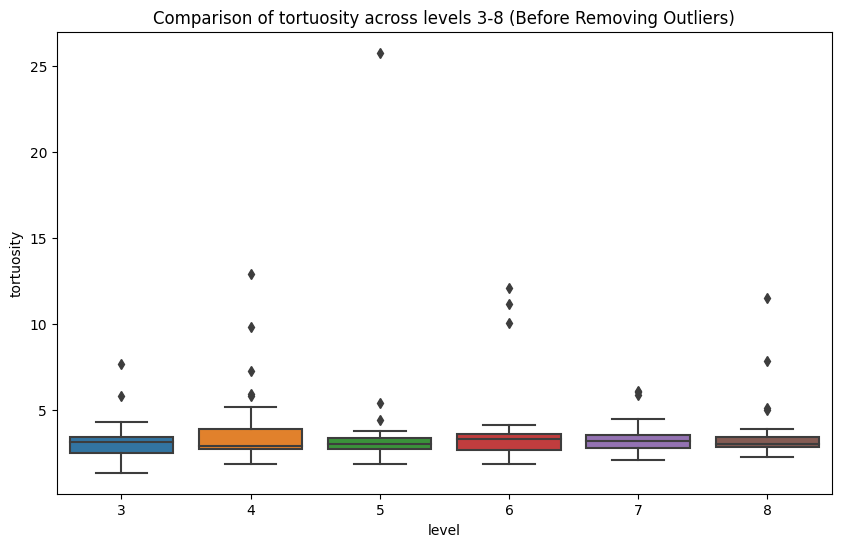

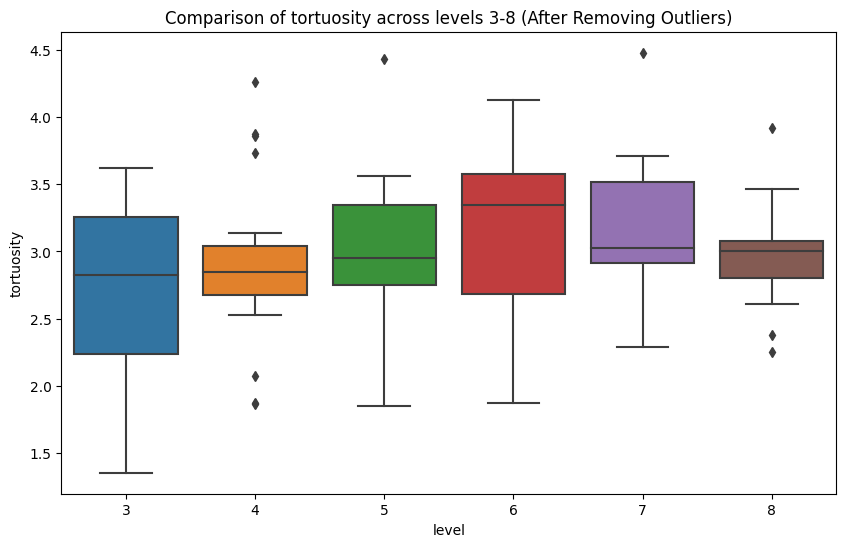

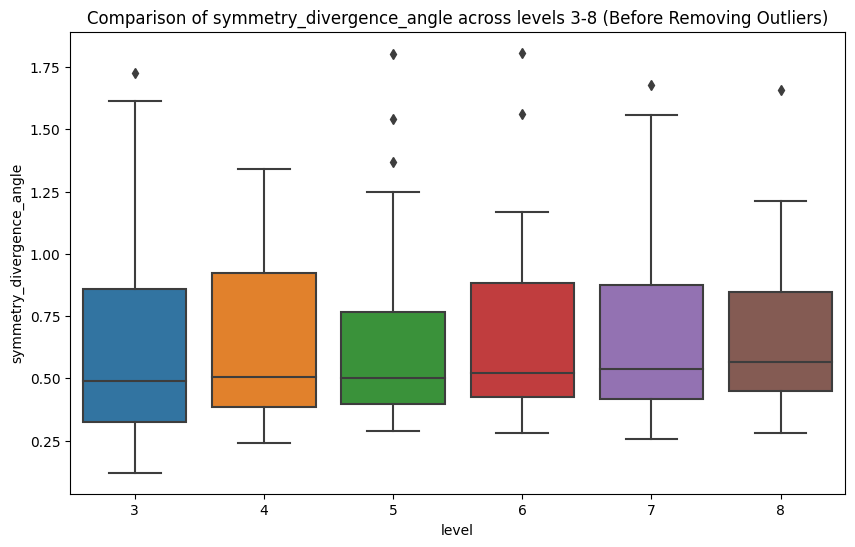

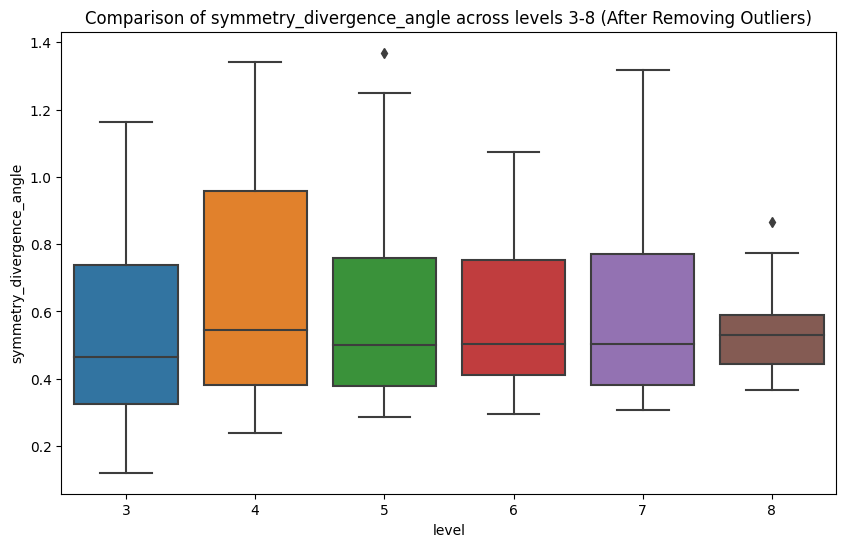

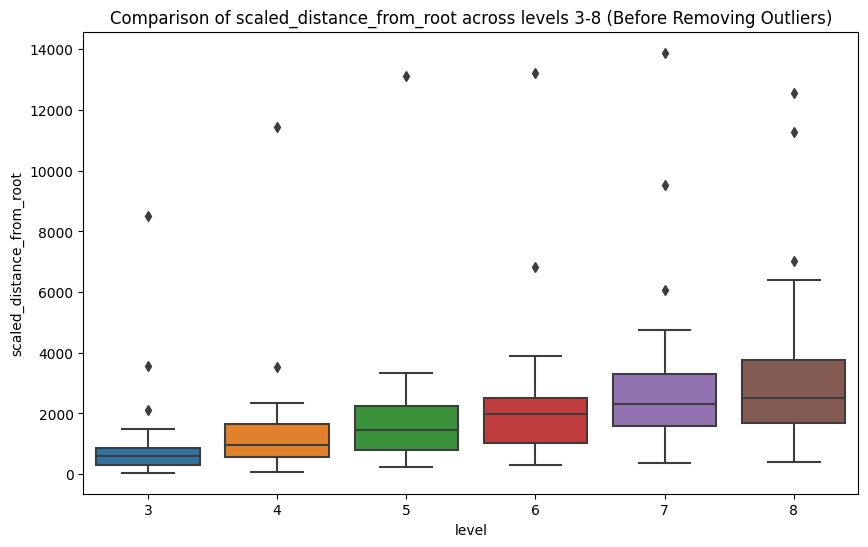

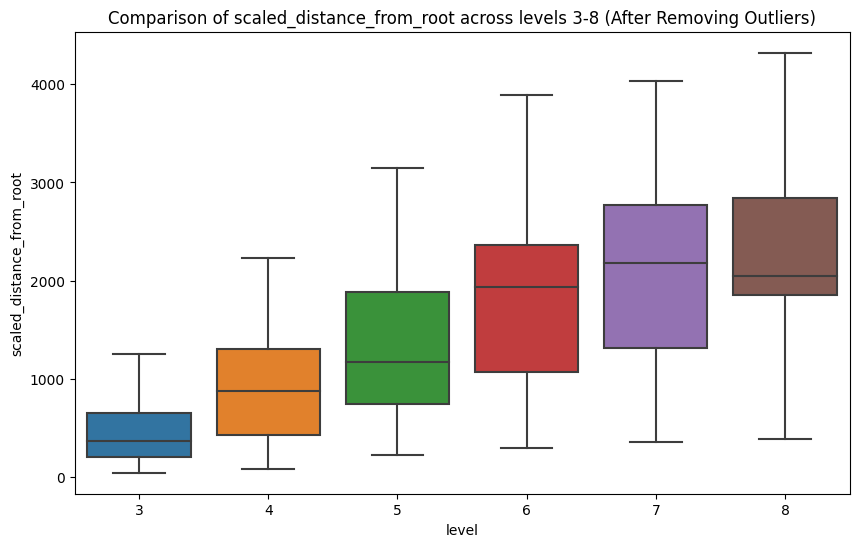

In [46]:
# Wizualizacja danych przed i po usunięciu wartości odstających
for param in parameters:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=combined_df, x='level', y=param)
    plt.title(f'Comparison of {param} across levels 3-8 (Before Removing Outliers)')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=filtered_combined_df, x='level', y=param)
    plt.title(f'Comparison of {param} across levels 3-8 (After Removing Outliers)')
    plt.show()


In [48]:
from scipy.stats import f_oneway

# Testy ANOVA dla każdego parametru
for param in parameters:
    groups_before = [combined_df[combined_df['level'] == level][param] for level in range(3, 9)]
    anova_result_before = f_oneway(*groups_before)
    print(f"ANOVA result for {param} (Before Removing Outliers): F-statistic = {anova_result_before.statistic}, p-value = {anova_result_before.pvalue}")
    
    groups_after = [filtered_combined_df[filtered_combined_df['level'] == level][param] for level in range(3, 9)]
    anova_result_after = f_oneway(*groups_after)
    print(f"ANOVA result for {param} (After Removing Outliers): F-statistic = {anova_result_after.statistic}, p-value = {anova_result_after.pvalue}")


ANOVA result for branching_points (Before Removing Outliers): F-statistic = 2.5626471027475883, p-value = 0.02889684273576564
ANOVA result for branching_points (After Removing Outliers): F-statistic = 30.07659502799656, p-value = 2.0832407817571307e-18
ANOVA result for branching_points_per_pixel (Before Removing Outliers): F-statistic = -1.3769669774564975e-32, p-value = nan
ANOVA result for branching_points_per_pixel (After Removing Outliers): F-statistic = 0.18953034426235107, p-value = 0.9659251108657844
ANOVA result for Mean branch thickness (Before Removing Outliers): F-statistic = 11.505001656535407, p-value = 1.311522174327251e-09
ANOVA result for Mean branch thickness (After Removing Outliers): F-statistic = 7.657994973785551, p-value = 4.1230516899459934e-06
ANOVA result for mean angle (Before Removing Outliers): F-statistic = 1.776143509944884, p-value = 0.12008528232470905
ANOVA result for mean angle (After Removing Outliers): F-statistic = 2.3865842713691947, p-value = 0.04

                                  Branch count  Total edge length  \
Branch count                          1.000000           0.978200   
Total edge length                     0.978200           1.000000   
Mean edge length                     -0.223526          -0.134722   
3d_volume_vasculature                 0.007996           0.038149   
vascular_network_projection_area      0.204440           0.246248   
branching_points                      0.977754           0.950912   
branching_points_per_pixel            0.004200          -0.082333   
Mean branch thickness                -0.295528          -0.254589   
mean angle                           -0.256511          -0.256910   
absolute_distance                     0.548673           0.590141   
distance_from_root                    0.122452           0.136748   
tortuosity                           -0.048321          -0.010648   
symmetry_divergence_angle            -0.113346          -0.090503   
scaled_distance_from_root         

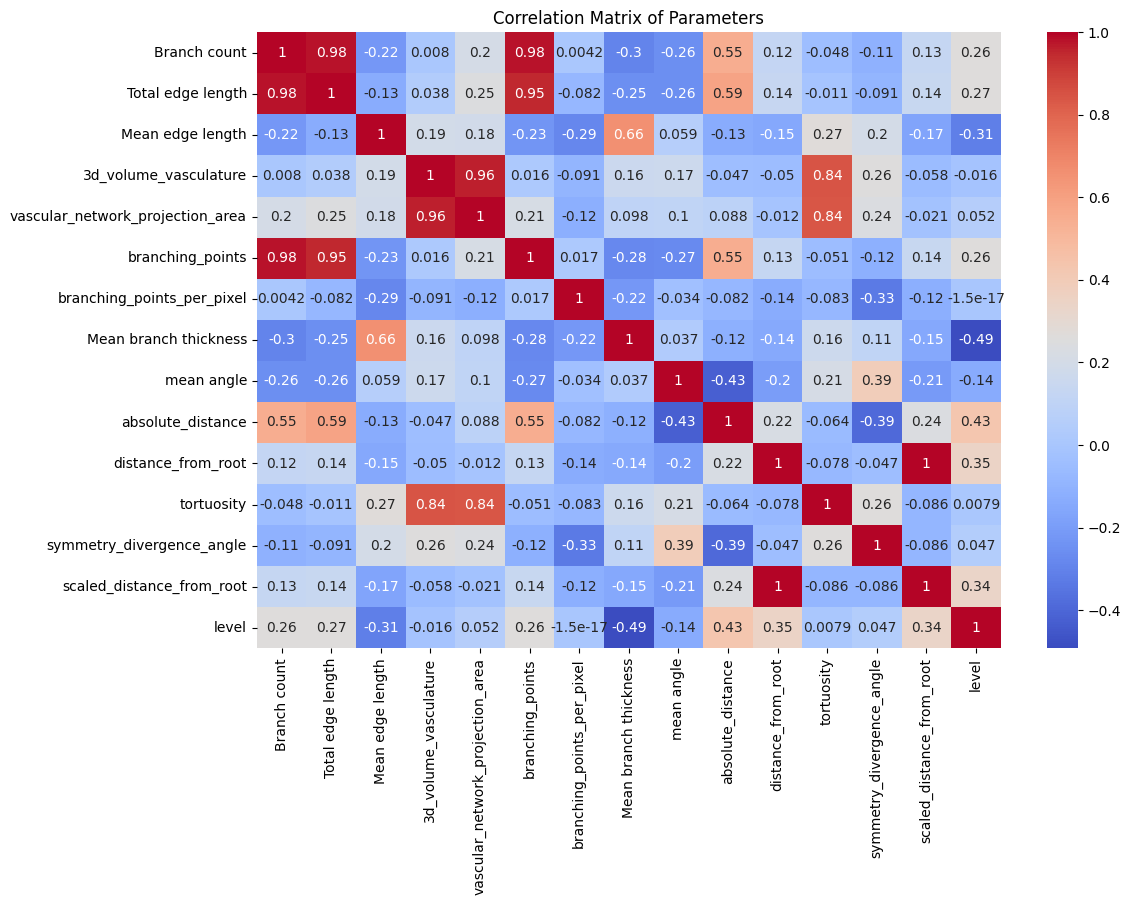

In [50]:
# Analiza korelacji między parametrami
correlation_matrix = combined_df.corr()
print(correlation_matrix)

# Wizualizacja macierzy korelacji
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Parameters')
plt.show()


In [82]:
import statsmodels.api as sm

# Przygotowanie danych do regresji
X = combined_df[['Total edge length', 'Mean edge length', 'Mean branch thickness']]
y = combined_df['3d_volume_vasculature']
X = sm.add_constant(X)

# Regresja wieloraka
model = sm.OLS(y, X).fit()
print(model.summary())


                              OLS Regression Results                             
Dep. Variable:     3d_volume_vasculature   R-squared:                       0.045
Model:                               OLS   Adj. R-squared:                  0.029
Method:                    Least Squares   F-statistic:                     2.777
Date:                   Wed, 24 Jul 2024   Prob (F-statistic):             0.0428
Time:                           22:17:04   Log-Likelihood:                -3069.1
No. Observations:                    180   AIC:                             6146.
Df Residuals:                        176   BIC:                             6159.
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [88]:
import pandas as pd

# Wczytanie danych
df_level3 = pd.read_csv('dag_level3_with_condition.csv')

# Wyświetlenie dostępnych kolumn
print(df_level3.columns)


Index(['Branch count', 'Total edge length', 'Mean edge length',
       '3d_volume_vasculature', 'vascular_network_projection_area',
       'branching_points', 'branching_points_per_pixel',
       'Mean branch thickness', 'mean angle', 'absolute_distance',
       'distance_from_root', 'tortuosity', 'symmetry_divergence_angle',
       'scaled_distance_from_root'],
      dtype='object')


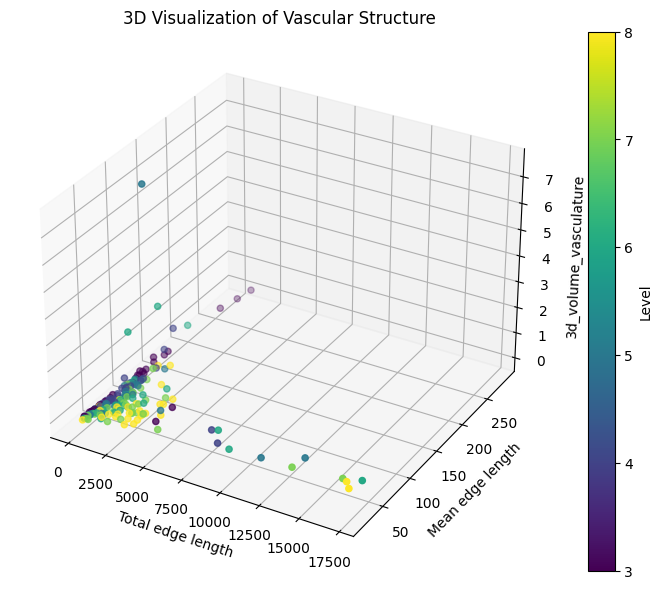

In [90]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Trójwymiarowa wizualizacja z użyciem innych parametrów
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(combined_df['Total edge length'], combined_df['Mean edge length'], combined_df['3d_volume_vasculature'], c=combined_df['level'], cmap='viridis')
ax.set_title('3D Visualization of Vascular Structure')
ax.set_xlabel('Total edge length')
ax.set_ylabel('Mean edge length')
ax.set_zlabel('3d_volume_vasculature')
plt.colorbar(scatter, ax=ax, label='Level')
plt.show()


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Przygotowanie danych
X = combined_df[parameters]
y = combined_df['3d_volume_vasculature']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Ocena modelu
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



KeyError: "None of [Index(['count', 'length'], dtype='object')] are in the [columns]"

In [98]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='param-dropdown',
        options=[{'label': param, 'value': param} for param in parameters],
        value=parameters[0]
    ),
    dcc.Graph(id='scatter-plot')
])

@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('param-dropdown', 'value')]
)
def update_figure(selected_param):
    fig = px.scatter(combined_df, x='Total edge length', y=selected_param, color='level')
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


C:\Users\herma\AppData\Local\Temp\ipykernel_3680\433849094.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\herma\AppData\Local\Temp\ipykernel_3680\433849094.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


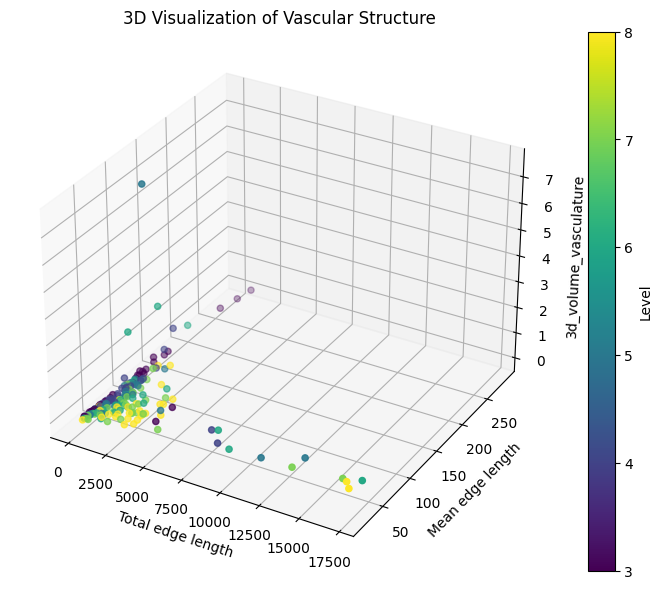

In [102]:
import pandas as pd

# Wczytanie danych
df_level3 = pd.read_csv('dag_level3_with_condition.csv')
df_level4 = pd.read_csv('dag_level4_with_condition.csv')
df_level5 = pd.read_csv('dag_level5_with_condition.csv')
df_level6 = pd.read_csv('dag_level6_with_condition.csv')
df_level7 = pd.read_csv('dag_level7_with_condition.csv')
df_level8 = pd.read_csv('dag_level8_with_condition.csv')

# Dodanie kolumny 'level'
df_level3['level'] = 3
df_level4['level'] = 4
df_level5['level'] = 5
df_level6['level'] = 6
df_level7['level'] = 7
df_level8['level'] = 8

# Połączenie dataframe'ów
combined_df = pd.concat([df_level3, df_level4, df_level5, df_level6, df_level7, df_level8])

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Trójwymiarowa wizualizacja z użyciem parametrów 'Total edge length', 'Mean edge length' i '3d_volume_vasculature'
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(combined_df['Total edge length'], combined_df['Mean edge length'], combined_df['3d_volume_vasculature'], c=combined_df['level'], cmap='viridis', label=combined_df['level'])
ax.set_title('3D Visualization of Vascular Structure')
ax.set_xlabel('Total edge length')
ax.set_ylabel('Mean edge length')
ax.set_zlabel('3d_volume_vasculature')
plt.colorbar(scatter, ax=ax, label='Level')
plt.show()



In [104]:
# Sprawdzenie unikalnych wartości poziomów
unique_levels = combined_df['level'].unique()
print("Levels in the data:", unique_levels)


Levels in the data: [3 4 5 6 7 8]


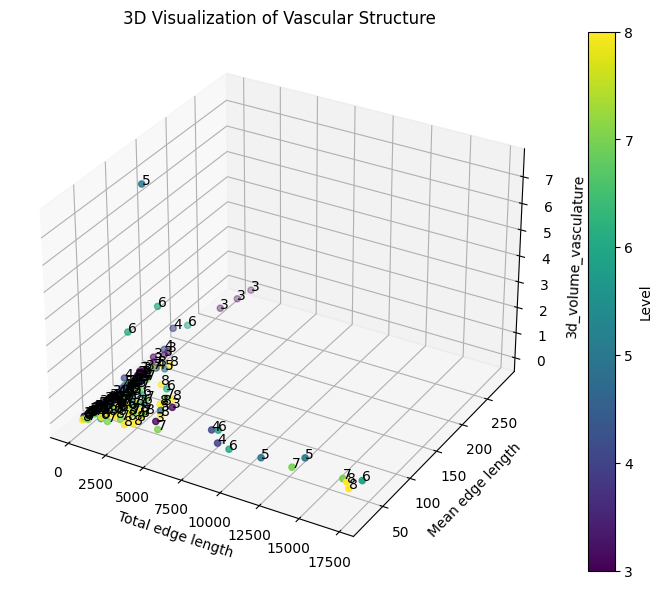

In [106]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(combined_df['Total edge length'], combined_df['Mean edge length'], combined_df['3d_volume_vasculature'], c=combined_df['level'], cmap='viridis')
ax.set_title('3D Visualization of Vascular Structure')
ax.set_xlabel('Total edge length')
ax.set_ylabel('Mean edge length')
ax.set_zlabel('3d_volume_vasculature')

# Dodanie etykiet poziomów
for i in range(combined_df.shape[0]):
    ax.text(combined_df['Total edge length'].iloc[i], combined_df['Mean edge length'].iloc[i], combined_df['3d_volume_vasculature'].iloc[i], str(combined_df['level'].iloc[i]), color='black')

plt.colorbar(scatter, ax=ax, label='Level')
plt.show()


In [108]:
! pip install dash



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [116]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Wczytanie danych
df_level3 = pd.read_csv('dag_level3_with_condition.csv')
df_level4 = pd.read_csv('dag_level4_with_condition.csv')
df_level5 = pd.read_csv('dag_level5_with_condition.csv')
df_level6 = pd.read_csv('dag_level6_with_condition.csv')
df_level7 = pd.read_csv('dag_level7_with_condition.csv')
df_level8 = pd.read_csv('dag_level8_with_condition.csv')

# Dodanie kolumny 'level'
df_level3['level'] = 3
df_level4['level'] = 4
df_level5['level'] = 5
df_level6['level'] = 6
df_level7['level'] = 7
df_level8['level'] = 8

# Połączenie dataframe'ów
combined_df = pd.concat([df_level3, df_level4, df_level5, df_level6, df_level7, df_level8])

# Utworzenie aplikacji Dash
app = dash.Dash(__name__)

# Layout aplikacji
app.layout = html.Div([
    html.H1("3D Visualization of Vascular Structure"),
    html.Label("Select Parameter for X-axis"),
    dcc.Dropdown(
        id='x-axis-dropdown',
        options=[{'label': col, 'value': col} for col in combined_df.columns],
        value='Total edge length'
    ),
    html.Label("Select Parameter for Y-axis"),
    dcc.Dropdown(
        id='y-axis-dropdown',
        options=[{'label': col, 'value': col} for col in combined_df.columns],
        value='Mean edge length'
    ),
    html.Label("Select Parameter for Z-axis"),
    dcc.Dropdown(
        id='z-axis-dropdown',
        options=[{'label': col, 'value': col} for col in combined_df.columns],
        value='3d_volume_vasculature'
    ),
    dcc.Graph(id='3d-scatter-plot')
])

# Callback do aktualizacji wykresu
@app.callback(
    Output('3d-scatter-plot', 'figure'),
    [Input('x-axis-dropdown', 'value'),
     Input('y-axis-dropdown', 'value'),
     Input('z-axis-dropdown', 'value')]
)
def update_graph(x_axis, y_axis, z_axis):
    fig = px.scatter_3d(combined_df, x=x_axis, y=y_axis, z=z_axis, color='level',
                        title=f'3D Scatter plot of {x_axis} vs {y_axis} vs {z_axis}')
    return fig

# Uruchomienie aplikacji
if __name__ == '__main__':
    app.run_server(debug=True)

html.Label("Select Levels"),
dcc.Checklist(
    id='level-checklist',
    options=[{'label': f'Level {i}', 'value': i} for i in combined_df['level'].unique()],
    value=combined_df['level'].unique(),
    inline=True
),



(Checklist(options=[{'label': 'Level 3', 'value': 3}, {'label': 'Level 4', 'value': 4}, {'label': 'Level 5', 'value': 5}, {'label': 'Level 6', 'value': 6}, {'label': 'Level 7', 'value': 7}, {'label': 'Level 8', 'value': 8}], value=array([3, 4, 5, 6, 7, 8], dtype=int64), inline=True, id='level-checklist'),)

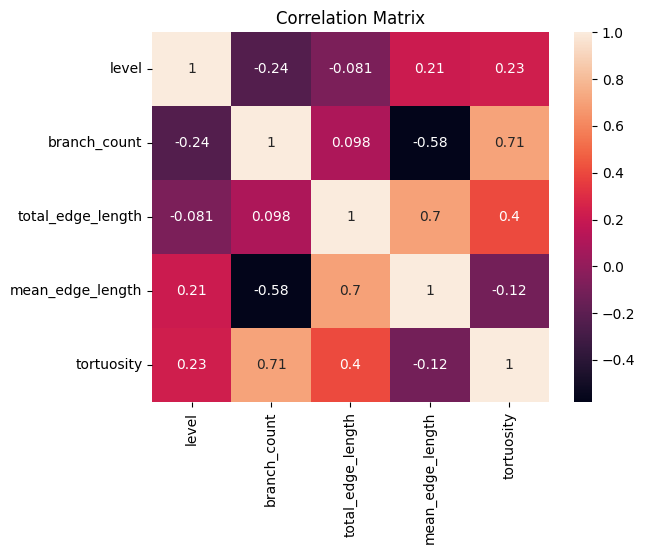

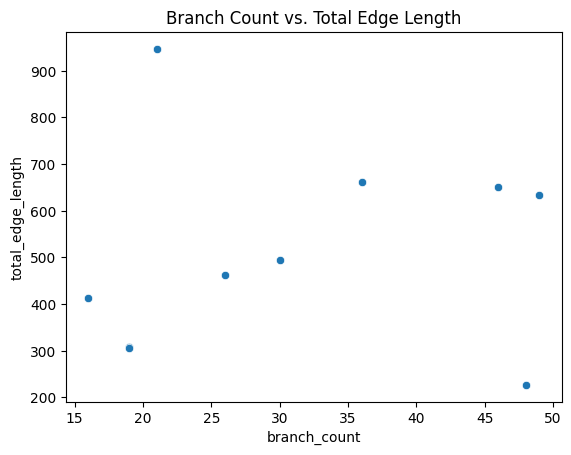

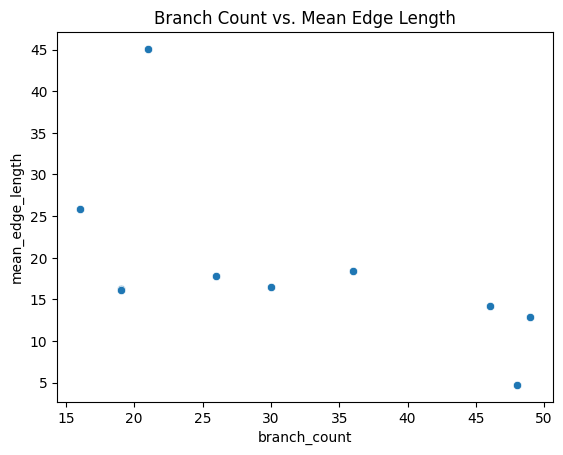

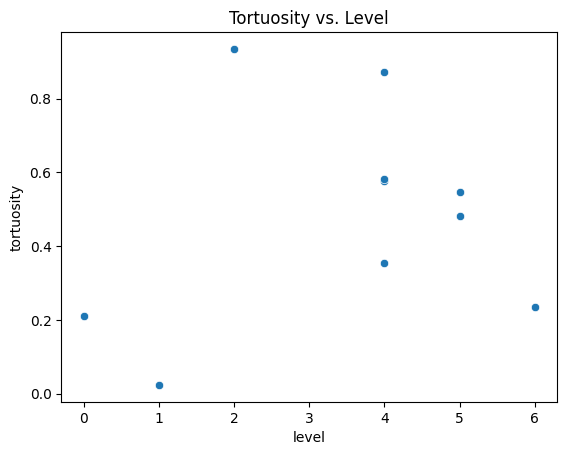

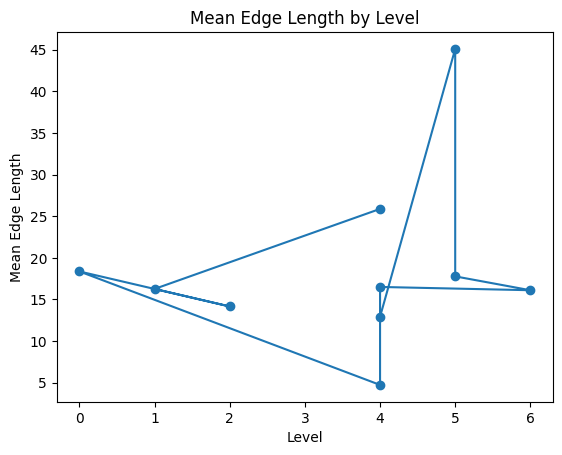

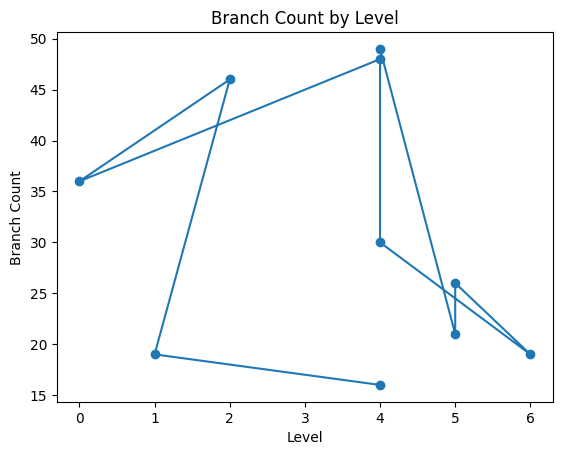

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create some sample data
np.random.seed(10)
data = {}
for i in range(3, 9):  # Levels 3 to 8
  data['level'] = np.random.randint(i, size=10)
  data['branch_count'] = np.random.randint(10, 50, size=10)
  data['total_edge_length'] = np.random.randint(100, 1000, size=10)
  data['mean_edge_length'] = data['total_edge_length'] / data['branch_count']
  data['tortuosity'] = np.random.random(size=10)  # Random value between 0 and 1
  df = pd.DataFrame(data)

# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

# Scatter plots (branch_count vs total_edge_length, branch_count vs mean_edge_length, tortuosity vs level)
sns.scatterplot(x='branch_count', y='total_edge_length', data=df)
plt.title('Branch Count vs. Total Edge Length')
plt.show()

sns.scatterplot(x='branch_count', y='mean_edge_length', data=df)
plt.title('Branch Count vs. Mean Edge Length')
plt.show()

sns.scatterplot(x='level', y='tortuosity', data=df)
plt.title('Tortuosity vs. Level')
plt.show()

# Line plots (mean_edge_length vs level, branch_count vs level)
plt.plot(df['level'], df['mean_edge_length'], marker='o')
plt.xlabel('Level')
plt.ylabel('Mean Edge Length')
plt.title('Mean Edge Length by Level')
plt.show()

plt.plot(df['level'], df['branch_count'], marker='o')
plt.xlabel('Level')
plt.ylabel('Branch Count')
plt.title('Branch Count by Level')
plt.show()


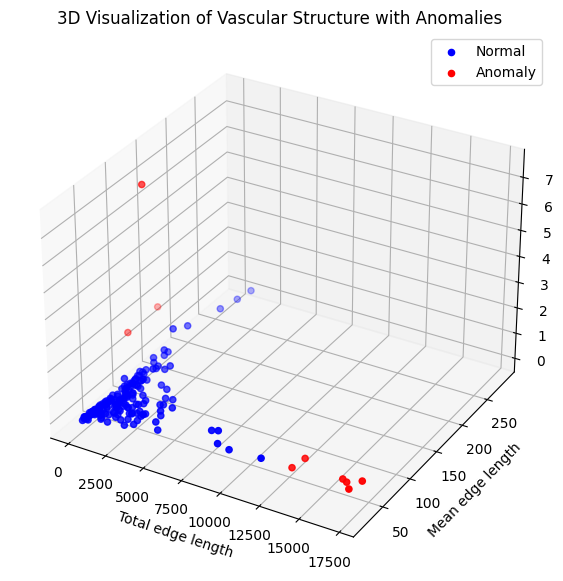

In [126]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Wczytanie danych
df_level3 = pd.read_csv('dag_level3_with_condition.csv')
df_level4 = pd.read_csv('dag_level4_with_condition.csv')
df_level5 = pd.read_csv('dag_level5_with_condition.csv')
df_level6 = pd.read_csv('dag_level6_with_condition.csv')
df_level7 = pd.read_csv('dag_level7_with_condition.csv')
df_level8 = pd.read_csv('dag_level8_with_condition.csv')

# Dodanie kolumny 'level'
df_level3['level'] = 3
df_level4['level'] = 4
df_level5['level'] = 5
df_level6['level'] = 6
df_level7['level'] = 7
df_level8['level'] = 8

# Połączenie dataframe'ów
combined_df = pd.concat([df_level3, df_level4, df_level5, df_level6, df_level7, df_level8])

# Lista parametrów do analizy
parameters = [
    'Branch count',
    'Total edge length',
    'Mean edge length',
    '3d_volume_vasculature',
    'vascular_network_projection_area',
    'branching_points',
    'branching_points_per_pixel',
    'Mean branch thickness',
    'mean angle',
    'absolute_distance',
    'distance_from_root',
    'tortuosity',
    'symmetry_divergence_angle',
    'scaled_distance_from_root'
]

# Wykrywanie anomalii za pomocą Isolation Forest
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
combined_df['anomaly'] = isolation_forest.fit_predict(combined_df[parameters])

# Anomalie są oznaczone jako -1
anomalies = combined_df[combined_df['anomaly'] == -1]
normal_data = combined_df[combined_df['anomaly'] == 1]

# Trójwymiarowa wizualizacja anomalii
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(normal_data['Total edge length'], normal_data['Mean edge length'], normal_data['3d_volume_vasculature'], c='blue', label='Normal')
scatter = ax.scatter(anomalies['Total edge length'], anomalies['Mean edge length'], anomalies['3d_volume_vasculature'], c='red', label='Anomaly')
ax.set_title('3D Visualization of Vascular Structure with Anomalies')
ax.set_xlabel('Total edge length')
ax.set_ylabel('Mean edge length')
ax.set_zlabel('3d_volume_vasculature')
plt.legend()
plt.show()


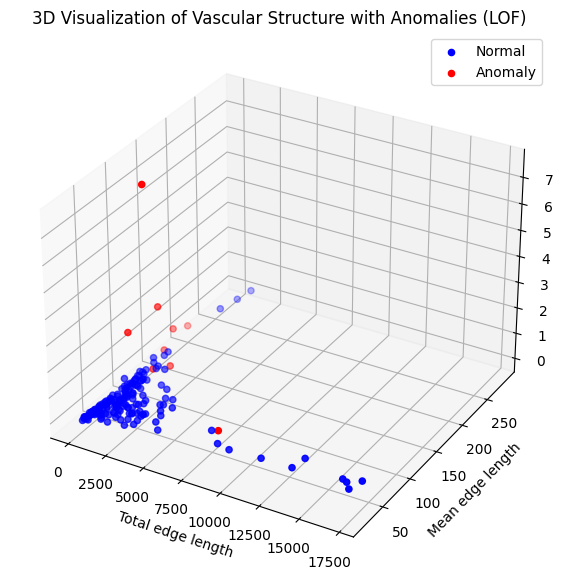

In [128]:
from sklearn.neighbors import LocalOutlierFactor

# Wykrywanie anomalii za pomocą LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
combined_df['anomaly_lof'] = lof.fit_predict(combined_df[parameters])

# Anomalie są oznaczone jako -1
anomalies_lof = combined_df[combined_df['anomaly_lof'] == -1]
normal_data_lof = combined_df[combined_df['anomaly_lof'] == 1]

# Trójwymiarowa wizualizacja anomalii z LOF
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(normal_data_lof['Total edge length'], normal_data_lof['Mean edge length'], normal_data_lof['3d_volume_vasculature'], c='blue', label='Normal')
scatter = ax.scatter(anomalies_lof['Total edge length'], anomalies_lof['Mean edge length'], anomalies_lof['3d_volume_vasculature'], c='red', label='Anomaly')
ax.set_title('3D Visualization of Vascular Structure with Anomalies (LOF)')
ax.set_xlabel('Total edge length')
ax.set_ylabel('Mean edge length')
ax.set_zlabel('3d_volume_vasculature')
plt.legend()
plt.show()


In [130]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Wczytanie danych
df_level3 = pd.read_csv('dag_level3_with_condition.csv')
df_level4 = pd.read_csv('dag_level4_with_condition.csv')
df_level5 = pd.read_csv('dag_level5_with_condition.csv')
df_level6 = pd.read_csv('dag_level6_with_condition.csv')
df_level7 = pd.read_csv('dag_level7_with_condition.csv')
df_level8 = pd.read_csv('dag_level8_with_condition.csv')

# Dodanie kolumny 'level'
df_level3['level'] = 3
df_level4['level'] = 4
df_level5['level'] = 5
df_level6['level'] = 6
df_level7['level'] = 7
df_level8['level'] = 8

# Połączenie dataframe'ów
combined_df = pd.concat([df_level3, df_level4, df_level5, df_level6, df_level7, df_level8])

# Lista parametrów do analizy
parameters = [
    'Branch count',
    'Total edge length',
    'Mean edge length',
    '3d_volume_vasculature',
    'vascular_network_projection_area',
    'branching_points',
    'branching_points_per_pixel',
    'Mean branch thickness',
    'mean angle',
    'absolute_distance',
    'distance_from_root',
    'tortuosity',
    'symmetry_divergence_angle',
    'scaled_distance_from_root'
]

# Wykrywanie anomalii za pomocą LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
combined_df['anomaly_lof'] = lof.fit_predict(combined_df[parameters])

# Utworzenie aplikacji Dash
app = dash.Dash(__name__)

# Layout aplikacji
app.layout = html.Div([
    html.H1("3D Visualization of Vascular Structure with Anomalies (LOF)"),
    html.Label("Select Level"),
    dcc.Dropdown(
        id='level-dropdown',
        options=[{'label': f'Level {i}', 'value': i} for i in combined_df['level'].unique()],
        value=3
    ),
    dcc.Graph(id='3d-scatter-plot')
])

# Callback do aktualizacji wykresu
@app.callback(
    Output('3d-scatter-plot', 'figure'),
    [Input('level-dropdown', 'value')]
)
def update_graph(selected_level):
    filtered_df = combined_df[combined_df['level'] == selected_level]
    anomalies_lof = filtered_df[filtered_df['anomaly_lof'] == -1]
    normal_data_lof = filtered_df[filtered_df['anomaly_lof'] == 1]
    
    fig = px.scatter_3d(normal_data_lof, x='Total edge length', y='Mean edge length', z='3d_volume_vasculature', color_discrete_sequence=['blue'], title=f'3D Scatter plot of Level {selected_level}')
    fig.add_scatter3d(x=anomalies_lof['Total edge length'], y=anomalies_lof['Mean edge length'], z=anomalies_lof['3d_volume_vasculature'], mode='markers', marker=dict(color='red'), name='Anomaly')
    
    return fig

# Uruchomienie aplikacji
if __name__ == '__main__':
    app.run_server(debug=True)


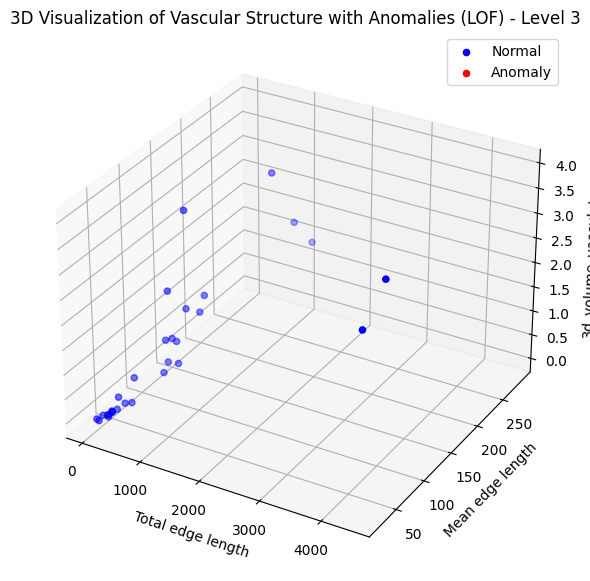

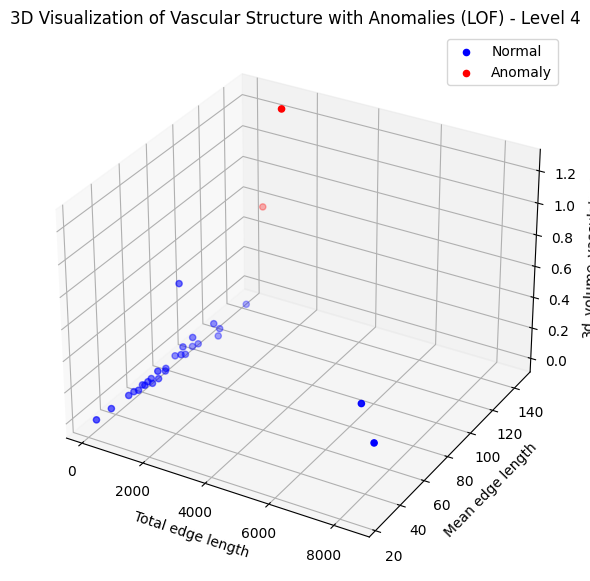

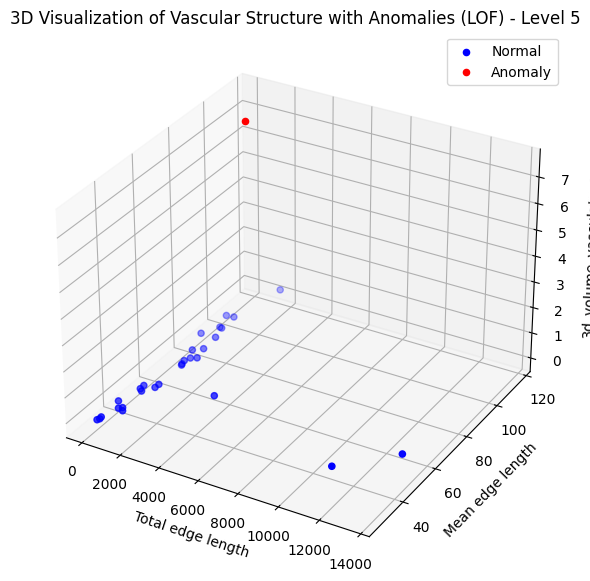

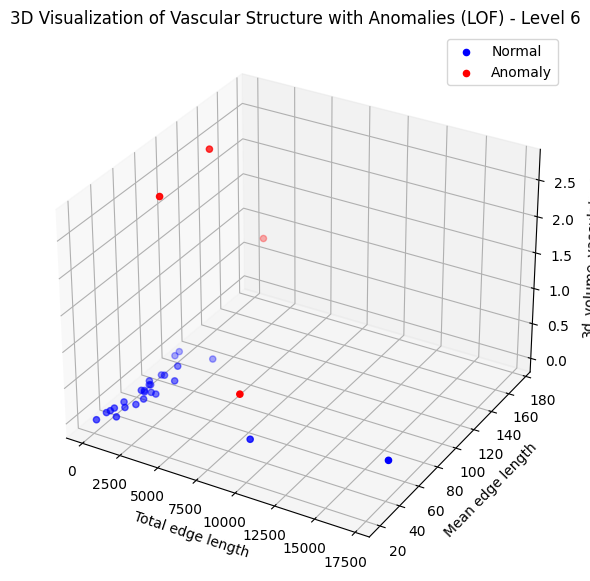

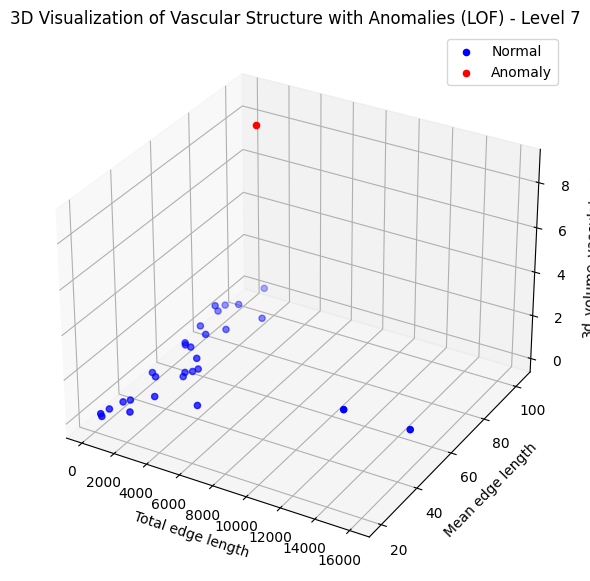

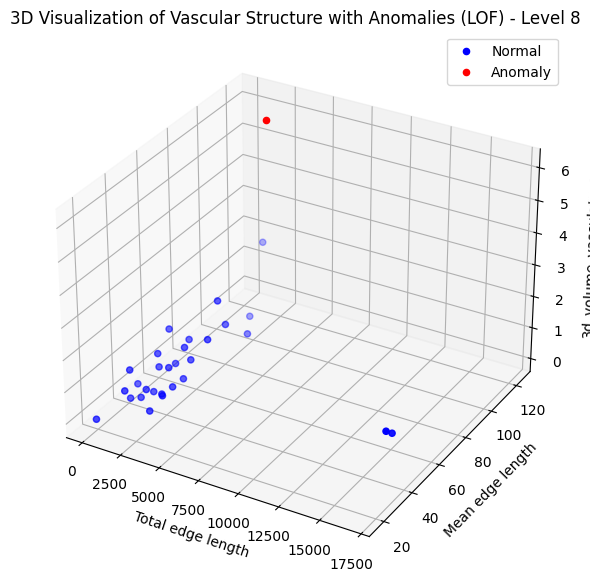

In [132]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Wczytanie danych
df_level3 = pd.read_csv('dag_level3_with_condition.csv')
df_level4 = pd.read_csv('dag_level4_with_condition.csv')
df_level5 = pd.read_csv('dag_level5_with_condition.csv')
df_level6 = pd.read_csv('dag_level6_with_condition.csv')
df_level7 = pd.read_csv('dag_level7_with_condition.csv')
df_level8 = pd.read_csv('dag_level8_with_condition.csv')

# Dodanie kolumny 'level'
df_level3['level'] = 3
df_level4['level'] = 4
df_level5['level'] = 5
df_level6['level'] = 6
df_level7['level'] = 7
df_level8['level'] = 8

# Połączenie dataframe'ów
combined_df = pd.concat([df_level3, df_level4, df_level5, df_level6, df_level7, df_level8])

# Lista parametrów do analizy
parameters = [
    'Branch count',
    'Total edge length',
    'Mean edge length',
    '3d_volume_vasculature',
    'vascular_network_projection_area',
    'branching_points',
    'branching_points_per_pixel',
    'Mean branch thickness',
    'mean angle',
    'absolute_distance',
    'distance_from_root',
    'tortuosity',
    'symmetry_divergence_angle',
    'scaled_distance_from_root'
]

# Wykrywanie anomalii za pomocą LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
combined_df['anomaly_lof'] = lof.fit_predict(combined_df[parameters])

# Generowanie wykresów dla każdego poziomu
levels = combined_df['level'].unique()

for level in levels:
    filtered_df = combined_df[combined_df['level'] == level]
    anomalies_lof = filtered_df[filtered_df['anomaly_lof'] == -1]
    normal_data_lof = filtered_df[filtered_df['anomaly_lof'] == 1]
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(normal_data_lof['Total edge length'], normal_data_lof['Mean edge length'], normal_data_lof['3d_volume_vasculature'], c='blue', label='Normal')
    scatter = ax.scatter(anomalies_lof['Total edge length'], anomalies_lof['Mean edge length'], anomalies_lof['3d_volume_vasculature'], c='red', label='Anomaly')
    ax.set_title(f'3D Visualization of Vascular Structure with Anomalies (LOF) - Level {level}')
    ax.set_xlabel('Total edge length')
    ax.set_ylabel('Mean edge length')
    ax.set_zlabel('3d_volume_vasculature')
    plt.legend()
    plt.show()


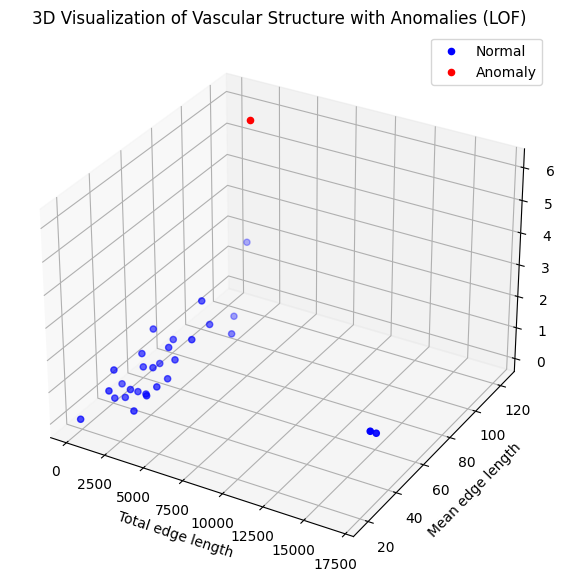

In [134]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Przykład wykresu dla jednego poziomu
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(normal_data_lof['Total edge length'], normal_data_lof['Mean edge length'], normal_data_lof['3d_volume_vasculature'], c='blue', label='Normal')
scatter = ax.scatter(anomalies_lof['Total edge length'], anomalies_lof['Mean edge length'], anomalies_lof['3d_volume_vasculature'], c='red', label='Anomaly')
ax.set_title(f'3D Visualization of Vascular Structure with Anomalies (LOF)')
ax.set_xlabel('Total edge length')
ax.set_ylabel('Mean edge length')
ax.set_zlabel('3d_volume_vasculature')
plt.legend()
plt.show()


Branch count                        0
Total edge length                   0
Mean edge length                    0
3d_volume_vasculature               0
vascular_network_projection_area    0
branching_points                    0
branching_points_per_pixel          0
Mean branch thickness               0
mean angle                          0
absolute_distance                   0
distance_from_root                  0
tortuosity                          0
symmetry_divergence_angle           0
scaled_distance_from_root           0
level                               0
anomaly_lof                         0
dtype: int64
Branch count: 65 unique values
Total edge length: 180 unique values
Mean edge length: 180 unique values
3d_volume_vasculature: 180 unique values
vascular_network_projection_area: 180 unique values
branching_points: 74 unique values
branching_points_per_pixel: 30 unique values
Mean branch thickness: 180 unique values
mean angle: 180 unique values
absolute_distance: 180 unique v

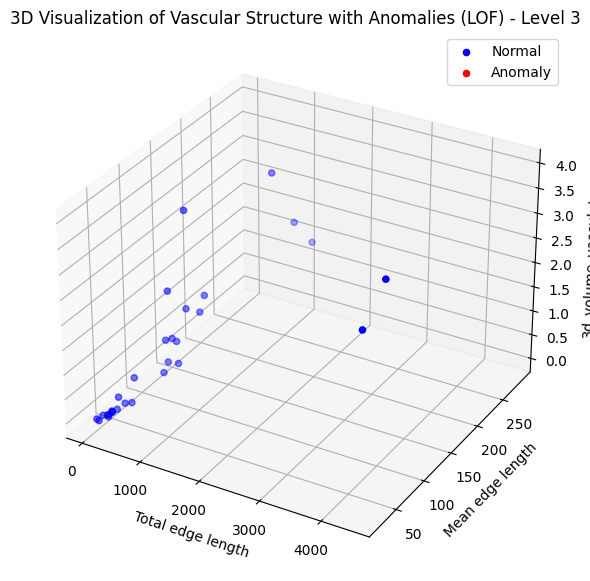

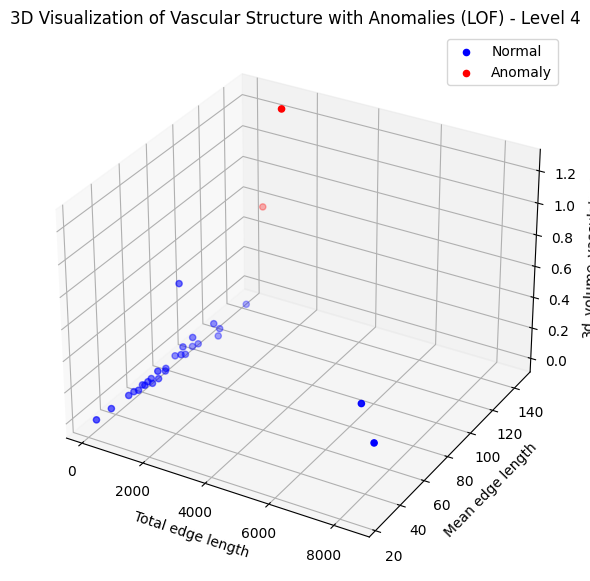

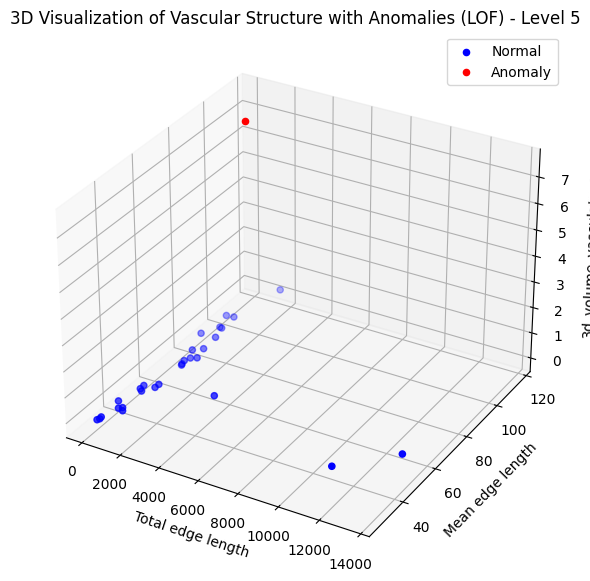

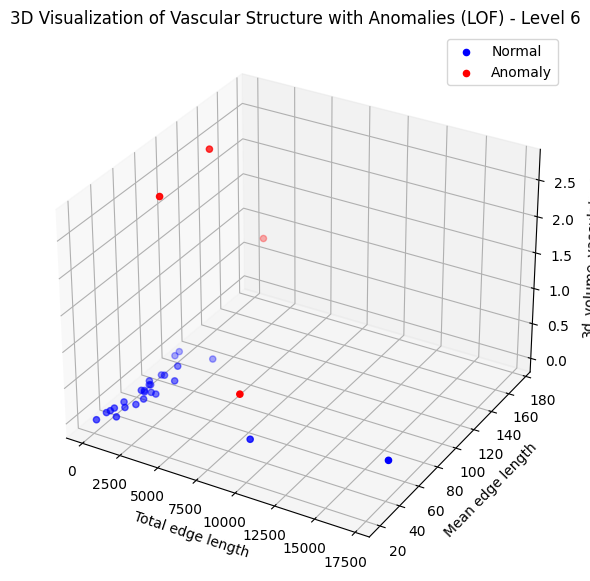

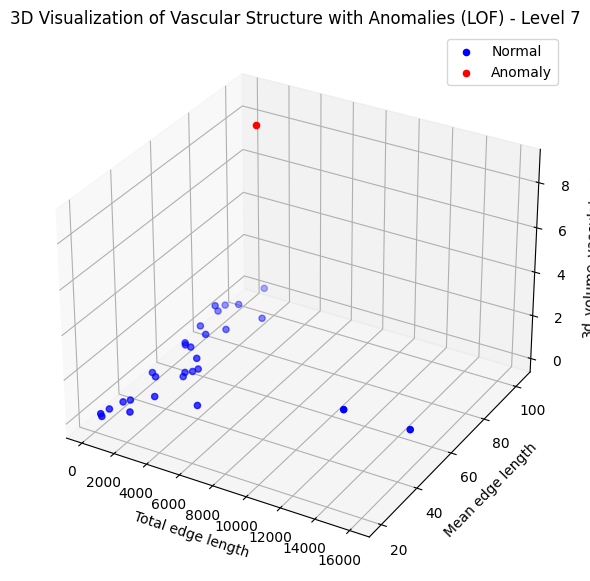

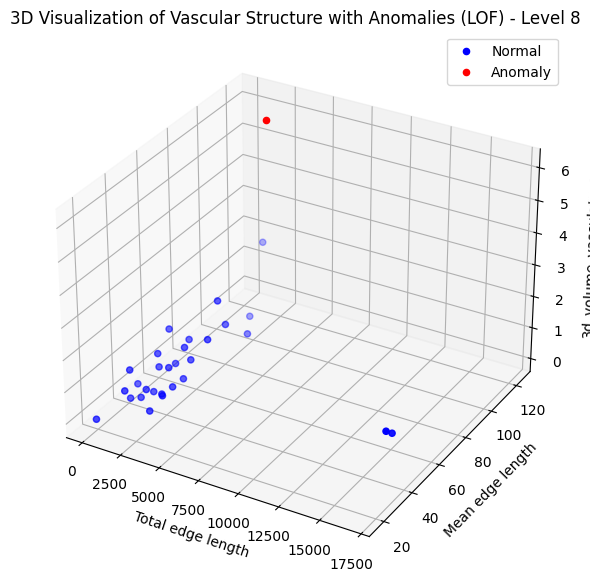

In [138]:
# Sprawdzenie brakujących wartości
print(combined_df.isnull().sum())

# Usunięcie wierszy z brakującymi wartościami
combined_df_cleaned = combined_df.dropna()

# Sprawdzenie unikalnych wartości w poszczególnych kolumnach
for param in parameters:
    print(f"{param}: {combined_df_cleaned[param].nunique()} unique values")

from sklearn.neighbors import LocalOutlierFactor

# Wykrywanie anomalii za pomocą LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
combined_df_cleaned['anomaly_lof'] = lof.fit_predict(combined_df_cleaned[parameters])

# Anomalie są oznaczone jako -1
anomalies_lof = combined_df_cleaned[combined_df_cleaned['anomaly_lof'] == -1]
normal_data_lof = combined_df_cleaned[combined_df_cleaned['anomaly_lof'] == 1]

import scipy.stats as stats

# Porównanie średnich wartości parametrów między normalnymi danymi a anomaliami
for param in parameters:
    normal_values = normal_data_lof[param]
    anomaly_values = anomalies_lof[param]
    if len(anomaly_values) > 0 and len(normal_values) > 0:
        t_stat, p_val = stats.ttest_ind(normal_values, anomaly_values, equal_var=False)
        print(f"Parametr: {param}, t-statystyka: {t_stat}, p-wartość: {p_val}")
    else:
        print(f"Parametr: {param}, nie ma wystarczających danych do przeprowadzenia testu")

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generowanie wykresów dla każdego poziomu
levels = combined_df_cleaned['level'].unique()

for level in levels:
    filtered_df = combined_df_cleaned[combined_df_cleaned['level'] == level]
    anomalies_lof = filtered_df[filtered_df['anomaly_lof'] == -1]
    normal_data_lof = filtered_df[filtered_df['anomaly_lof'] == 1]
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(normal_data_lof['Total edge length'], normal_data_lof['Mean edge length'], normal_data_lof['3d_volume_vasculature'], c='blue', label='Normal')
    scatter = ax.scatter(anomalies_lof['Total edge length'], anomalies_lof['Mean edge length'], anomalies_lof['3d_volume_vasculature'], c='red', label='Anomaly')
    ax.set_title(f'3D Visualization of Vascular Structure with Anomalies (LOF) - Level {level}')
    ax.set_xlabel('Total edge length')
    ax.set_ylabel('Mean edge length')
    ax.set_zlabel('3d_volume_vasculature')
    plt.legend()
    plt.show()


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Załadowanie danych
df_level3 = pd.read_csv('dag_level3_with_condition.csv')
df_level4 = pd.read_csv('dag_level4_with_condition.csv')

# Wybór cech z poziomu 3 i zmiennej docelowej z poziomu 4
X = df_level3[['Branch count', 'Total edge length', 'Mean edge length', 'Mean branch thickness', 'tortuosity']]
y = df_level4['tortuosity']  # Przykładowo przewidujemy 'Tortuosity' na poziomie 4

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standaryzacja cech (opcjonalnie, zależy od modelu)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)





In [59]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, mean_absolute_percentage_error

# Ustawienia dla XGBoost z GridSearchCV
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Parametry do przeszukania w GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7]
}

# Skorowanie za pomocą MAPE
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=mape_scorer, cv=kf, verbose=1)
grid_search.fit(X_train, y_train)

# Najlepsze parametry
print("Najlepsze parametry: ", grid_search.best_params_)

# Trening modelu z najlepszymi parametrami
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Najlepsze parametry:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

MAPE: 0.6855


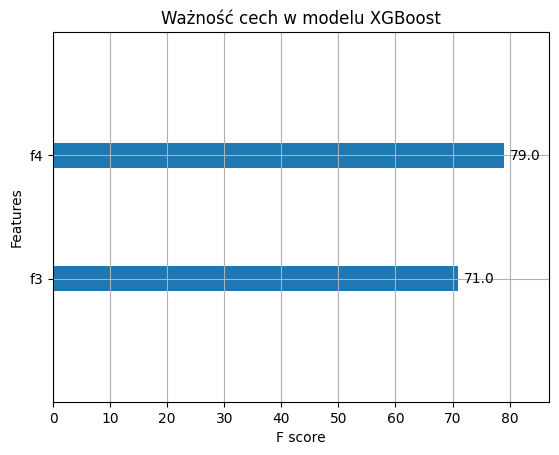

In [63]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predykcja na zbiorze testowym
y_pred = best_model.predict(X_test)

# Ocena modelu
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAPE: {mape:.4f}')


# Ważność cech
xgb.plot_importance(best_model)
plt.title('Ważność cech w modelu XGBoost')
plt.show()


In [67]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, make_scorer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Wczytanie danych
dataframes = {
    3: pd.read_csv('dag_level3_with_condition.csv'),
    4: pd.read_csv('dag_level4_with_condition.csv'),
    5: pd.read_csv('dag_level5_with_condition.csv'),
    6: pd.read_csv('dag_level6_with_condition.csv'),
    7: pd.read_csv('dag_level7_with_condition.csv'),
    8: pd.read_csv('dag_level8_with_condition.csv')
}


In [69]:
# Ustawienia pętli
levels = [3, 4, 5, 6, 7, 8]  # Poziomy od 3 do 8
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7]
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Pętla przez kolejne poziomy

In [73]:
results = []

for i in range(len(levels) - 1):
    lower_level = levels[i]
    upper_level = levels[i + 1]
    
    print(f'\nTrenowanie modelu dla przewidywania z Level {lower_level} na Level {upper_level}')
    
    # Wybór cech i zmiennej docelowej
    X = dataframes[lower_level][['Branch count', 'Total edge length', 'Mean edge length', 'Mean branch thickness', 'tortuosity']]
    y = dataframes[upper_level]['tortuosity']  # Na przykład przewidujemy 'Tortuosity' na wyższym poziomie

    # Podział na zbiór treningowy i testowy
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Standaryzacja danych
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


Trenowanie modelu dla przewidywania z Level 3 na Level 4

Trenowanie modelu dla przewidywania z Level 4 na Level 5

Trenowanie modelu dla przewidywania z Level 5 na Level 6

Trenowanie modelu dla przewidywania z Level 6 na Level 7

Trenowanie modelu dla przewidywania z Level 7 na Level 8


Fitting 5 folds for each of 27 candidates, totalling 135 fits


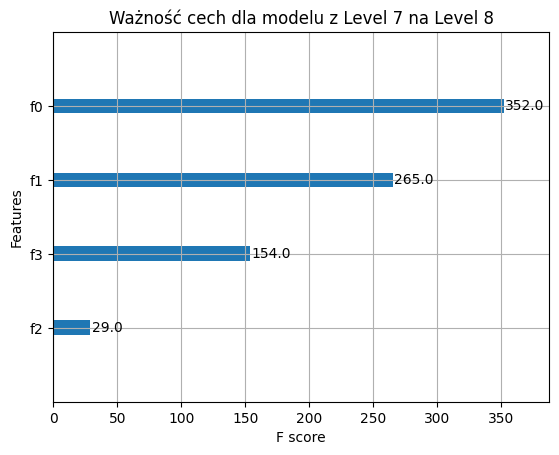

   Lower Level  Upper Level      MAPE       MAE  R2 Score  \
0            7            8  0.387851  1.487199 -1.316139   
1            7            8  0.387851       NaN       NaN   

                                     Best Parameters  
0  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...  
1  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...  


In [77]:
    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=mape_scorer, cv=kf, verbose=1)
    grid_search.fit(X_train, y_train)
    
    # Najlepszy model
    best_model = grid_search.best_estimator_
    
    # Predykcja na zbiorze testowym
    y_pred = best_model.predict(X_test)
    
    # Ewaluacja modelu
    mape = mean_absolute_percentage_error(y_test, y_pred)
   
    # Zapisanie wyników
    results.append({
        'Lower Level': lower_level,
        'Upper Level': upper_level,
        'MAPE': mape,
        'Best Parameters': grid_search.best_params_
    })
    
    # Ważność cech
    xgb.plot_importance(best_model)
    plt.title(f'Ważność cech dla modelu z Level {lower_level} na Level {upper_level}')
    plt.show()

# Wyświetlenie wyników dla wszystkich par poziomów
results_df = pd.DataFrame(results)
print(results_df)

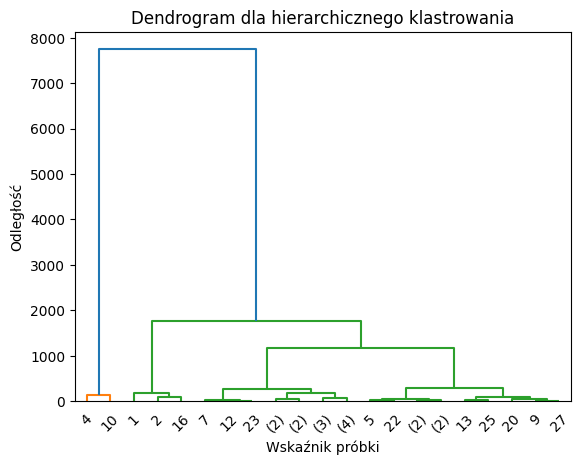

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [83]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Użycie danych z poziomu 3 do klastrowania (dla przykładu)
df = pd.read_csv('dag_level3_with_condition.csv')
features = df[['Branch count', 'Total edge length', 'Mean edge length', 'tortuosity']]

# Hierarchiczne klastrowanie
Z = linkage(features, method='ward')
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Dendrogram dla hierarchicznego klastrowania')
plt.xlabel('Wskaźnik próbki')
plt.ylabel('Odległość')
plt.show()

# Możliwość cięcia drzewa na odpowiednim poziomie
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(features)
df['Cluster'] = labels


In [87]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from xgboost import XGBRegressor

# Dane i modelowanie
X = df[['Branch count', 'Total edge length', 'Mean edge length', 'tortuosity']]
y = df['tortuosity']

model = XGBRegressor(objective='reg:squarederror', random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

print("Najlepsze parametry:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Ocena modelu
scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print("Średni R^2: ", scores.mean())


Najlepsze parametry: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Średni R^2:  0.8037218953985403


In [89]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import numpy as np

# Ustawienia autoenkodera
input_dim = X.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Model autoenkodera
autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X, X, epochs=100, batch_size=32, shuffle=True, validation_split=0.2)

# Użycie zakodowanych reprezentacji do klastrowania
encoded_X = encoder.predict(X)


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 460957.2812 - val_loss: 38730.9414
Epoch 2/100
1/1 [==============================] - 0s 62ms/step - loss: 460957.2812 - val_loss: 38730.9414
Epoch 3/100
1/1 [==============================] - 0s 62ms/step - loss: 460957.2812 - val_loss: 38730.9414
Epoch 4/100
1/1 [==============================] - 0s 50ms/step - loss: 460957.3438 - val_loss: 38730.9414
Epoch 5/100
1/1 [==============================] - 0s 53ms/step - loss: 460957.3438 - val_loss: 38730.9414
Epoch 6/100
1/1 [==============================] - 0s 44ms/step - loss: 460957.3438 - val_loss: 38730.9414
Epoch 7/100
1/1 [==============================] - 0s 55ms/step - loss: 460957.3438 - val_loss: 38730.9414
Epoch 8/100
1/1 [==============================] - 0s 47ms/step - loss: 460957.3438 - val_loss: 38730.9414
Epoch 9/100
1/1 [==============================] - 0s 55ms/step - loss: 460957.2500 - val_loss: 38730.9414
Epoch 10/100
1/1 [=====================

In [105]:
!pip install pymc3



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [109]:
!python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.8 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.8 MB 1.1 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.8 MB 1.1 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.8 MB 654.9 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.8 MB 655.8 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.8 MB 655.8 kB/s eta 0:00:03
   --- ------------------------------------ 0.2/1.8 MB 523.5 kB/s eta 0:00:04
   --- ------------------------------------ 0.2/1.8 MB 523.5 kB/s eta 0:00:04
   ---- ----------------------------------- 0.2/1.8 MB 471.4 kB/s eta 0:00:04
   ---- ----------------------------------- 0.2/1.8 MB 471.4 kB/s eta 0:00:04
   ---- ----------------------------------- 0.2/1.8 MB 471.4 kB/s eta 0:00:04
   ---- ----------------------------------- 0.2/1.8 MB 471.4 kB/s eta 0:00:04
   ---- 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
orange3 3.36.2 requires scikit-learn!=1.2.*,<1.4,>=1.1.0, but you have scikit-learn 1.4.2 which is incompatible.


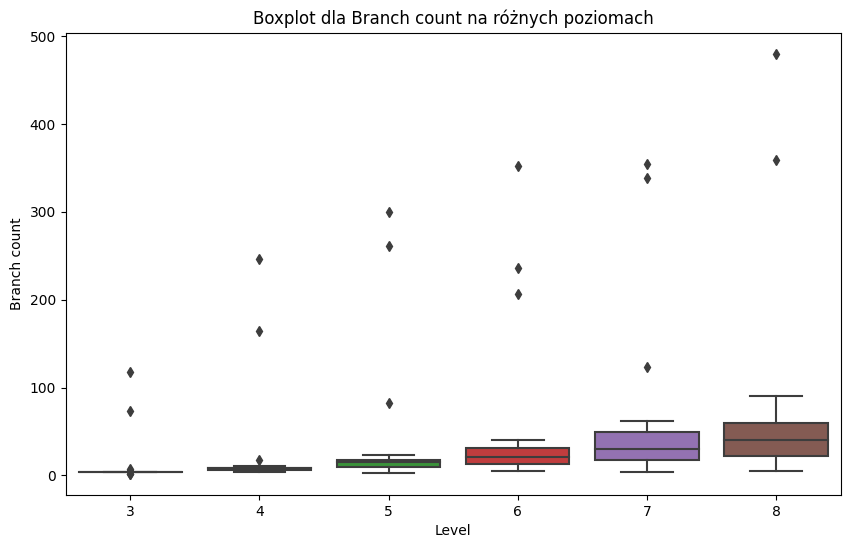

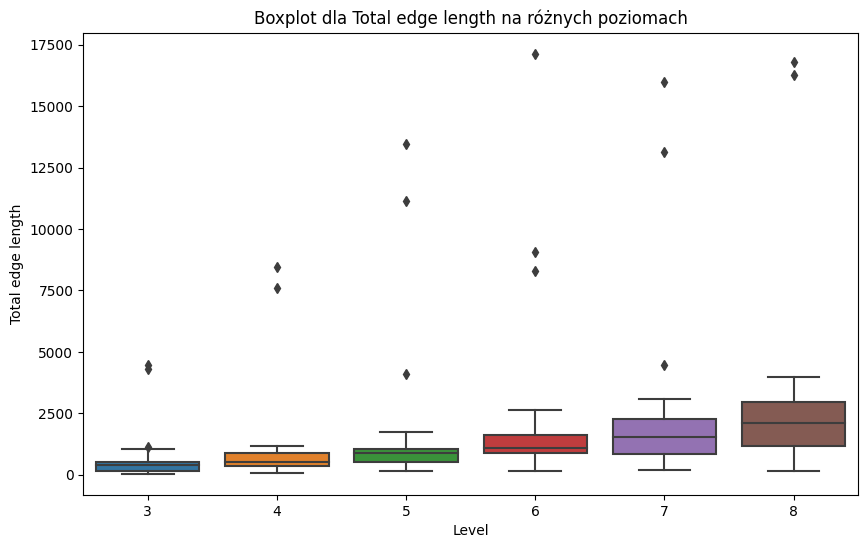

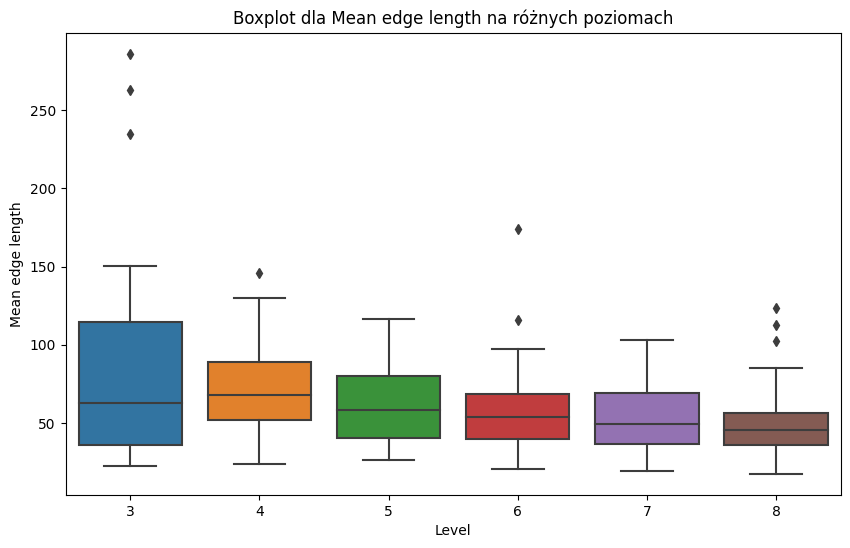

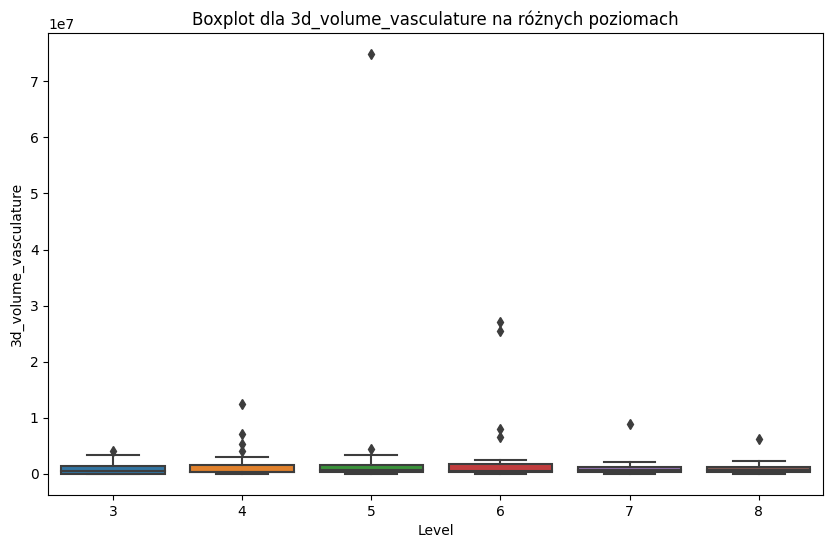

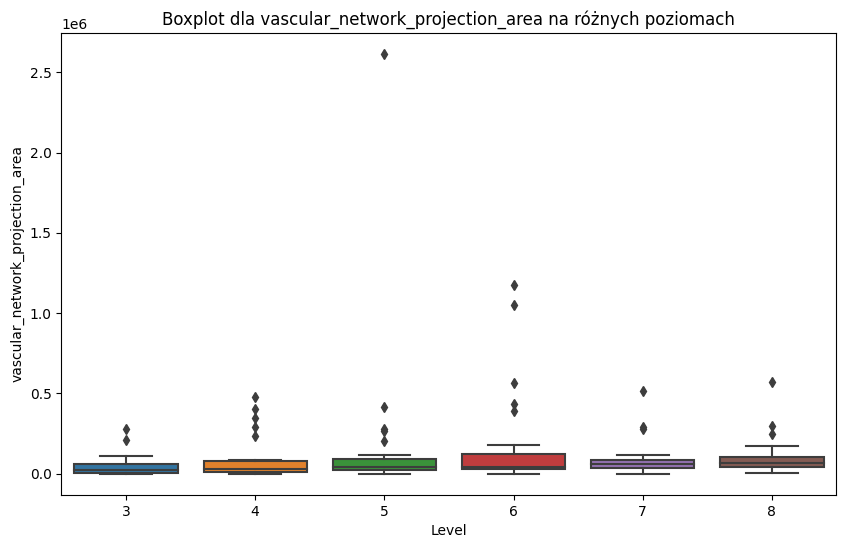

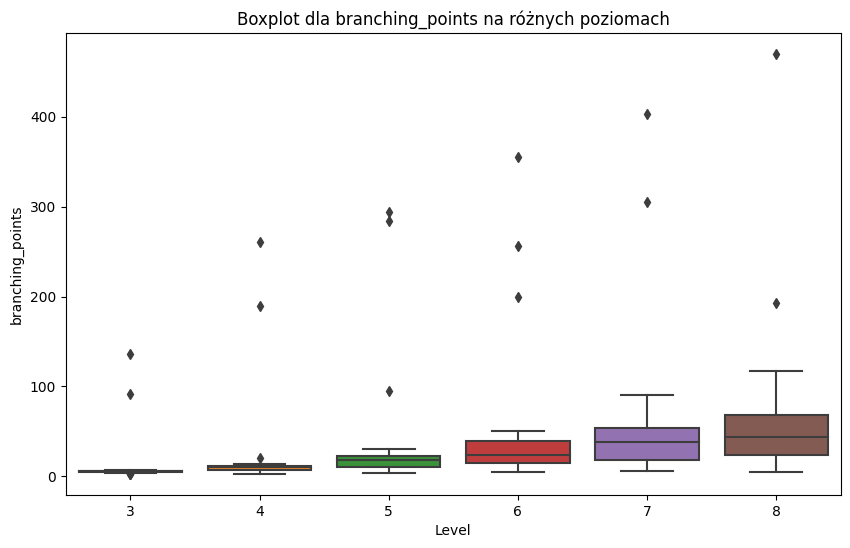

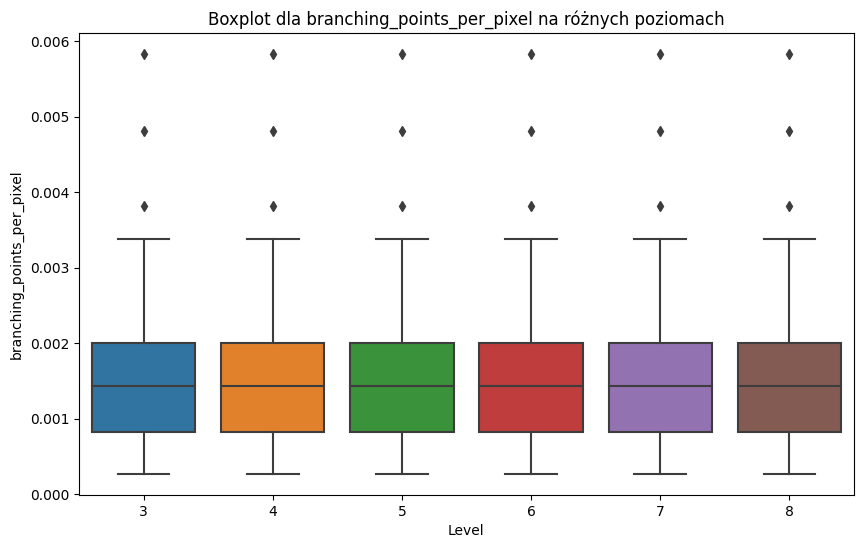

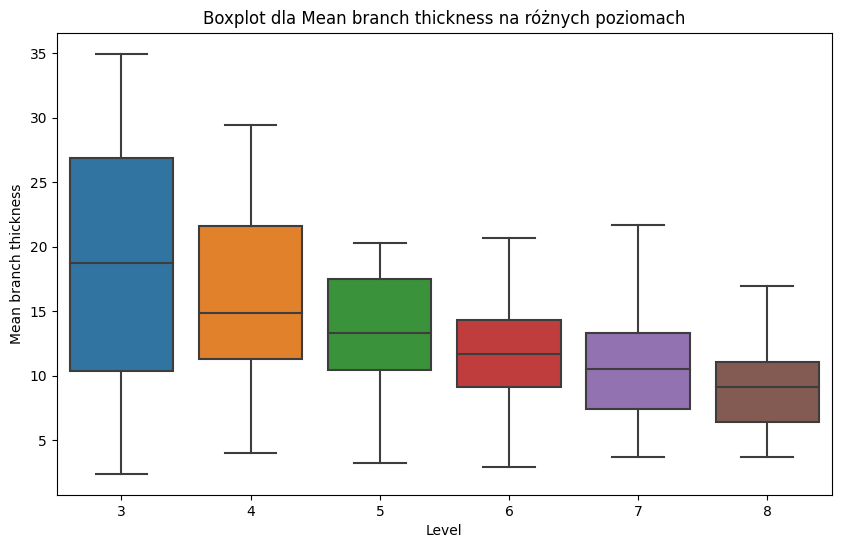

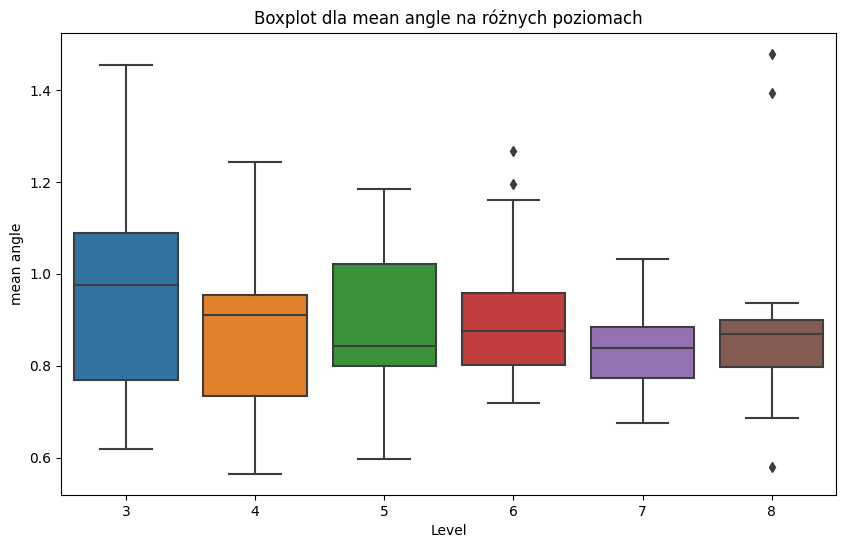

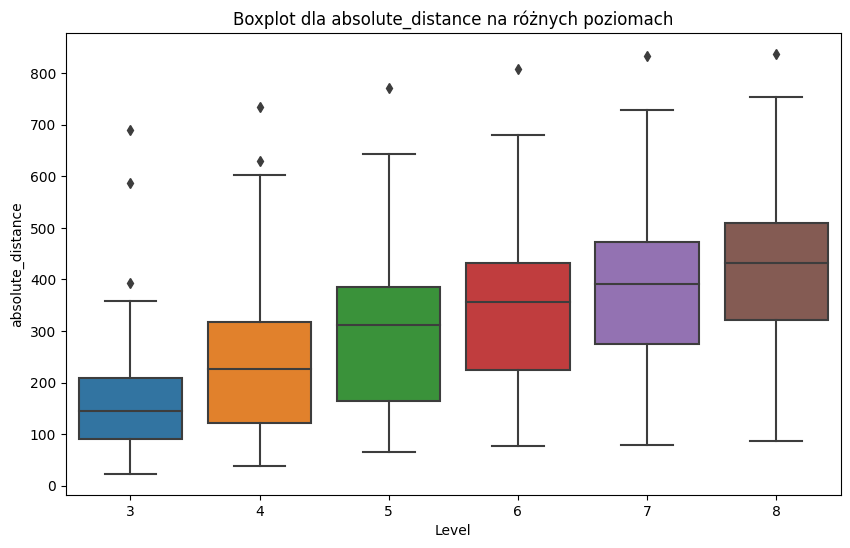

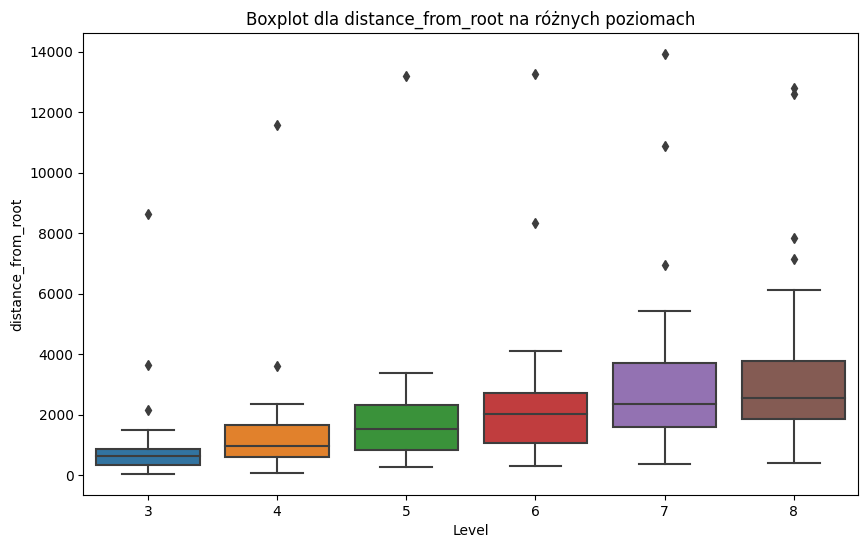

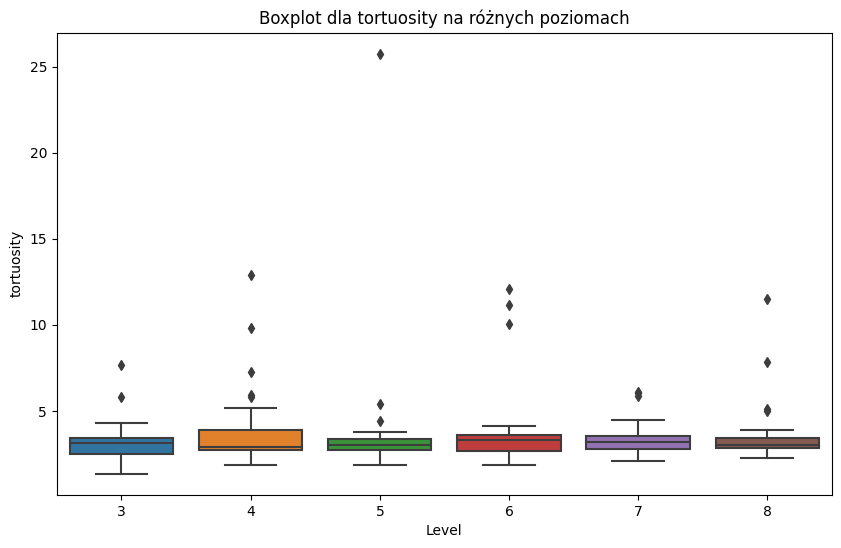

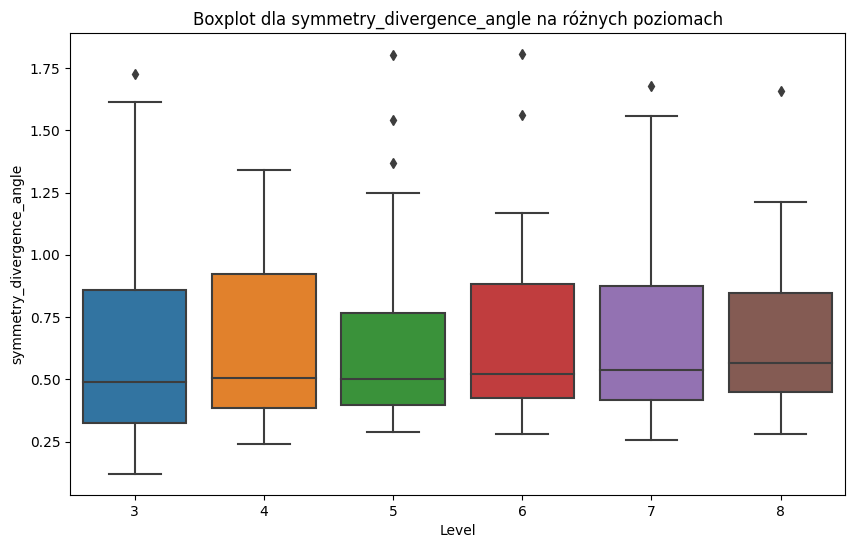

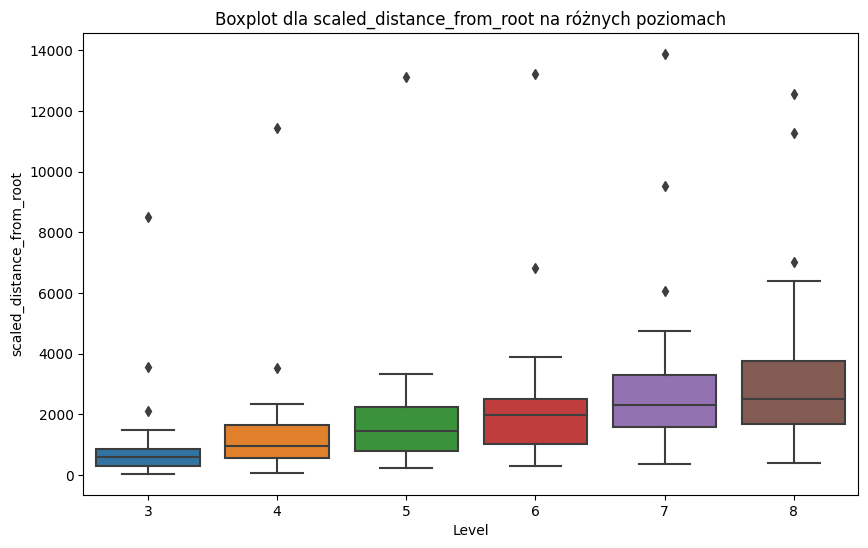

Outliersi według Z-score:
    Branch count  Total edge length  Mean edge length  3d_volume_vasculature  \
1            4.0         939.152883        234.788221           3.238117e+06   
2            4.0        1051.903798        262.975949           1.997672e+06   
9            4.0         511.925615        127.981404           1.351238e+06   
16           4.0        1144.221161        286.055290           1.388260e+06   
27           4.0         511.021995        127.755499           3.342671e+06   
29           5.0         178.053477         35.610695           6.860663e+04   
9            8.0         439.014011         54.876751           4.259355e+05   
10         246.0        8461.026244         34.394416           3.065361e+06   
11           6.0         415.043453         69.173909           2.552683e+05   
20           9.0        1170.184699        130.020522           7.129345e+06   
4          261.0       13437.898824         51.486202           3.254778e+06   
9           11

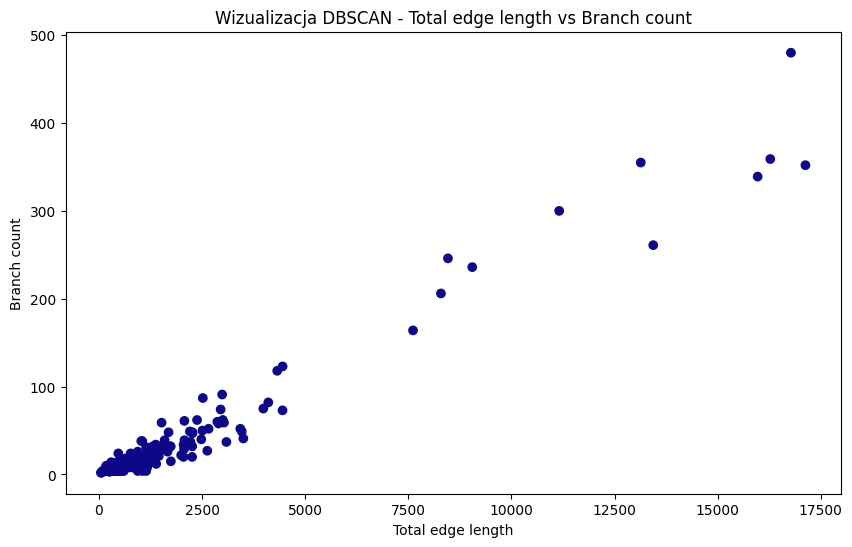

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import DBSCAN

# Lista dostępnych plików z poziomami
levels = [3, 4, 5, 6, 7, 8]

# Wczytanie danych do jednego DataFrame'a
dfs = []
for level in levels:
    df = pd.read_csv(f'dag_level{level}_with_condition.csv')
    df['Level'] = level
    dfs.append(df)

df_combined = pd.concat(dfs, axis=0)

# 1. Boxploty dla wszystkich parametrów
for column in df_combined.columns.drop(['Level']):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Level', y=column, data=df_combined)
    plt.title(f'Boxplot dla {column} na różnych poziomach')
    plt.show()

# 2. Z-score do wykrywania outliersów
z_scores = np.abs(stats.zscore(df_combined.drop(columns=['Level'])))
df_combined['Z-Score Max'] = z_scores.max(axis=1)  # Najwyższy Z-Score dla każdego wiersza

# Filtracja outliersów według Z-score (próg Z-score > 3)
outliers_zscore = df_combined[df_combined['Z-Score Max'] > 3]
print(f'Outliersi według Z-score:\n{outliers_zscore}')

# 3. DBSCAN do wykrywania outliersów
X = df_combined.drop(columns=['Level', 'Z-Score Max']).values
db = DBSCAN(eps=0.5, min_samples=5).fit(X)
df_combined['Cluster'] = db.labels_

# Filtracja outliersów według DBSCAN (Cluster = -1 oznacza outliersów)
outliers_dbscan = df_combined[df_combined['Cluster'] == -1]
print(f'Outliersi według DBSCAN:\n{outliers_dbscan}')

# 4. Wizualizacja outliersów (DBSCAN) na dwóch wybranych wymiarach
plt.figure(figsize=(10, 6))
plt.scatter(df_combined['Total edge length'], df_combined['Branch count'], c=df_combined['Cluster'], cmap='plasma')
plt.title('Wizualizacja DBSCAN - Total edge length vs Branch count')
plt.xlabel('Total edge length')
plt.ylabel('Branch count')
plt.show()


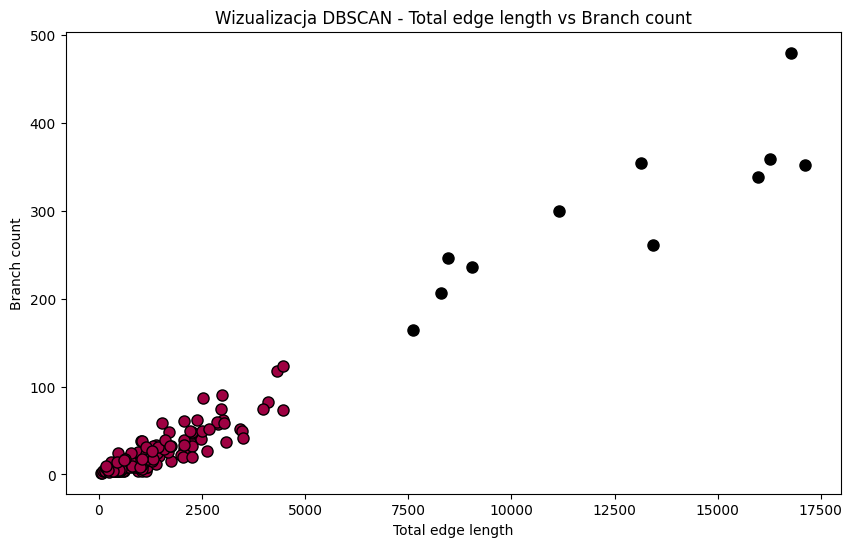

In [115]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

# Przykładowe dane
X = df_combined[['Total edge length', 'Branch count']].values

# Tworzenie modelu DBSCAN
db = DBSCAN(eps=1000, min_samples=5).fit(X)

# Etykiety klastrów
labels = db.labels_

# Unikalne klastry
unique_labels = set(labels)

# Kolory dla różnych klastrów
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(10, 6))

# Rysowanie punktów z odpowiednim kolorem
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Outliers (oznaczane na czarno)
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=8)

plt.title('Wizualizacja DBSCAN - Total edge length vs Branch count')
plt.xlabel('Total edge length')
plt.ylabel('Branch count')
plt.show()


In [117]:
# Filtrujemy outliery z danych DBSCAN
outliers_dbscan = df_combined[db.labels_ == -1]

# Wyświetlamy statystyki opisowe outlierów
outliers_stats = outliers_dbscan.describe()
display(outliers_stats)


Branch count  Total edge length  Mean edge length  \
count     11.000000          11.000000         11.000000   
mean     299.818182       12481.530826         41.922833   
std       88.879489        3726.584676          6.025567   
min      164.000000        7614.147930         34.394416   
25%      241.000000        8755.664778         37.097886   
50%      300.000000       13136.079041         40.247345   
75%      353.500000       16122.340314         46.767593   
max      480.000000       17127.452783         51.486202   

       3d_volume_vasculature  vascular_network_projection_area  \
count           1.100000e+01                         11.000000   
mean            2.542334e+06                     313543.746297   
std             1.656372e+06                      76672.323013   
min             9.288886e+05                     178142.004279   
25%             1.340965e+06                     278407.379527   
50%             2.178905e+06                     291746.794002   
75%             3.160070e+06                     367727.936232   
max             6.519884e+06                     433688.601178   

       branching_points  branching_points_per_pixel  Mean branch thickness  \
count         11.000000                   11.000000              11.000000   
mean         291.818182                    0.001609               8.021688   
std           89.062695                    0.000443               3.037704   
min          190.000000                    0.001147               3.983155   
25%          227.500000                    0.001147               5.892045   
50%          284.000000                    0.001962               7.455600   
75%          330.000000                    0.001994               9.955835   
max          470.000000                    0.002026              12.679617   

       mean angle  absolute_distance  distance_from_root  tortuosity  \
count   11.000000          11.000000           11.000000   11.000000   
mean     0.765533         655.363760         3058.053728    3.345827   
std      0.059775         151.718519          491.104509    0.238869   
min      0.666262         419.519968         2262.639255    2.934999   
25%      0.722375         540.153746         2664.423807    3.195511   
50%      0.781961         629.133348         3298.504605    3.436154   
75%      0.804589         790.031306         3389.785245    3.478427   
max      0.855204         838.056228         3606.785263    3.767321   

       symmetry_divergence_angle  scaled_distance_from_root      Level  \
count                  11.000000                  11.000000  11.000000   
mean                    0.555938                2991.808790   6.000000   
std                     0.134475                 479.860123   1.414214   
min                     0.428053                2226.336417   4.000000   
25%                     0.469161                2584.965200   5.000000   
50%                     0.502529                3256.362306   6.000000   
75%                     0.626225                3319.355821   7.000000   
max                     0.781130                3546.449262   8.000000   

       Z-Score Max  Cluster  
count    11.000000     11.0  
mean      4.003015     -1.0  
std       1.221365      0.0  
min       2.100557     -1.0  
25%       3.047400     -1.0  
50%       3.856242     -1.0  
75%       4.936321     -1.0  
max       6.042330     -1.0

Branch count                                                     \
               count        mean        std    min    25%    50%    75%   
Cluster                                                                   
-1              11.0  299.818182  88.879489  164.0  241.0  300.0  353.5   
 0             169.0   21.112426  22.002011    2.0    6.0   14.0   27.0   

               Total edge length                ... Level      Z-Score Max  \
           max             count          mean  ...   75%  max       count   
Cluster                                         ...                          
-1       480.0              11.0  12481.530826  ...   7.0  8.0        11.0   
 0       123.0             169.0   1142.129804  ...   7.0  8.0       169.0   

                                                                                
             mean       std       min       25%       50%       75%        max  
Cluster                                                                         
-1       4.003015  1.221365  2.100557  3.047400  3.856242  4.936321   6.042330  
 0       1.884076  1.266446  0.516036  1.091239  1.482642  2.392842  11.623883  

[2 rows x 128 columns]

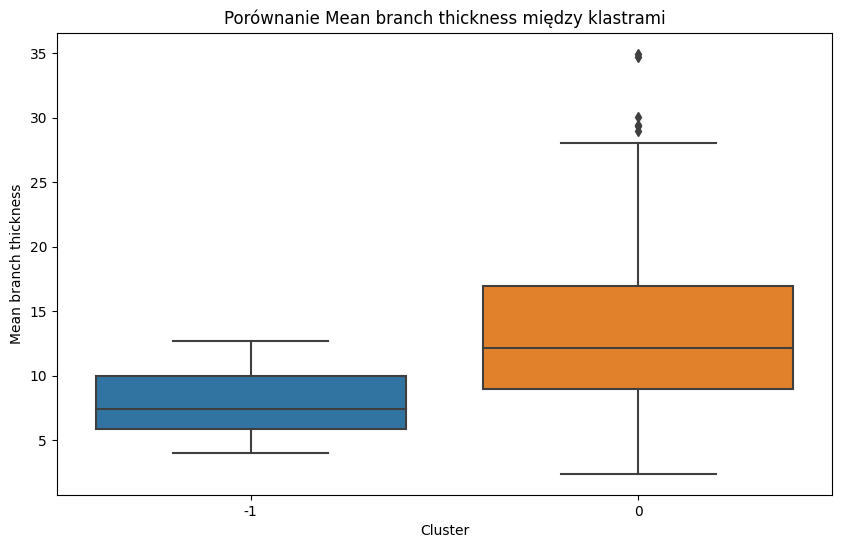

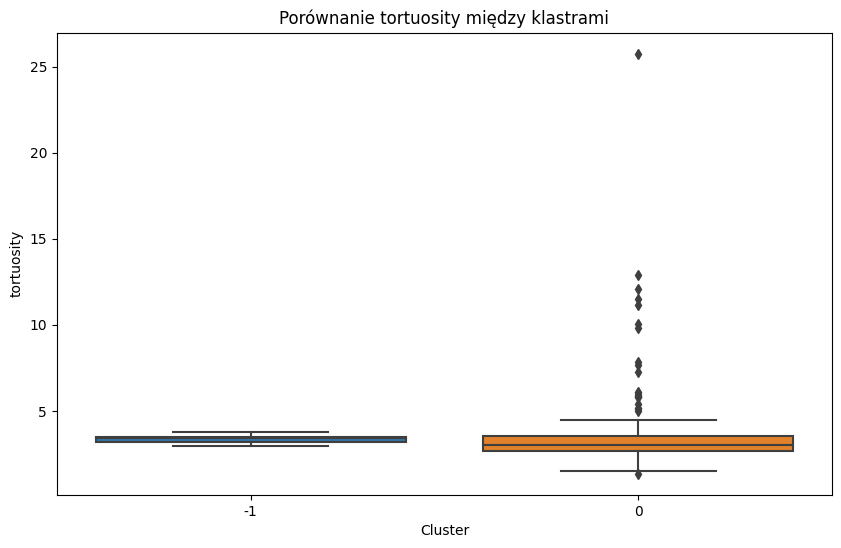

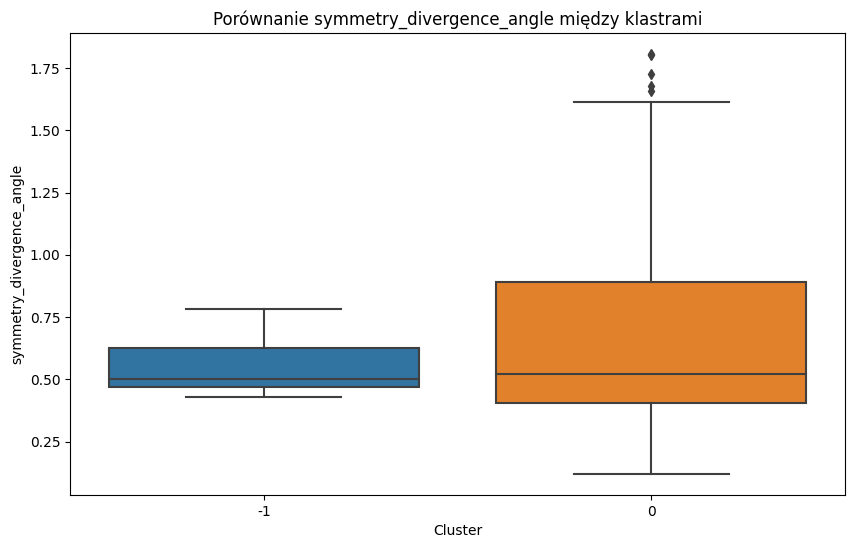

In [119]:
# Dodajemy etykiety klastrów do oryginalnych danych
df_combined['Cluster'] = db.labels_

# Obliczamy statystyki dla każdego klastra
cluster_stats = df_combined.groupby('Cluster').describe()
display(cluster_stats)

# Wizualizacja porównania klastrów dla wybranych cech
for feature in ['Mean branch thickness', 'tortuosity', 'symmetry_divergence_angle']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=df_combined)
    plt.title(f'Porównanie {feature} między klastrami')
    plt.show()


Accuracy: 1.00
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         4
           0       1.00      1.00      1.00        50

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



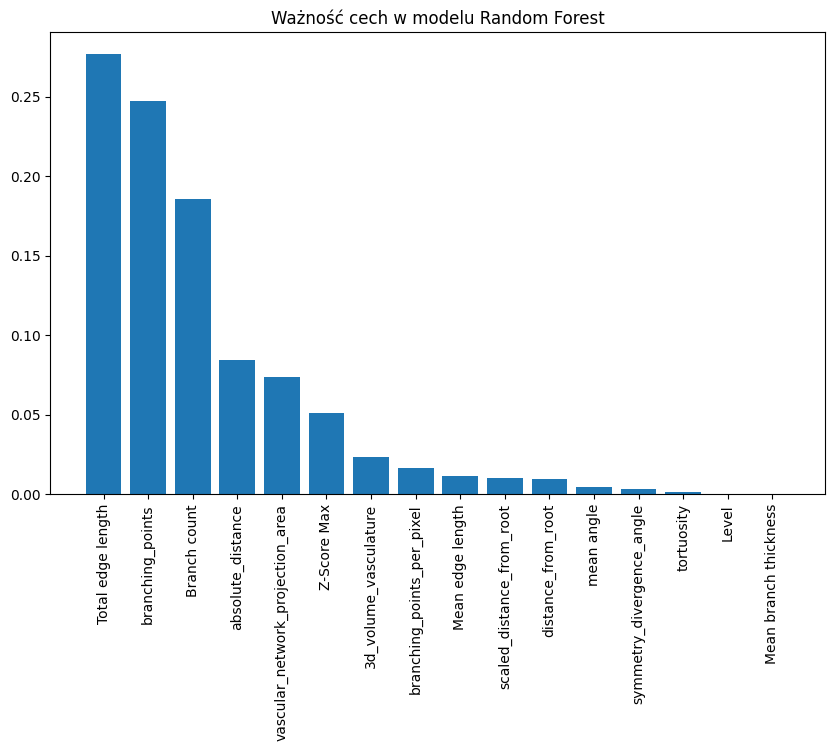

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Przygotowanie danych do modelowania
X = df_combined.drop(columns=['Cluster'])
y = df_combined['Cluster']

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tworzenie modelu Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Przewidywanie klastra dla danych testowych
y_pred = model.predict(X_test)

# Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(report)

# Ważność cech
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Wyświetlenie ważności cech
plt.figure(figsize=(10, 6))
plt.title("Ważność cech w modelu Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()


In [123]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, log_loss

# Załóżmy, że 'model' to Twój model XGBoost lub Random Forest
# oraz 'X' to dane, a 'y' to etykiety

# 5-krotna walidacja krzyżowa
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
cv_predictions = cross_val_predict(model, X, y, cv=5)

print("Cross-validation Accuracy Scores: ", cv_scores)
print("Mean CV Accuracy: ", cv_scores.mean())

# Confusion matrix
conf_matrix = confusion_matrix(y, cv_predictions)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y, cv_predictions)
print("Classification Report:\n", class_report)

# Log-loss
logloss = log_loss(y, cv_predictions)
print("Log-Loss: ", logloss)

# AUC-ROC
if len(set(y)) == 2:  # Jeśli mamy problem binarny
    auc = roc_auc_score(y, cv_predictions)
    print("AUC-ROC: ", auc)
else:
    print("AUC-ROC nie może być obliczony dla problemu wieloklasowego bez odpowiedniego kodowania.")


Cross-validation Accuracy Scores:  [1. 1. 1. 1. 1.]
Mean CV Accuracy:  1.0
Confusion Matrix:
 [[ 11   0]
 [  0 169]]
Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00        11
           0       1.00      1.00      1.00       169

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180

Log-Loss:  33.84098568200443
AUC-ROC:  1.0
